# Bibliotecas

In [91]:
import os
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from scipy.stats import boxcox


# Leitura dos Dados

In [92]:
df = pd.read_csv('Newdata.csv')
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins',
       'Fats', 'Calories', 'meal_name', 'meal_type', 'diet_type', 'sugar_g',
       'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'cooking_method',
       'prep_time_min', 'cook_time_min', 'rating', 'is_healthy',
       'Name of Exercise', 'Sets', 'Reps', 'Benefit',
       'Burns Calories (per 30 min)', 'Target Muscle Group',
       'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle',
       'Workout', 'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg',
       'pct_HRR', 'pct_maxHR', 'cal_balance', 'lean_mass_kg', 'expected_burn'],
      dtype='object')

In [93]:
df.sample() #retorna 1 linha aleatória do DataFrame.

Age Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
12224  31.03   Male        79.35        1.54   184.07    144.0        59.22   

       Session_Duration (hours)  Calories_Burned Workout_Type  ...  \
12224                      1.02           733.79         Yoga  ...   

                           Workout   BMI_calc  cal_from_macros  pct_carbs  \
12224  Overhead triceps extensions  33.458425          2417.91   0.498579   

       protein_per_kg   pct_HRR  pct_maxHR  cal_balance  lean_mass_kg  \
12224        1.534594  0.679055   0.782311      1487.21     51.734352   

       expected_burn  
12224       673.7712  

[1 rows x 53 columns]

In [94]:
df.isnull().sum() #total de valores ausentes (NaN) em cada coluna.

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
Daily meals frequency            0
Physical exercise                0
Carbs                            0
Proteins                         0
Fats                             0
Calories                         0
meal_name                        0
meal_type                        0
diet_type                        0
sugar_g                          0
sodium_mg                        0
cholesterol_mg                   0
serving_size_g                   0
cooking_method      

In [95]:
df.duplicated().sum() #contar quantas linhas duplicadas existem no DataFrame.

0

# Análise de Dados

## Agrupamento das 14 variáveis categóricas

In [96]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns #identifica quais colunas do DataFrame são categóricas.
print(categorical_cols)

Index(['Gender', 'Workout_Type', 'meal_name', 'meal_type', 'diet_type',
       'cooking_method', 'Name of Exercise', 'Benefit', 'Target Muscle Group',
       'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle',
       'Workout'],
      dtype='object')


In [97]:
#Grupo 1	['Gender', 'Workout_Type', 'meal_name', 'meal_type']	🧍‍♂️ Perfil do usuário e visão geral de treino/refeição
#Grupo 2	['diet_type', 'cooking_method', 'Name of Exercise', 'Benefit']	🍽️ Objetivo da dieta e do exercício
#Grupo 3	['Target Muscle Group', 'Equipment Needed', 'Difficulty Level', 'Body Part']	💪 Mecânica do exercício
#Grupo 4	['Type of Muscle', 'Workout']	🧠 Classificação do treino


🧩 ANALYSIS — GRUPO 1 - Perfil e Refeições



C:\Users\dayve\AppData\Local\Temp\ipykernel_3088\909457299.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


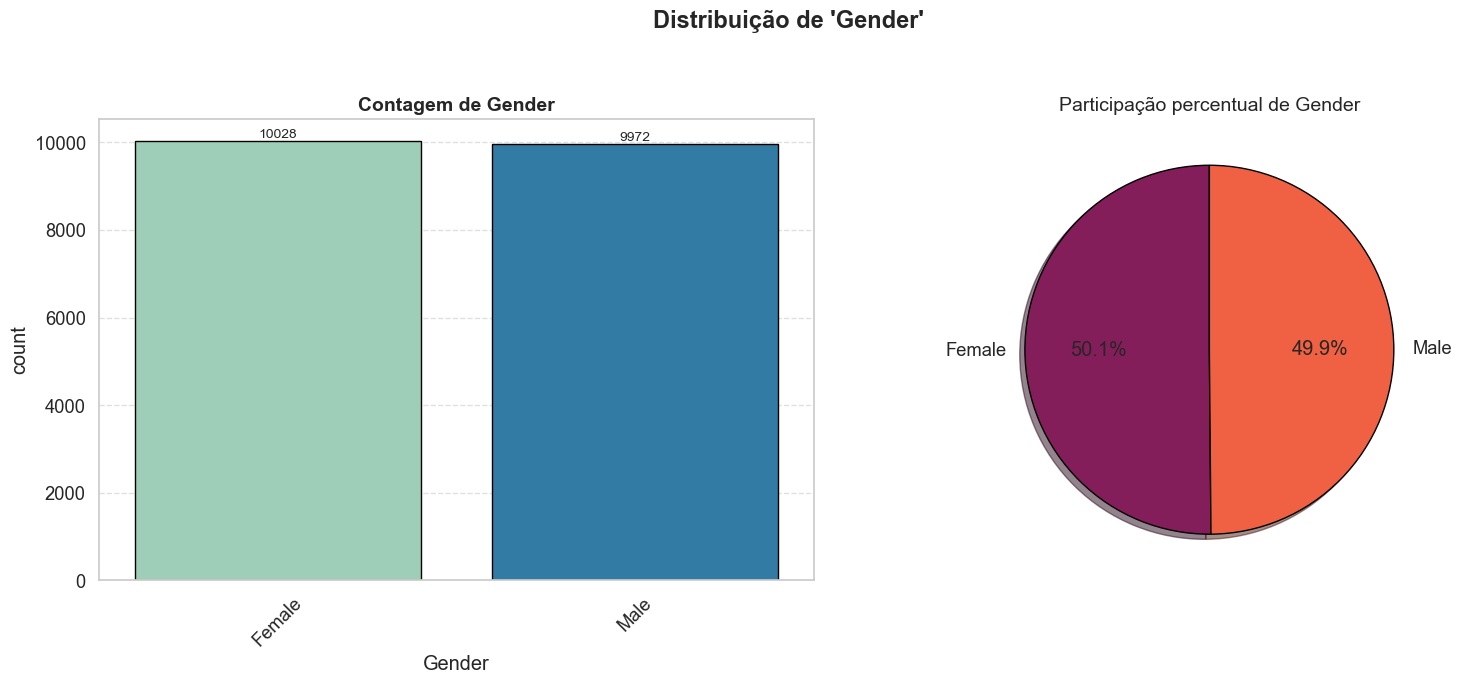

🔍 **Gender**
- Valores únicos: 2
- Categoria predominante Female (10028 Entradas, 50.1%)
- Segunda categoria mais comum: Male (9972 Entradas, 49.9%)
------------------------------------------------------------


C:\Users\dayve\AppData\Local\Temp\ipykernel_3088\909457299.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


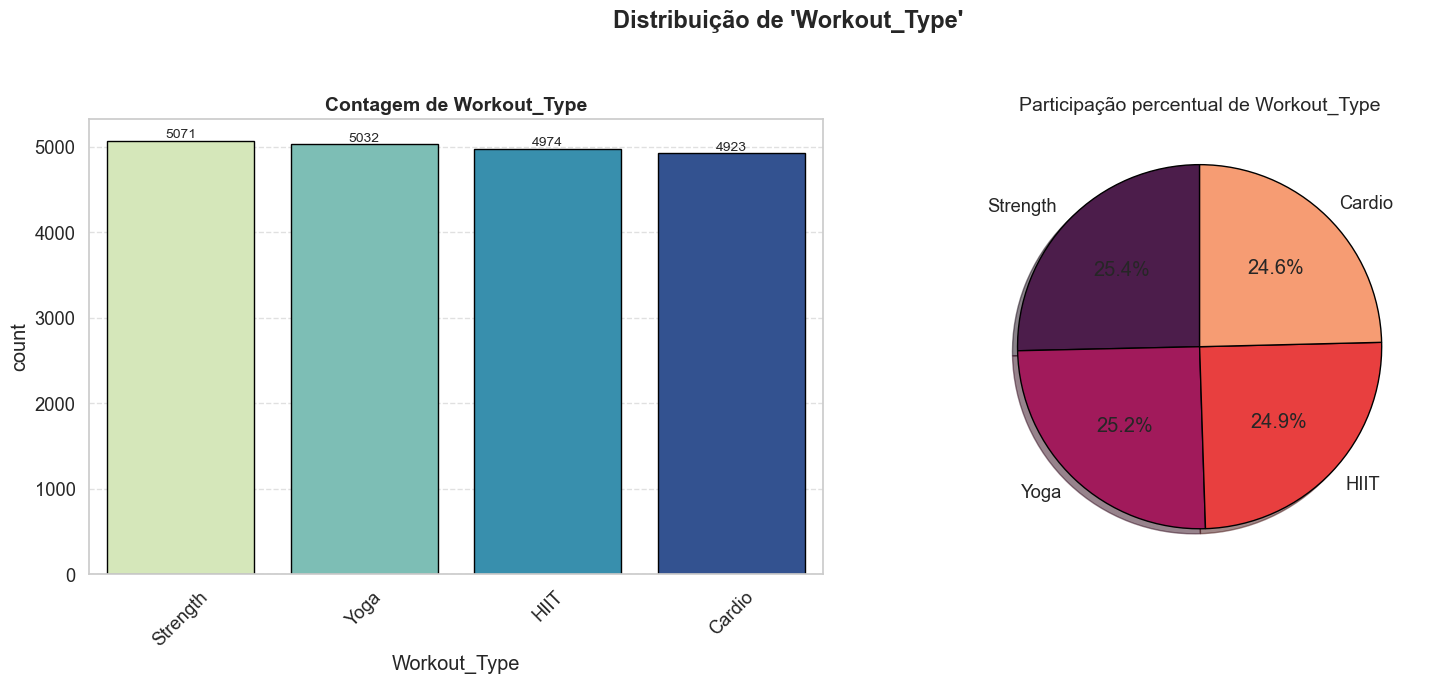

🔍 **Workout_Type**
- Valores únicos: 4
- Categoria predominante Strength (5071 Entradas, 25.4%)
- Segunda categoria mais comum: Yoga (5032 Entradas, 25.2%)
------------------------------------------------------------


C:\Users\dayve\AppData\Local\Temp\ipykernel_3088\909457299.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


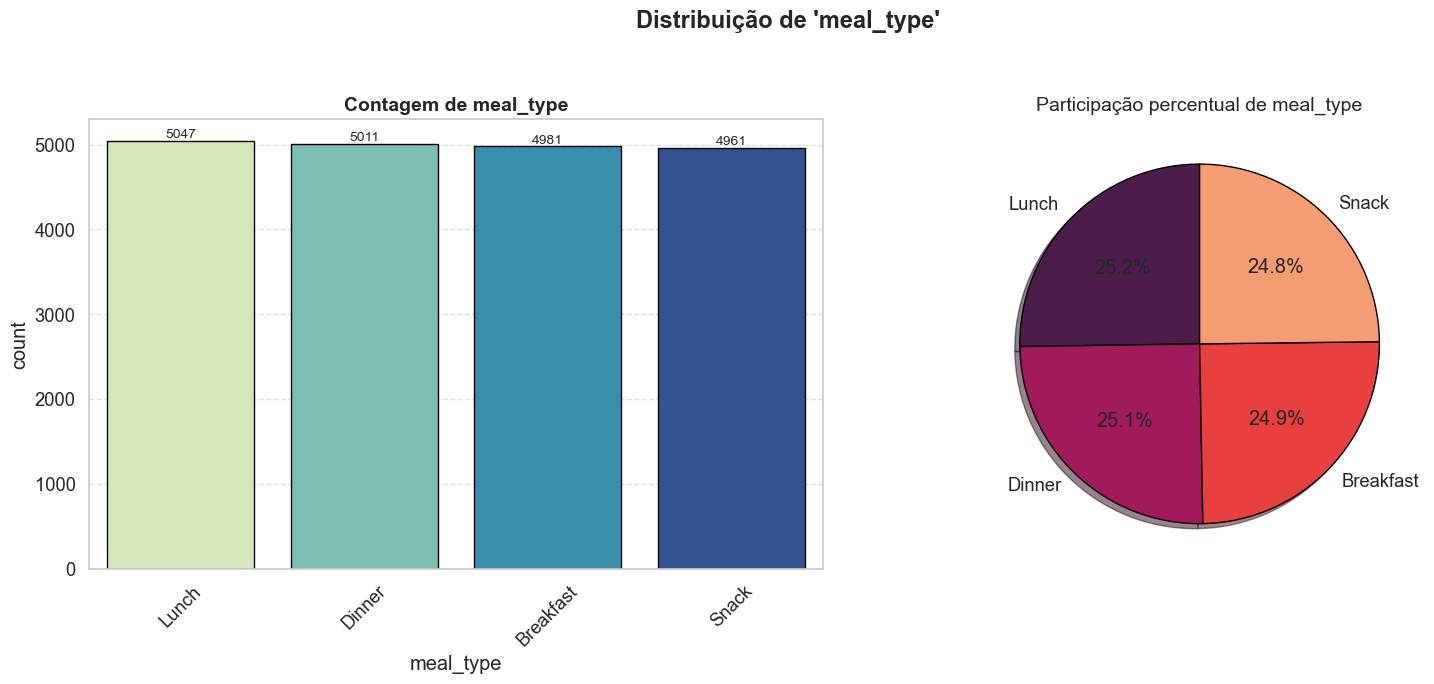

🔍 **meal_type**
- Valores únicos: 4
- Categoria predominante Lunch (5047 Entradas, 25.2%)
- Segunda categoria mais comum: Dinner (5011 Entradas, 25.1%)
------------------------------------------------------------


In [98]:
def analyze_group(df, columns, group_name) :
    # Distribuição das variáveis categóricas por grupo de features

    print(f"\n{'='*80}")
    print(f"🧩 ANALYSIS — {group_name}")
    print(f"{'='*80}\n")

    sns.set(style='whitegrid', font_scale=1.2)

    for col in columns :
        temp_series = df[col].fillna('Missing')
        value_counts = temp_series.value_counts()

        # ------- Visualização -------
        fig, axes = plt.subplots(1, 2, figsize=(16, 7))
        fig.suptitle(f"Distribuição de '{col}'", fontsize=17, fontweight='bold')

        sns.countplot(
            data=df, x=col, order=value_counts.index,
            palette='YlGnBu', ax=axes[0], edgecolor='black'
        )
        axes[0].set_title(f'Contagem de {col}', fontsize=14, fontweight='semibold')
        axes[0].tick_params(axis='x', rotation=45)
        axes[0].grid(axis='y', linestyle='--', alpha=0.6)

        for p in axes[0].patches:
            axes[0].annotate(f'{int(p.get_height())}',
                             (p.get_x() + p.get_width()/2., p.get_height()),
                             ha='center', va='bottom', fontsize=10)
        value_counts.plot.pie(
            autopct='%1.1f%%',
            ax=axes[1],
            colors=sns.color_palette('rocket', len(value_counts)),
            startangle=90, shadow=True, wedgeprops={'edgecolor': 'black'}
        )
        axes[1].set_ylabel('')
        axes[1].set_title(f'Participação percentual de {col}', fontsize=14)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()
        # ------- Análise básica ----------
        print(f"🔍 **{col}**")
        print(f"- Valores únicos: {len(value_counts)}")
        print(f"- Categoria predominante {value_counts.index[0]} ({value_counts.iloc[0]} Entradas, {value_counts.iloc[0]/len(df)*100:.1f}%)")
        if len(value_counts) > 1:
                print(f"- Segunda categoria mais comum: {value_counts.index[1]} ({value_counts.iloc[1]} Entradas, {value_counts.iloc[1]/len(df)*100:.1f}%)")
        print("-" * 60)

# GRUPO 1 - Perfil Demográfico e Refeições
group1_cols = ['Gender', 'Workout_Type', 'meal_type']
analyze_group(df, group1_cols, group_name="GRUPO 1 - Perfil e Refeições")



🧩 ANALYSIS — GRUPO 2 - Objetivo da Dieta e do Exercício



C:\Users\dayve\AppData\Local\Temp\ipykernel_3088\909457299.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


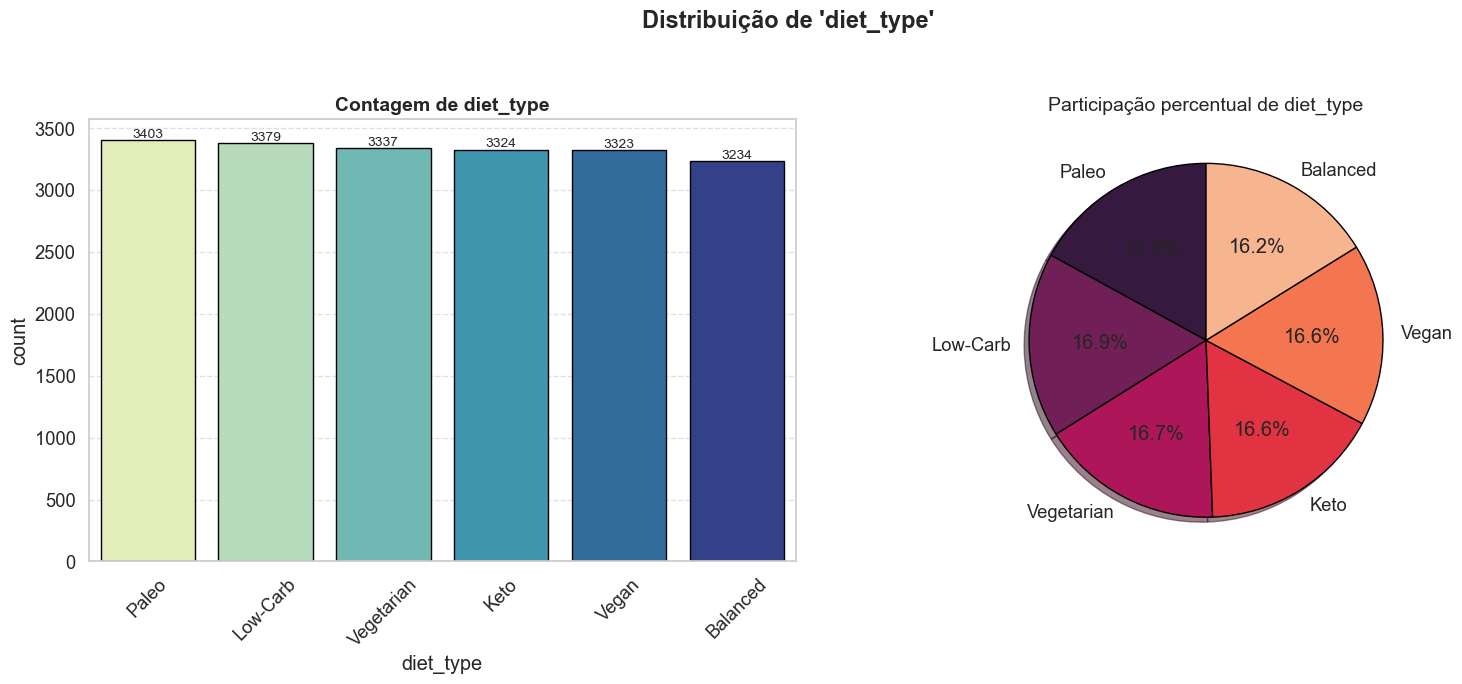

🔍 **diet_type**
- Valores únicos: 6
- Categoria predominante Paleo (3403 Entradas, 17.0%)
- Segunda categoria mais comum: Low-Carb (3379 Entradas, 16.9%)
------------------------------------------------------------


C:\Users\dayve\AppData\Local\Temp\ipykernel_3088\909457299.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


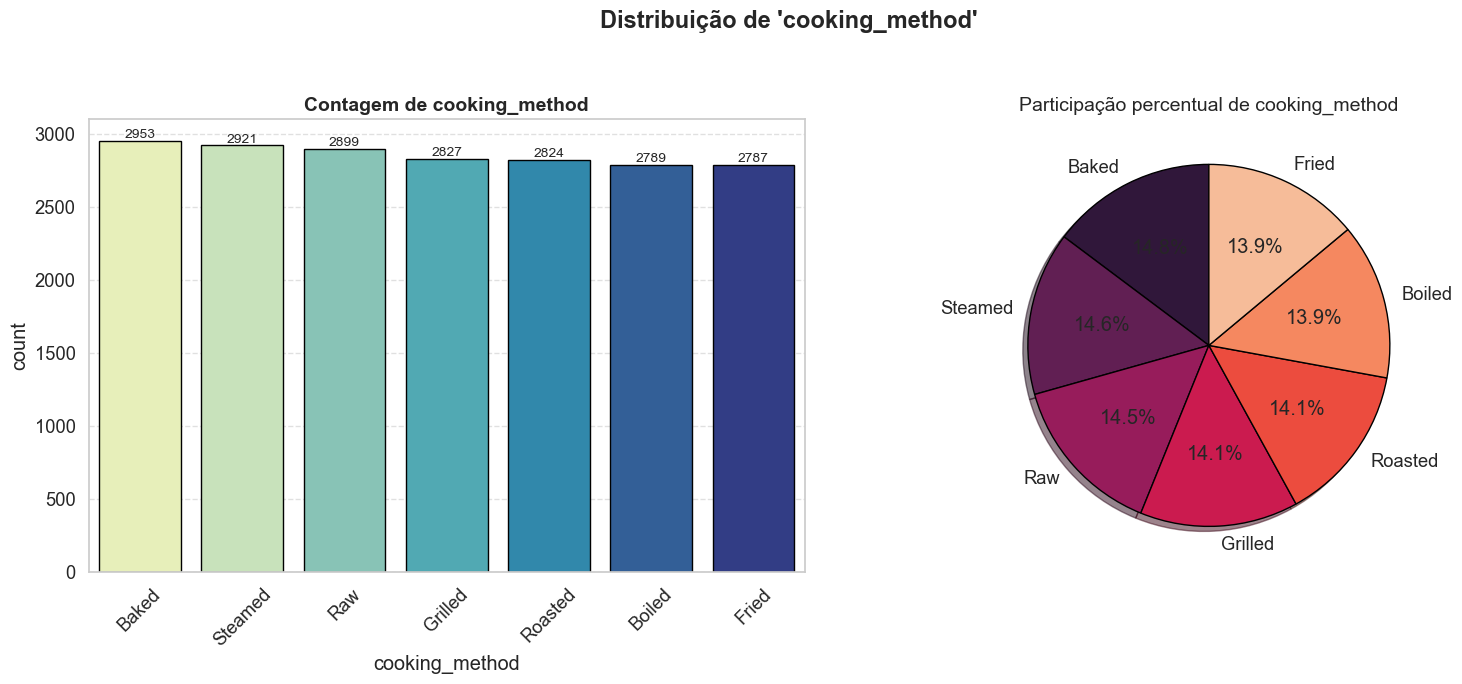

🔍 **cooking_method**
- Valores únicos: 7
- Categoria predominante Baked (2953 Entradas, 14.8%)
- Segunda categoria mais comum: Steamed (2921 Entradas, 14.6%)
------------------------------------------------------------


In [99]:
# GRUPO 2 - Objetivo da Dieta e do Exercício

group2_cols = ['diet_type', 'cooking_method']
analyze_group(df, group2_cols, group_name="GRUPO 2 - Objetivo da Dieta e do Exercício")


🧩 ANALYSIS — GRUPO 3 — Mecânica do Exercício



C:\Users\dayve\AppData\Local\Temp\ipykernel_3088\909457299.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


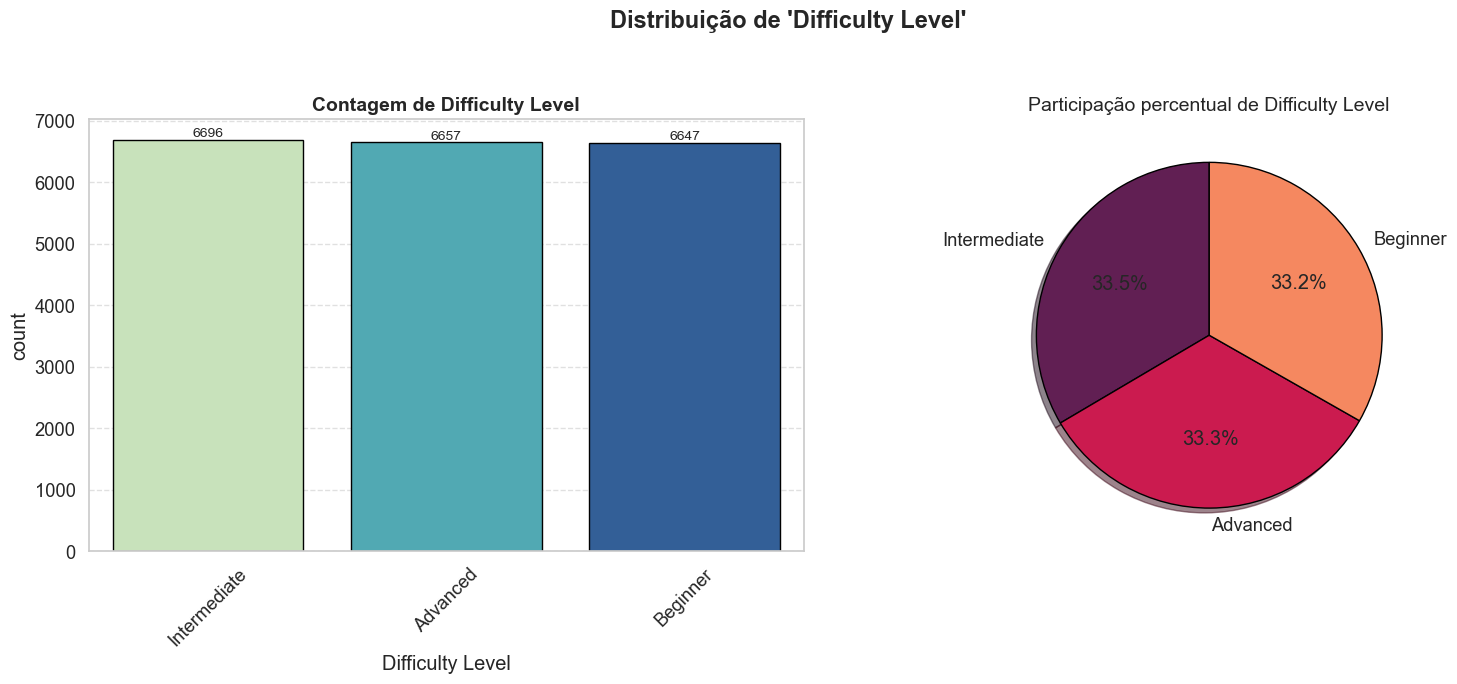

🔍 **Difficulty Level**
- Valores únicos: 3
- Categoria predominante Intermediate (6696 Entradas, 33.5%)
- Segunda categoria mais comum: Advanced (6657 Entradas, 33.3%)
------------------------------------------------------------


C:\Users\dayve\AppData\Local\Temp\ipykernel_3088\909457299.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


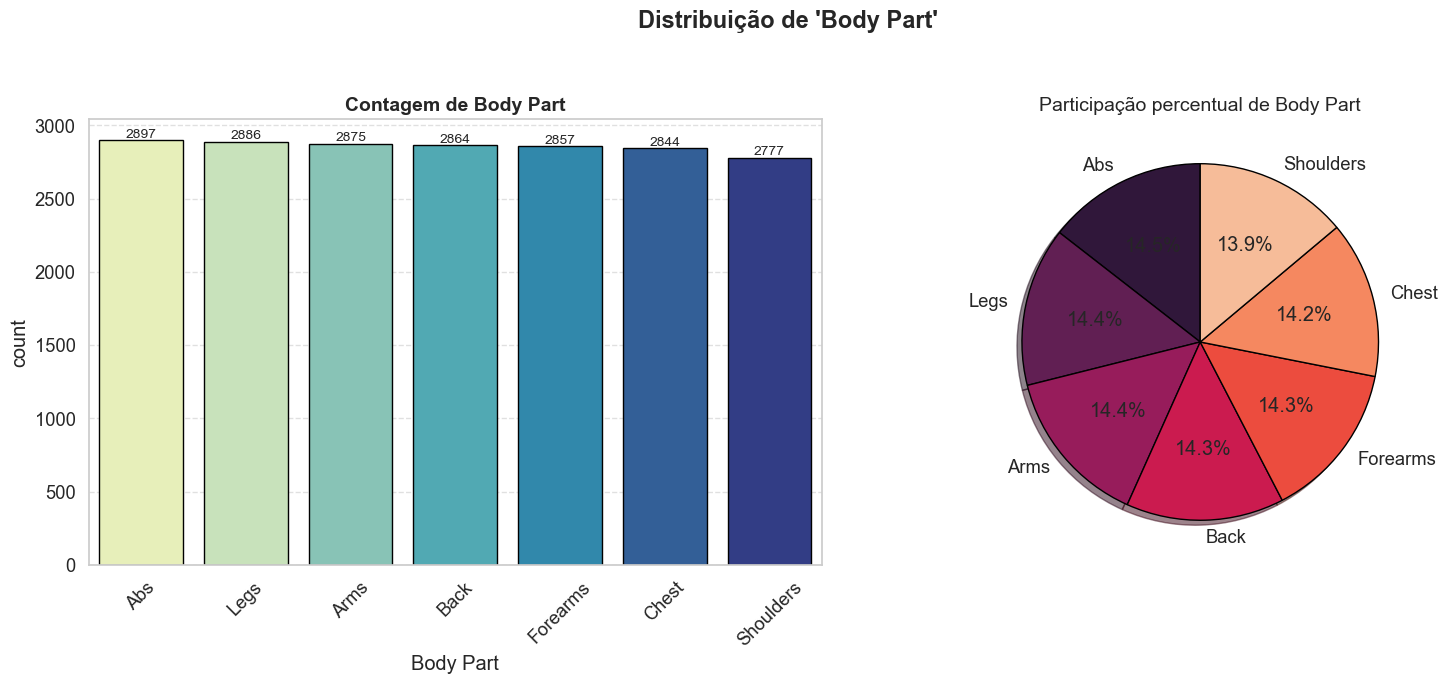

🔍 **Body Part**
- Valores únicos: 7
- Categoria predominante Abs (2897 Entradas, 14.5%)
- Segunda categoria mais comum: Legs (2886 Entradas, 14.4%)
------------------------------------------------------------


In [100]:
# GRUPO 3 — Mecânica do Exercício

group3_cols = ['Difficulty Level', 'Body Part']
analyze_group(df, group3_cols, group_name="GRUPO 3 — Mecânica do Exercício")


🧩 ANALYSIS — GRUPO 4 — Classificação do treino



C:\Users\dayve\AppData\Local\Temp\ipykernel_3088\909457299.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


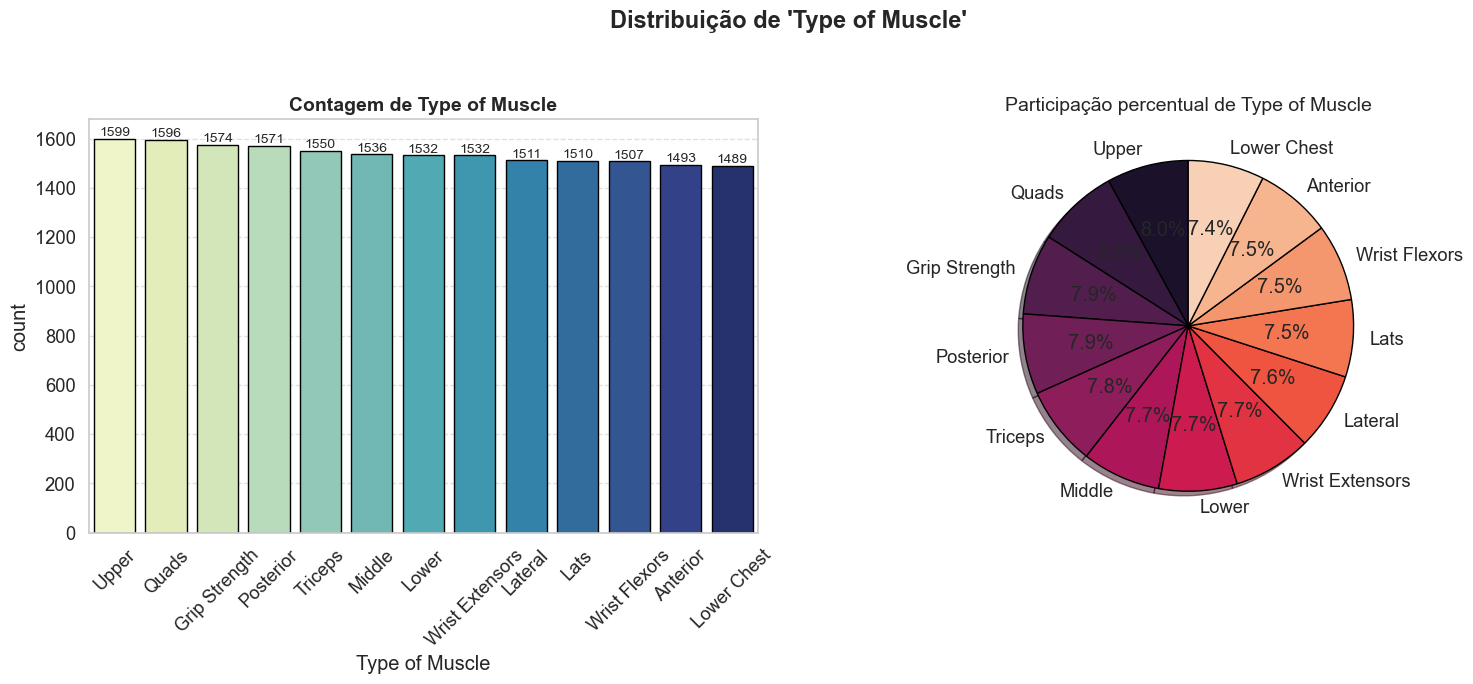

🔍 **Type of Muscle**
- Valores únicos: 13
- Categoria predominante Upper (1599 Entradas, 8.0%)
- Segunda categoria mais comum: Quads (1596 Entradas, 8.0%)
------------------------------------------------------------


In [101]:
# GRUPO 4 — Classificação do treino

group4_cols = ['Type of Muscle']
analyze_group(df, group4_cols, group_name="GRUPO 4 — Classificação do treino")

## Problema

Colunas do tipo:
['meal_name', 'Name of Exercise', 'Benefit', 'Target Muscle Group', 'Equipment Needed', 'Type of Muscle']
Frequentemente Contêm Muitos Valores Únicos

Isso leva a:

*Rótulos sobrepostos nos gráficos

*Tempo de renderização longo

*Insights pouco claros

C:\Users\dayve\AppData\Local\Temp\ipykernel_3088\115107281.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette='YlGnBu')


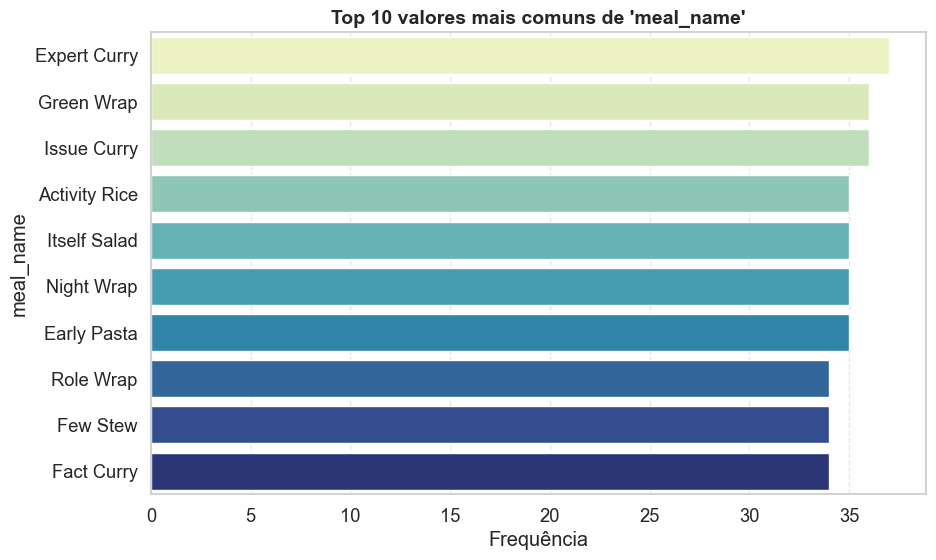

C:\Users\dayve\AppData\Local\Temp\ipykernel_3088\115107281.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette='YlGnBu')


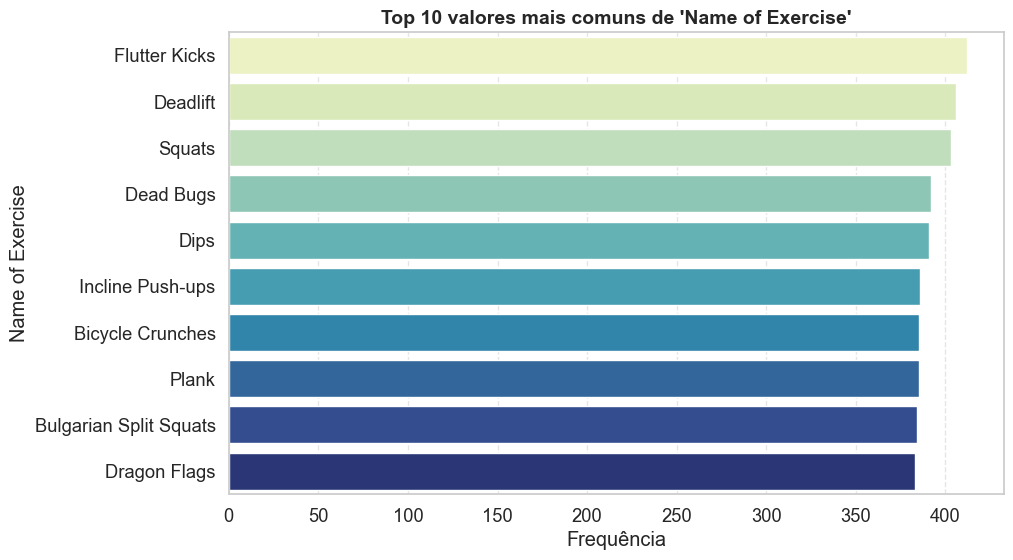

C:\Users\dayve\AppData\Local\Temp\ipykernel_3088\115107281.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette='YlGnBu')


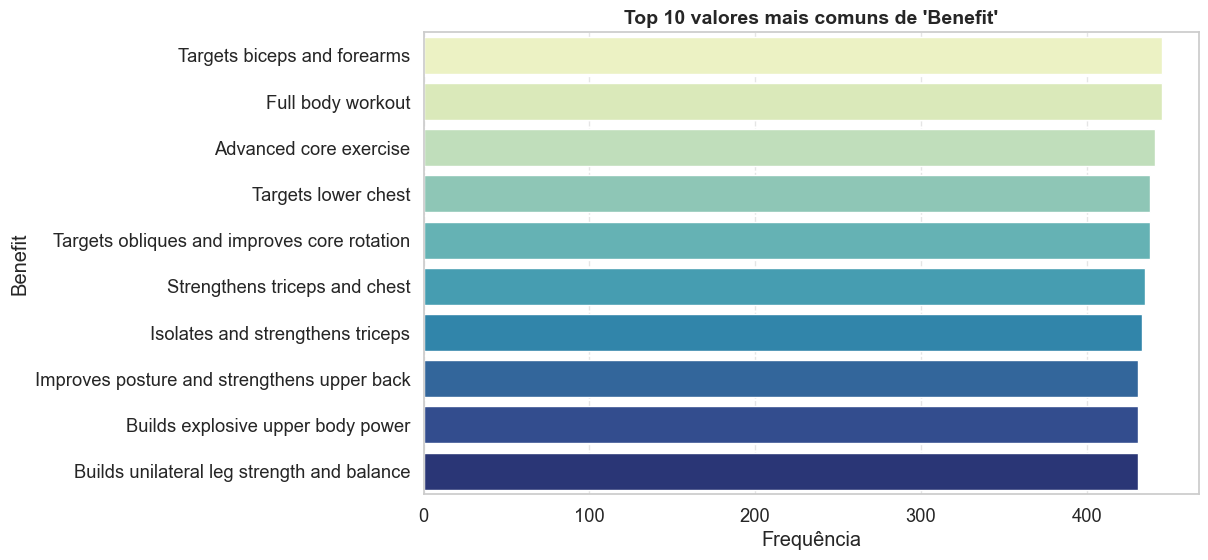

C:\Users\dayve\AppData\Local\Temp\ipykernel_3088\115107281.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette='YlGnBu')


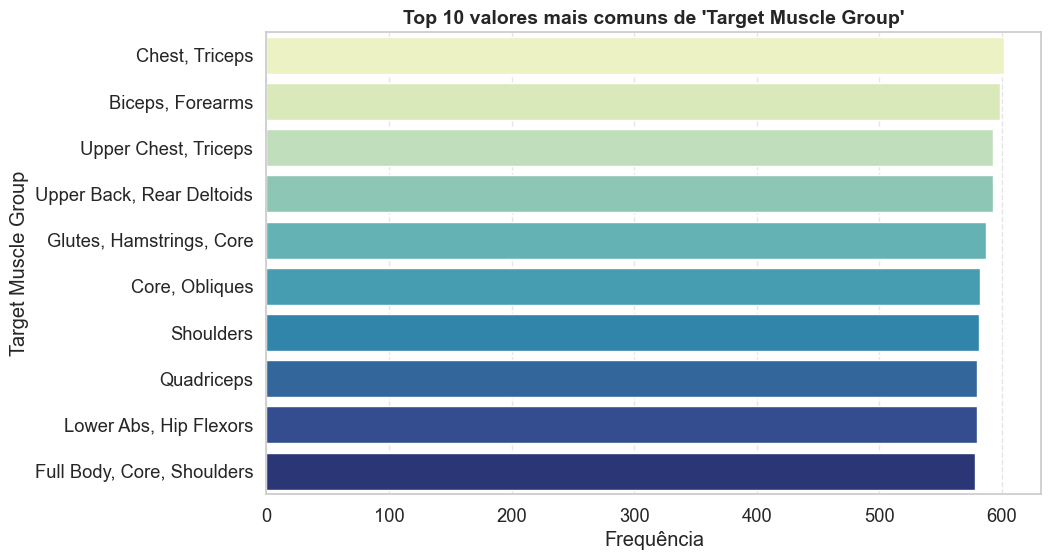

C:\Users\dayve\AppData\Local\Temp\ipykernel_3088\115107281.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette='YlGnBu')


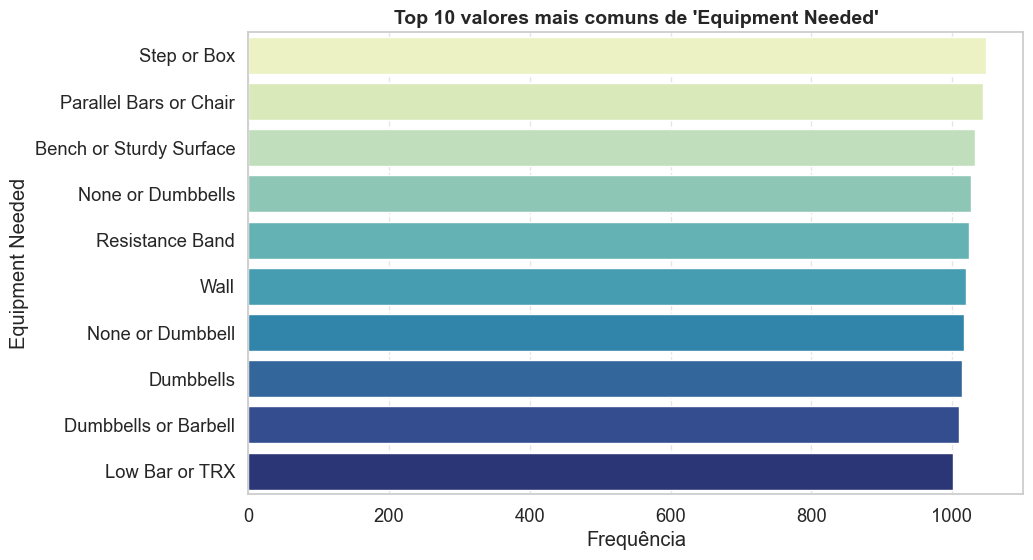

C:\Users\dayve\AppData\Local\Temp\ipykernel_3088\115107281.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette='YlGnBu')


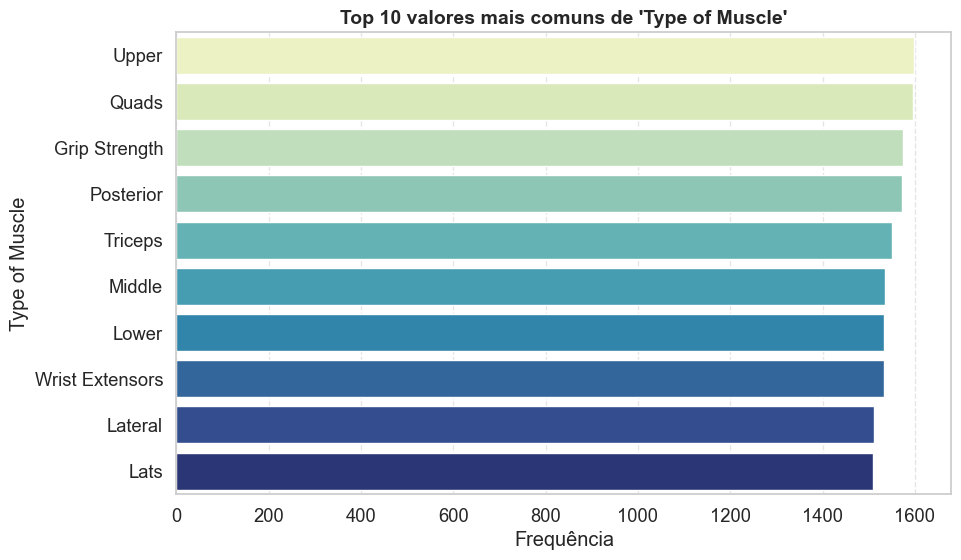

In [102]:
def plot_top_categories(df, col, top_n=10):
    value_counts = df[col].value_counts().head(top_n)

    plt.figure(figsize=(10,6))
    sns.barplot(x=value_counts.values, y=value_counts.index, palette='YlGnBu')
    plt.title(f"Top {top_n} valores mais comuns de '{col}'", fontsize=14, fontweight='bold')
    plt.xlabel('Frequência')
    plt.ylabel(col)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.show()

#Exemplo:
for c in ['meal_name', 'Name of Exercise', 'Benefit', 'Target Muscle Group', 'Equipment Needed', 'Type of Muscle']:plot_top_categories(df, c, top_n=10)


In [103]:
def combine_rare_categories(df, col, threshold=0.01):
    freq = df[col].value_counts(normalize=True)
    rare = freq[freq < threshold].index
    df[col] = df[col]. replace(rare, 'Other')
    return df

# Exemplo: agrupar nomes de refeições raros abaixo de 1% de frequência
df = combine_rare_categories(df, 'meal_name', threshold=0.01)

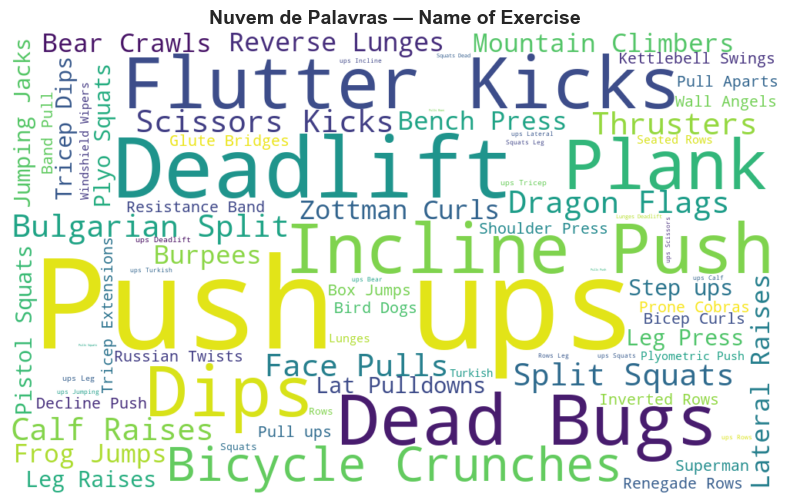

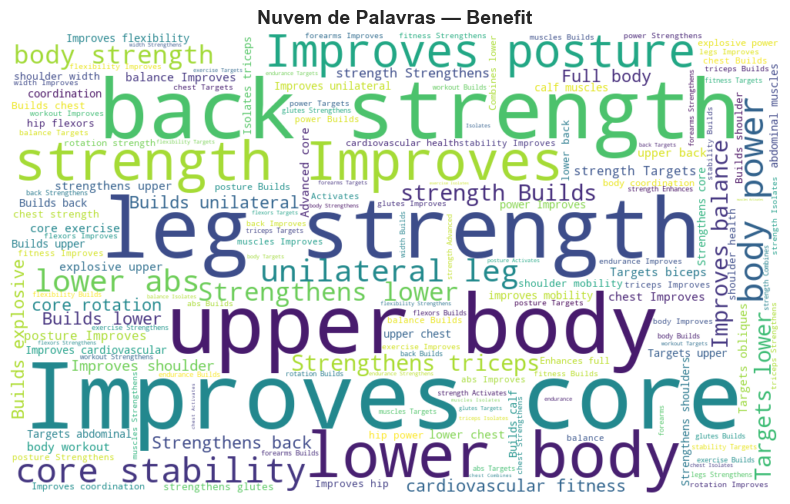

In [104]:
def plot_wordcloud(df, col):
    text = ' '.join(str(v) for v in df[col].dropna())
    wc = WordCloud(width=1000, height=600, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Nuvem de Palavras — {col}", fontsize=14, fontweight='bold')
    plt.show()

#Exemplo:
plot_wordcloud(df, 'Name of Exercise')
plot_wordcloud(df, 'Benefit')

In [105]:
def show_summary_table(df, col, top_n=10):
    summary = df[col].value_counts().head(top_n).reset_index()
    summary.columns = [col, 'Frequência']
    summary['Porcentagem'] = (summary['Frequência'] / len(df) * 100).round(2)
    return summary

show_summary_table(df, 'Target Muscle Group')

Target Muscle Group  Frequência  Porcentagem
0              Chest, Triceps         602         3.01
1            Biceps, Forearms         598         2.99
2        Upper Chest, Triceps         593         2.96
3   Upper Back, Rear Deltoids         593         2.96
4    Glutes, Hamstrings, Core         587         2.94
5              Core, Obliques         582         2.91
6                   Shoulders         581         2.90
7                  Quadriceps         580         2.90
8      Lower Abs, Hip Flexors         580         2.90
9  Full Body, Core, Shoulders         578         2.89

In [106]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(numerical_cols)

Index(['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)',
       'Experience_Level', 'BMI', 'Daily meals frequency', 'Physical exercise',
       'Carbs', 'Proteins', 'Fats', 'Calories', 'sugar_g', 'sodium_mg',
       'cholesterol_mg', 'serving_size_g', 'prep_time_min', 'cook_time_min',
       'rating', 'is_healthy', 'Sets', 'Reps', 'Burns Calories (per 30 min)',
       'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg', 'pct_HRR',
       'pct_maxHR', 'cal_balance', 'lean_mass_kg', 'expected_burn'],
      dtype='object')


# Agrupamento Lógico de Variáveis Numéricas

| **Grupo**                                                | **Features (Variáveis)**                                                                                                                                                                                                   | **Descrição**                                        | **Paleta**   |
| -------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------- | ------------ |
| **Grupo 1 — Composição Corporal & Sinais Vitais**        | `['Age', 'Weight (kg)', 'Height (m)', 'BMI', 'Fat_Percentage', 'lean_mass_kg']`                                                                                                                                            | Métricas demográficas e de estrutura corporal        | 🔵 'Blues'   |
| **Grupo 2 — Frequência Cardíaca & Desempenho no Treino** | `['Max_BPM', 'Avg_BPM', 'Resting_BPM', 'pct_HRR', 'pct_maxHR', 'Session_Duration (hours)', 'Calories_Burned', 'expected_burn', 'Burns Calories (per 30 min)']`                                                             | Intensidade do exercício e desempenho cardiovascular | ❤️ 'Reds'    |
| **Grupo 3 — Nutrição & Consumo**                         | `['Water_Intake (liters)', 'Daily meals frequency', 'Carbs', 'Proteins', 'Fats', 'Calories', 'sugar_g', 'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'cal_from_macros', 'pct_carbs', 'protein_per_kg', 'cal_balance']` | Componentes dietéticos e nutricionais                | 🟢 'Greens'  |
| **Grupo 4 — Estrutura do Treino & Avaliações**           | `['Workout_Frequency (days/week)', 'Experience_Level', 'Sets', 'Reps', 'prep_time_min', 'cook_time_min', 'rating', 'is_healthy', 'BMI_calc', 'Physical exercise']`                                                         | Frequência, habilidade e qualidade do treino         | 🟣 'Purples' |



📊 ANÁLISE - GRUPO 1 - Composição Corporal e Sinais Vitais



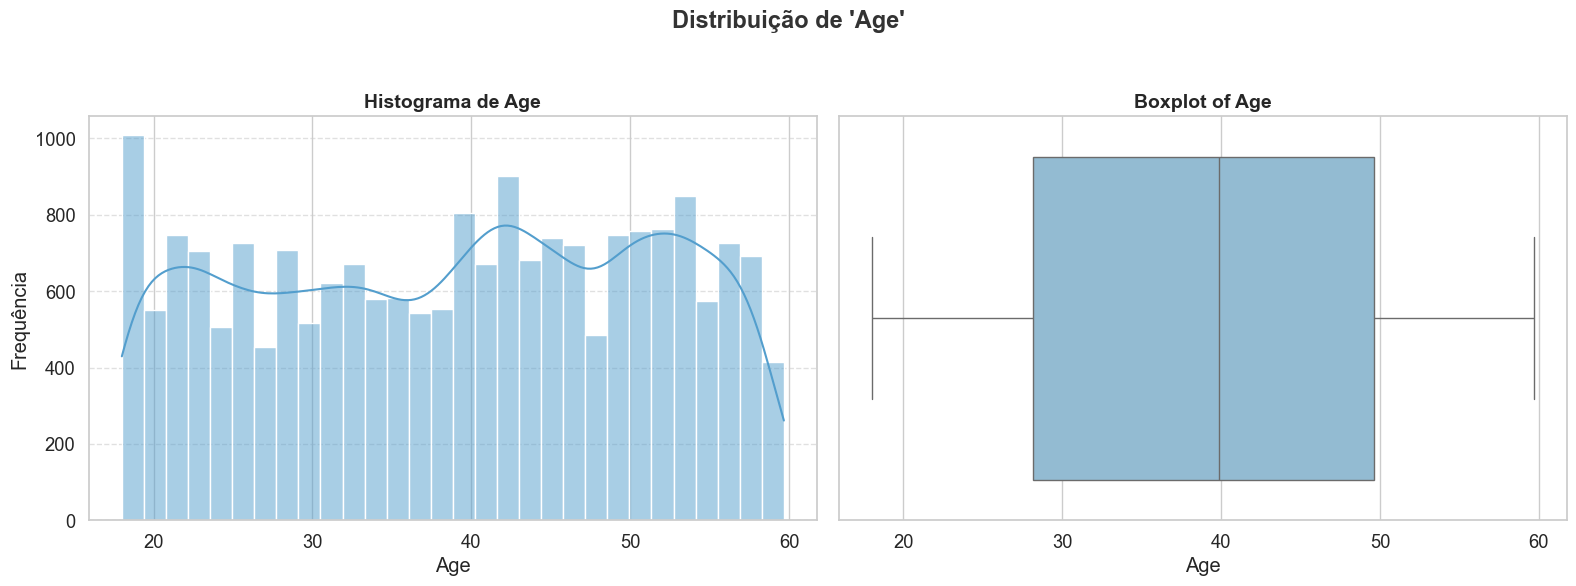

🔹 **Age**
- Count: 20000
- Mean: 38.85
- Median: 39.86
- Std Dev: 12.11
- Min: 18.00
- Max: 59.67
----------------------------------------------------------------------


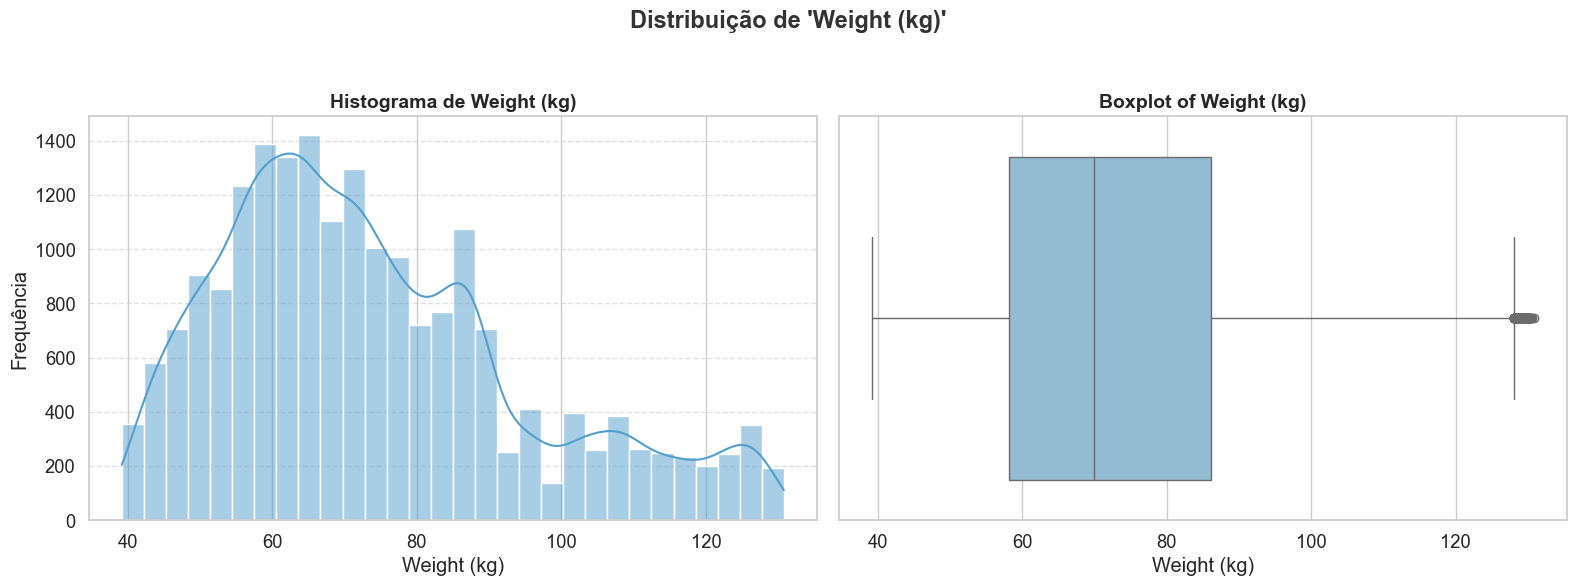

🔹 **Weight (kg)**
- Count: 20000
- Mean: 73.90
- Median: 70.00
- Std Dev: 21.17
- Min: 39.18
- Max: 130.77
----------------------------------------------------------------------


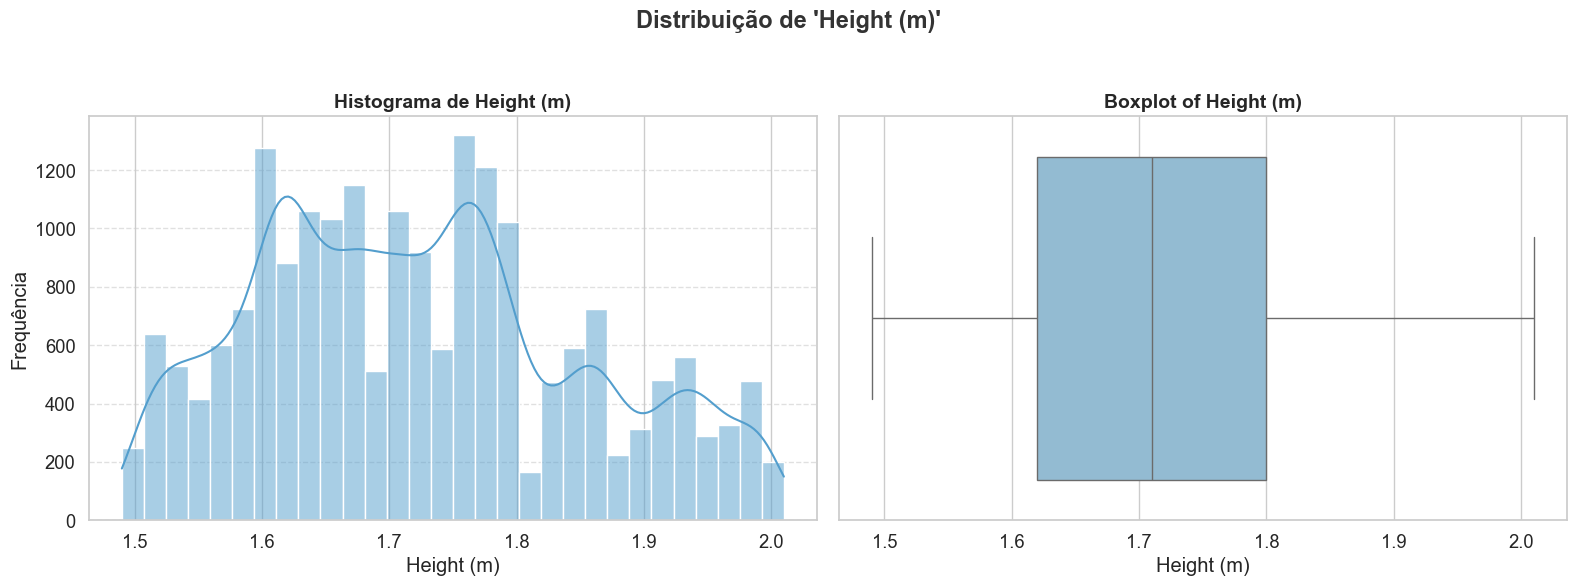

🔹 **Height (m)**
- Count: 20000
- Mean: 1.72
- Median: 1.71
- Std Dev: 0.13
- Min: 1.49
- Max: 2.01
----------------------------------------------------------------------


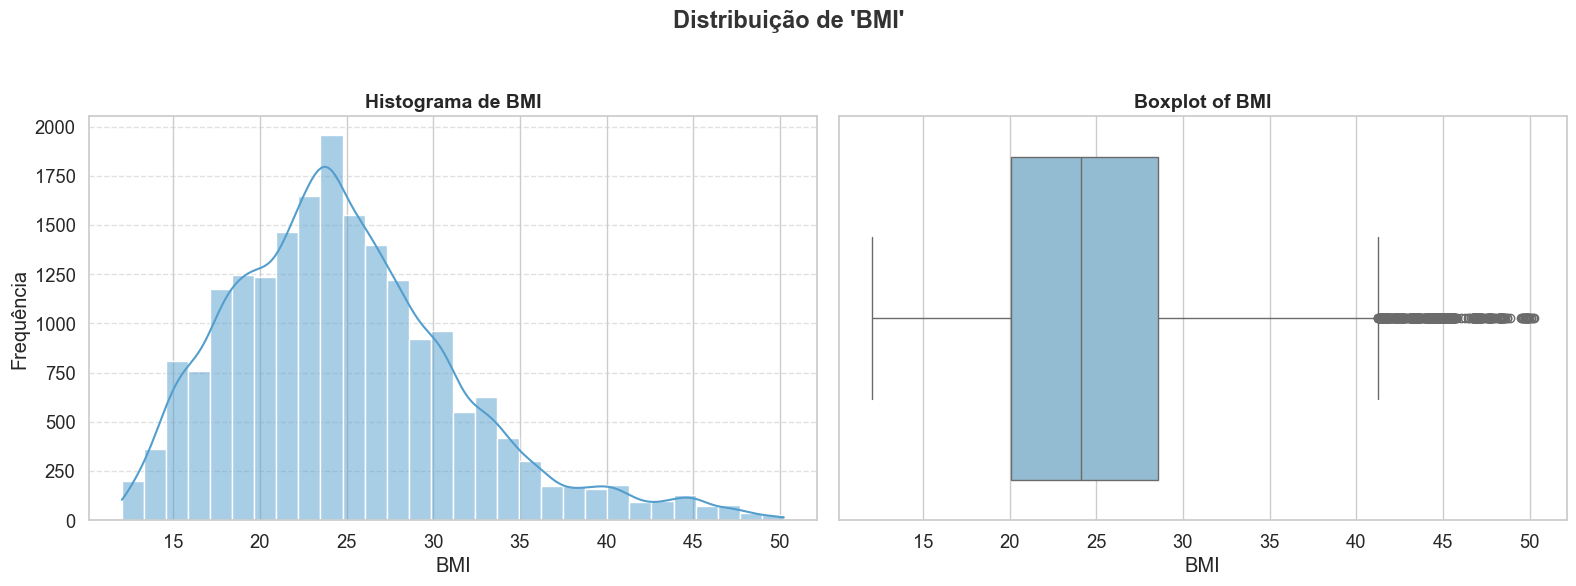

🔹 **BMI**
- Count: 20000
- Mean: 24.92
- Median: 24.12
- Std Dev: 6.70
- Min: 12.04
- Max: 50.23
----------------------------------------------------------------------


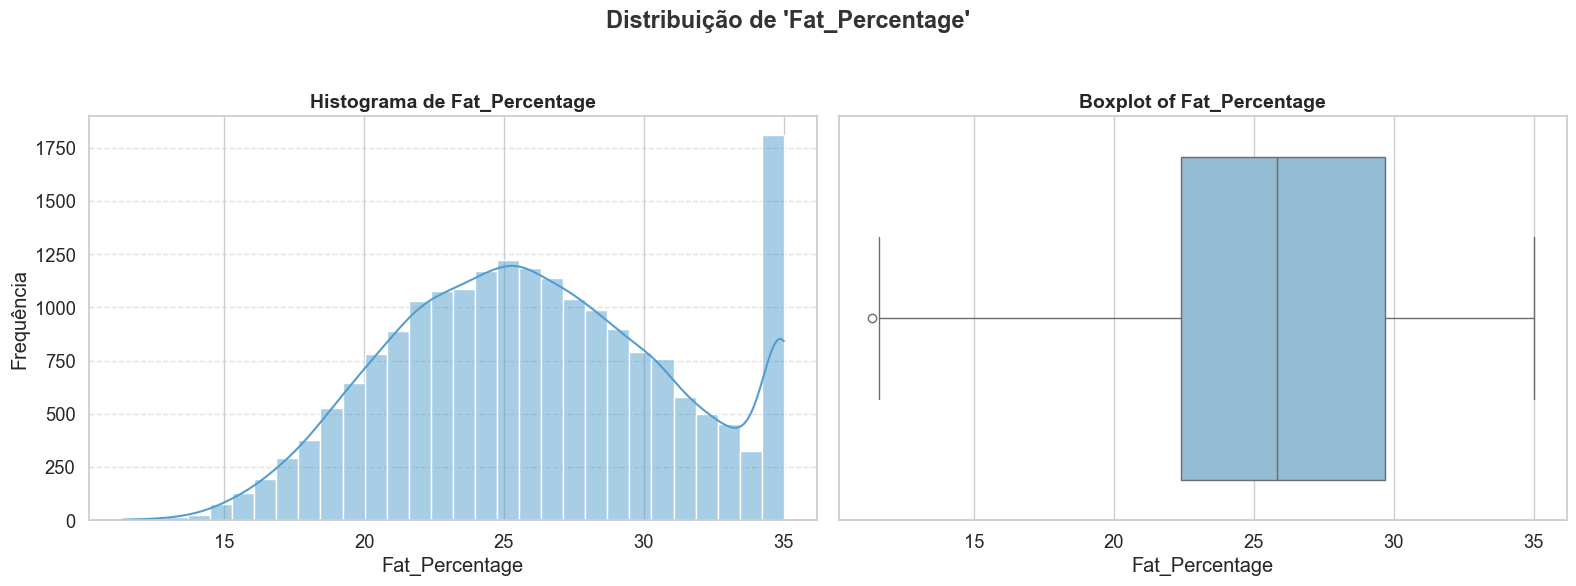

🔹 **Fat_Percentage**
- Count: 20000
- Mean: 26.10
- Median: 25.82
- Std Dev: 5.00
- Min: 11.33
- Max: 35.00
----------------------------------------------------------------------


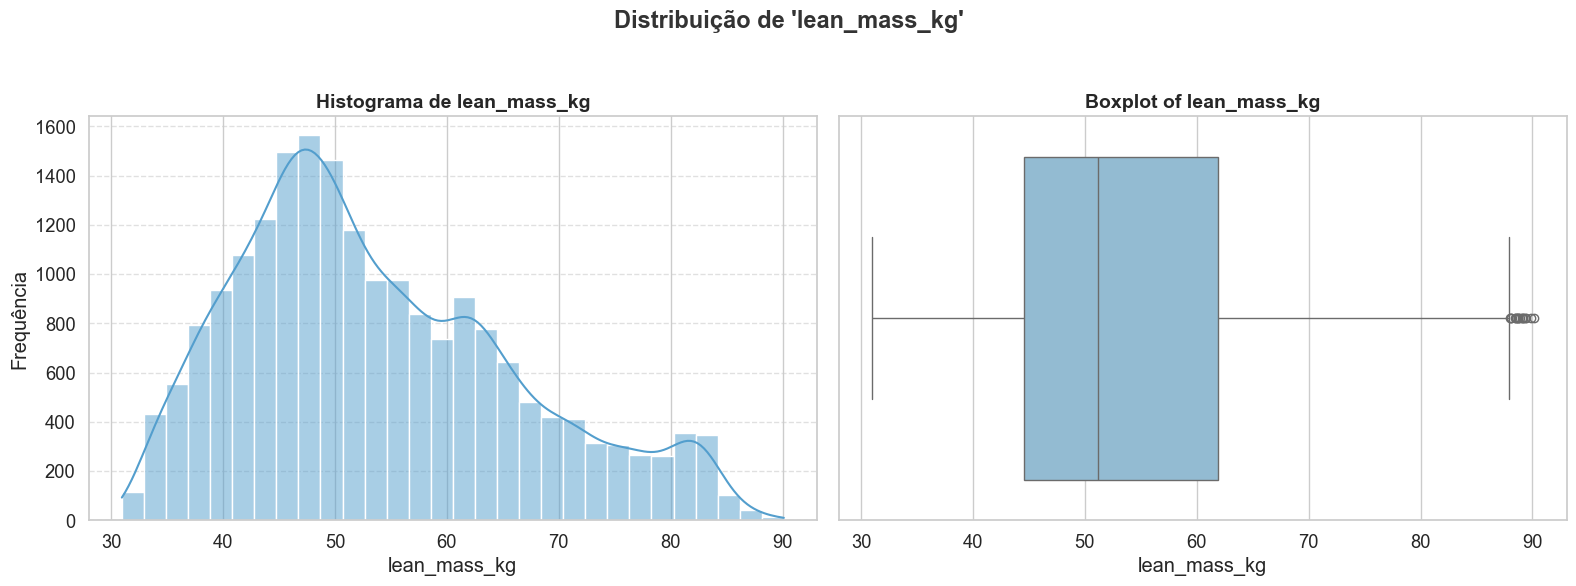

🔹 **lean_mass_kg**
- Count: 20000
- Mean: 53.79
- Median: 51.20
- Std Dev: 12.50
- Min: 30.95
- Max: 90.12
----------------------------------------------------------------------

📊 ANÁLISE - GRUPO 2 — Frequência Cardíaca & Desempenho no Treino



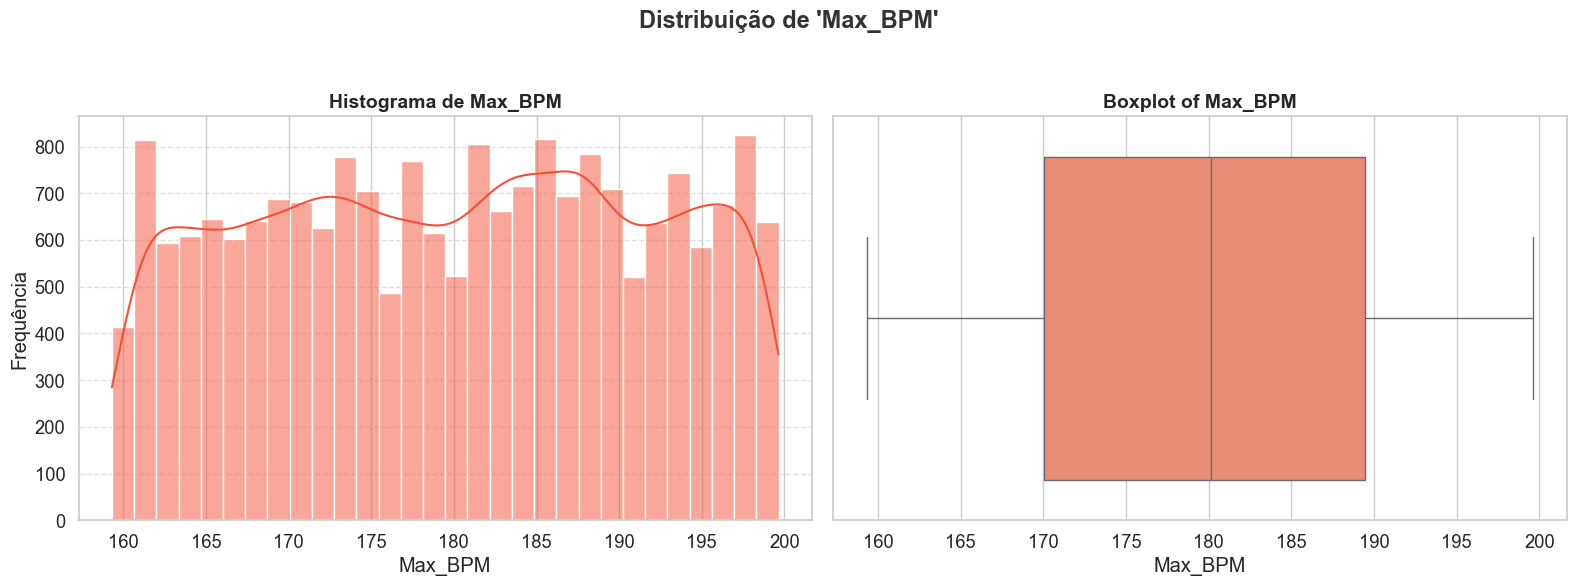

🔹 **Max_BPM**
- Count: 20000
- Mean: 179.89
- Median: 180.14
- Std Dev: 11.51
- Min: 159.31
- Max: 199.64
----------------------------------------------------------------------


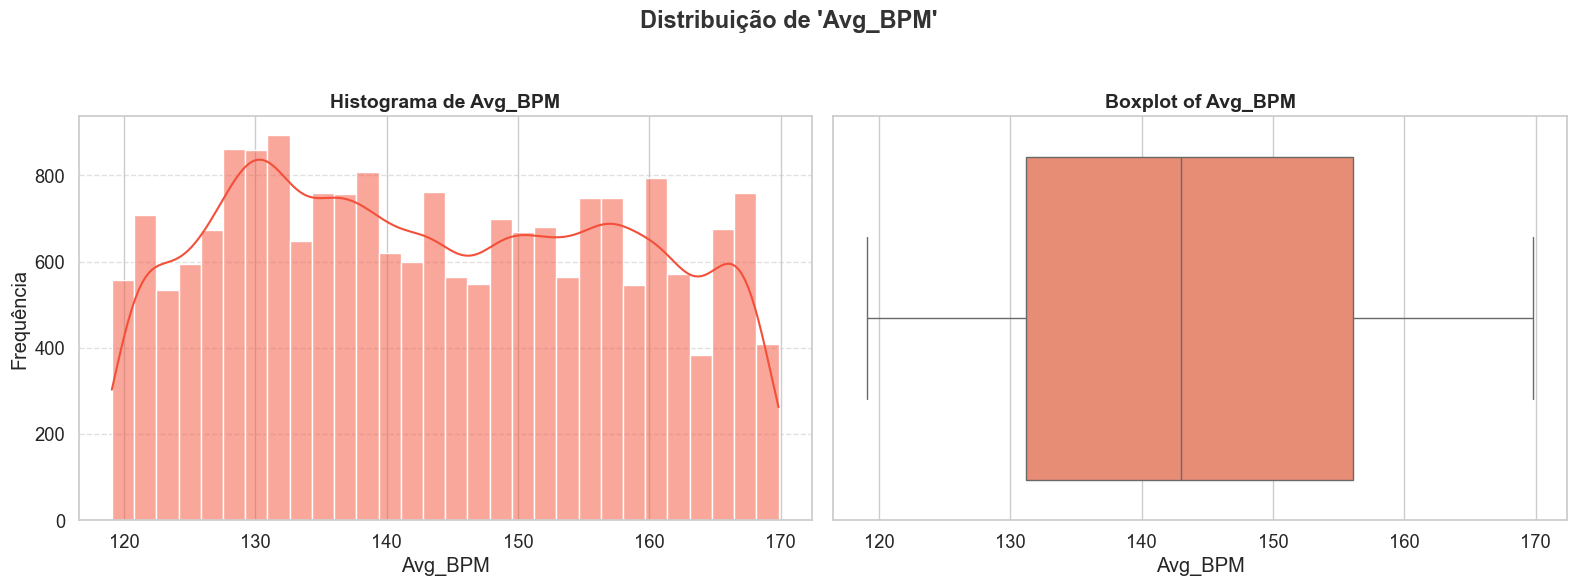

🔹 **Avg_BPM**
- Count: 20000
- Mean: 143.70
- Median: 142.99
- Std Dev: 14.27
- Min: 119.07
- Max: 169.84
----------------------------------------------------------------------


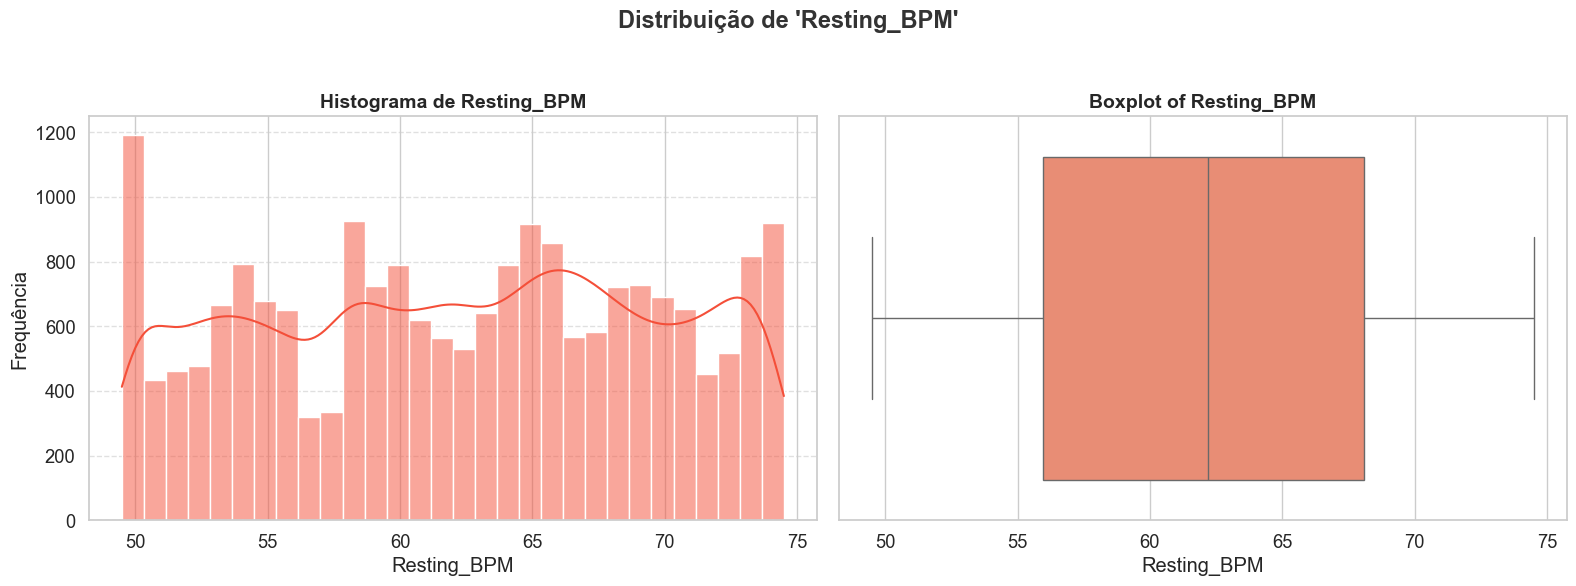

🔹 **Resting_BPM**
- Count: 20000
- Mean: 62.20
- Median: 62.20
- Std Dev: 7.29
- Min: 49.49
- Max: 74.50
----------------------------------------------------------------------


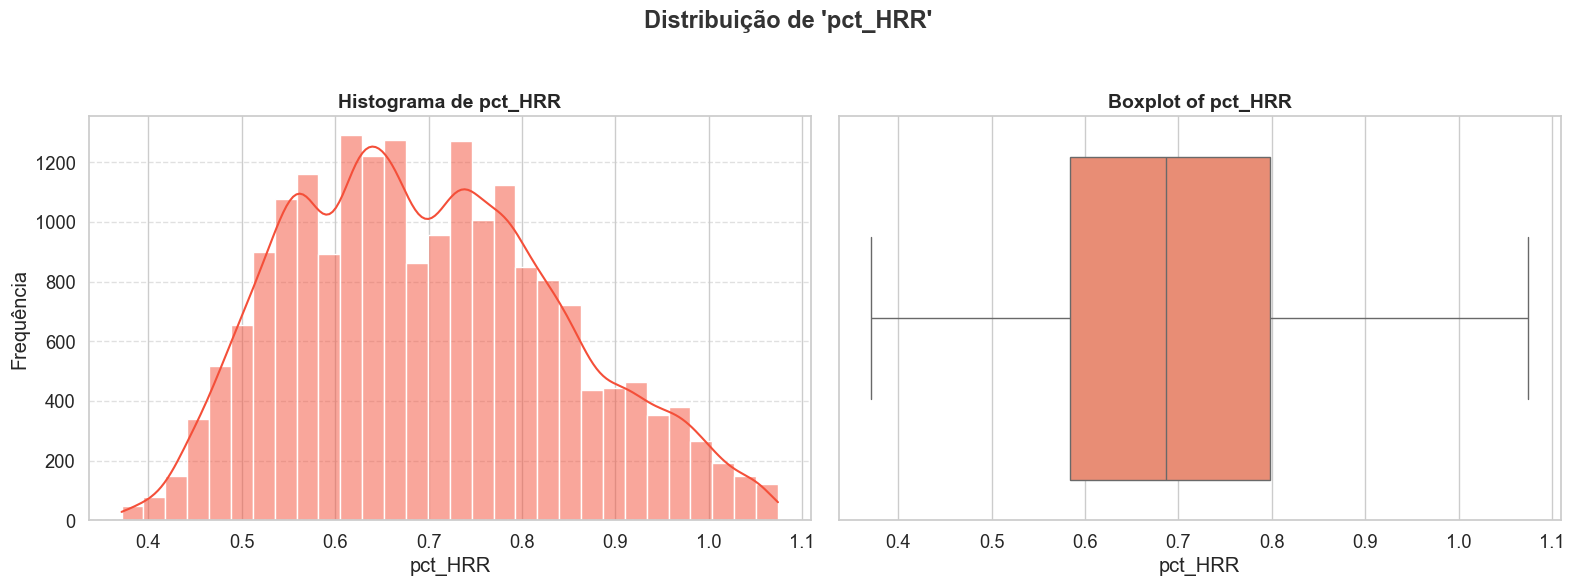

🔹 **pct_HRR**
- Count: 20000
- Mean: 0.70
- Median: 0.69
- Std Dev: 0.14
- Min: 0.37
- Max: 1.07
----------------------------------------------------------------------


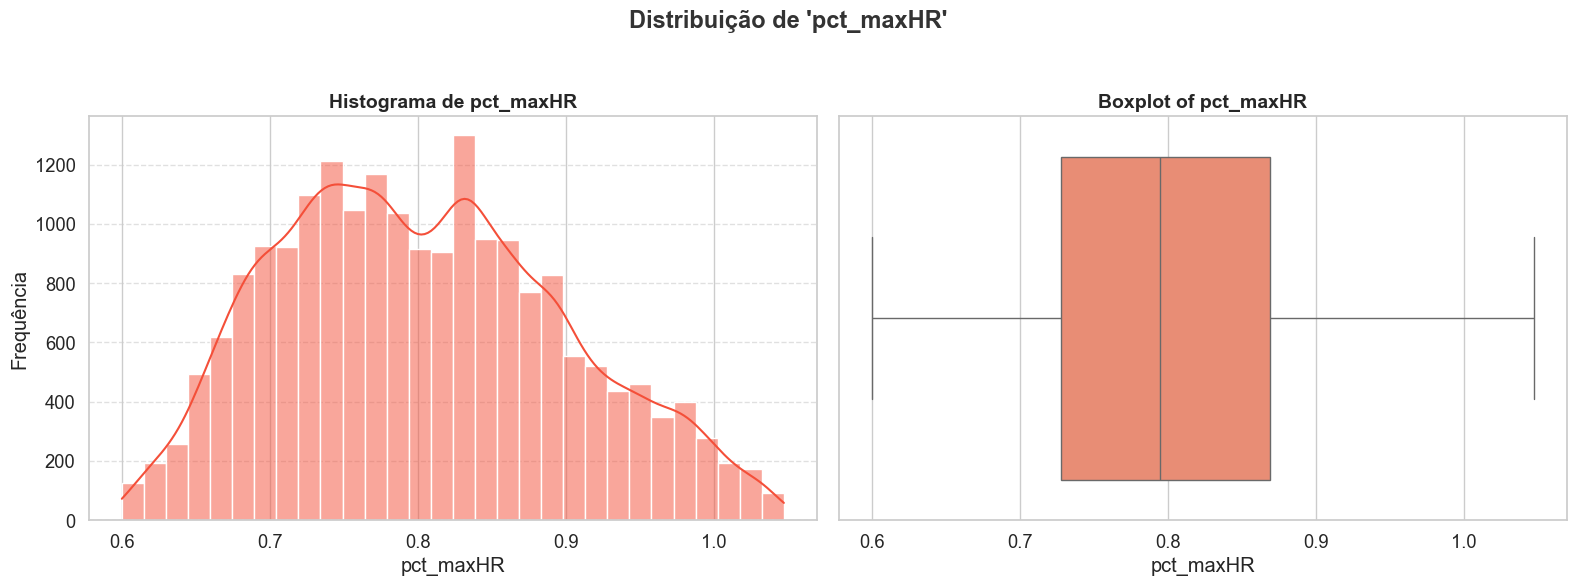

🔹 **pct_maxHR**
- Count: 20000
- Mean: 0.80
- Median: 0.79
- Std Dev: 0.10
- Min: 0.60
- Max: 1.05
----------------------------------------------------------------------


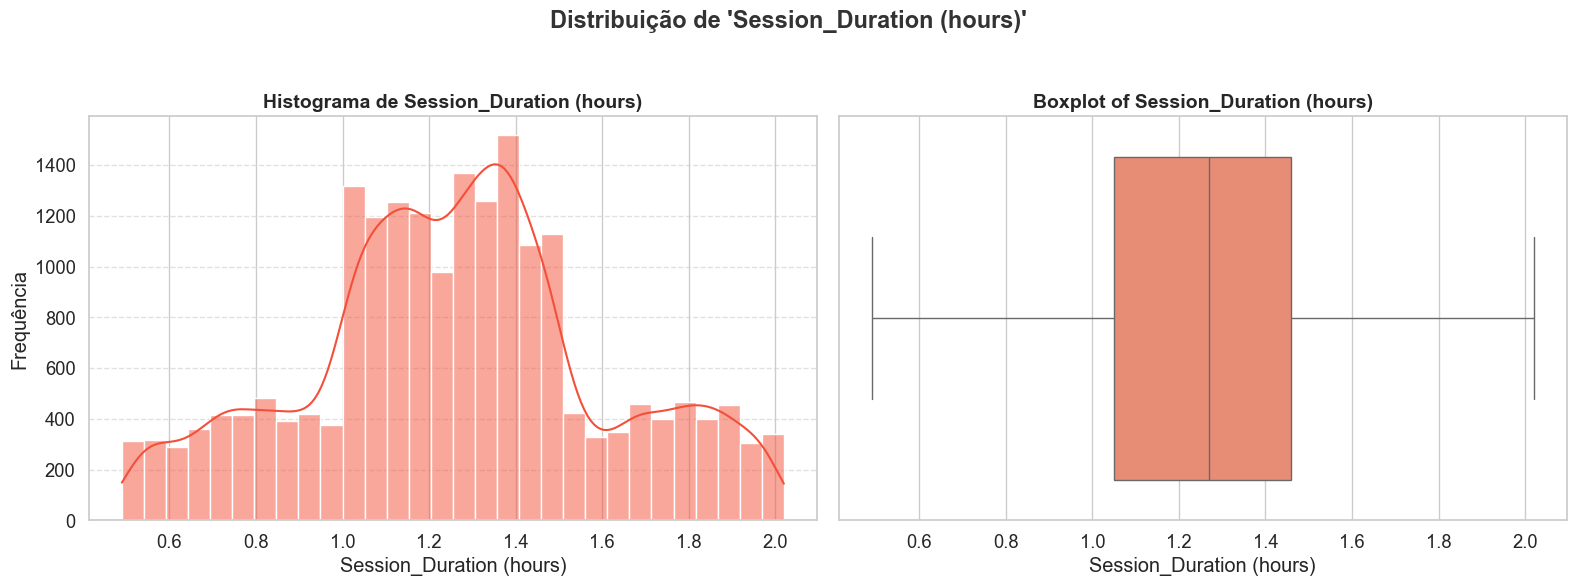

🔹 **Session_Duration (hours)**
- Count: 20000
- Mean: 1.26
- Median: 1.27
- Std Dev: 0.34
- Min: 0.49
- Max: 2.02
----------------------------------------------------------------------


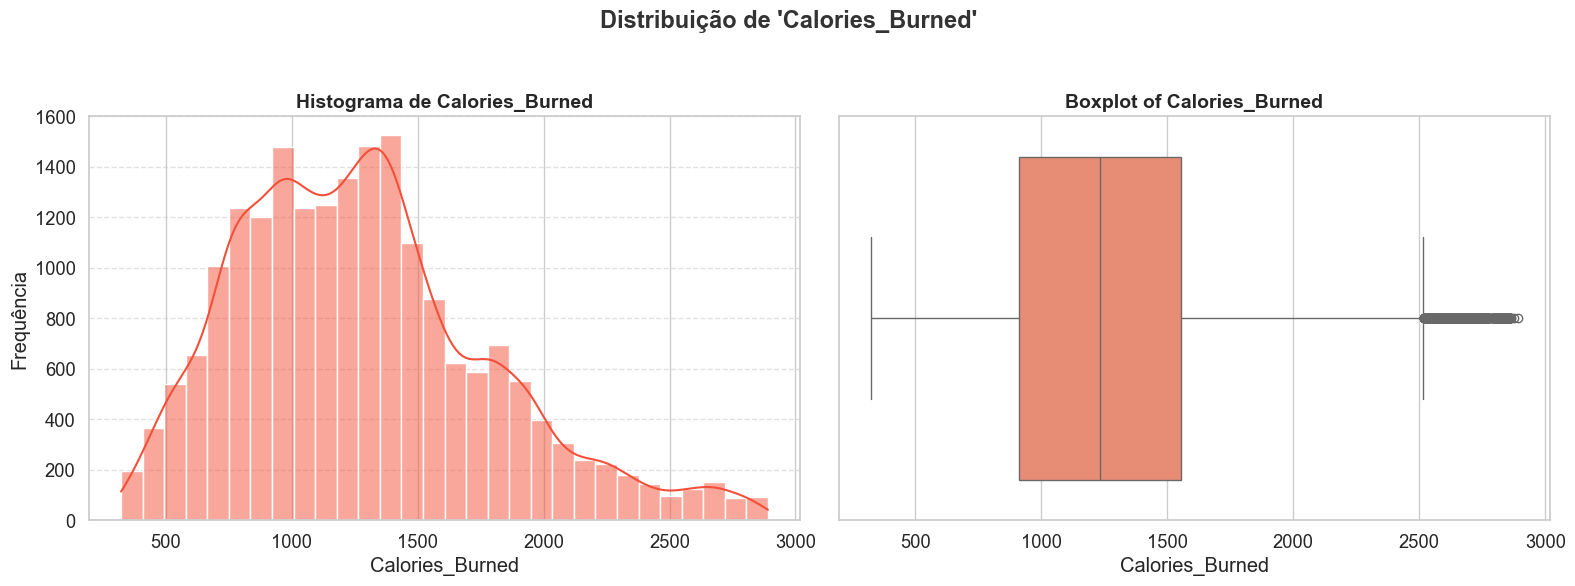

🔹 **Calories_Burned**
- Count: 20000
- Mean: 1280.11
- Median: 1231.45
- Std Dev: 502.23
- Min: 323.11
- Max: 2890.82
----------------------------------------------------------------------


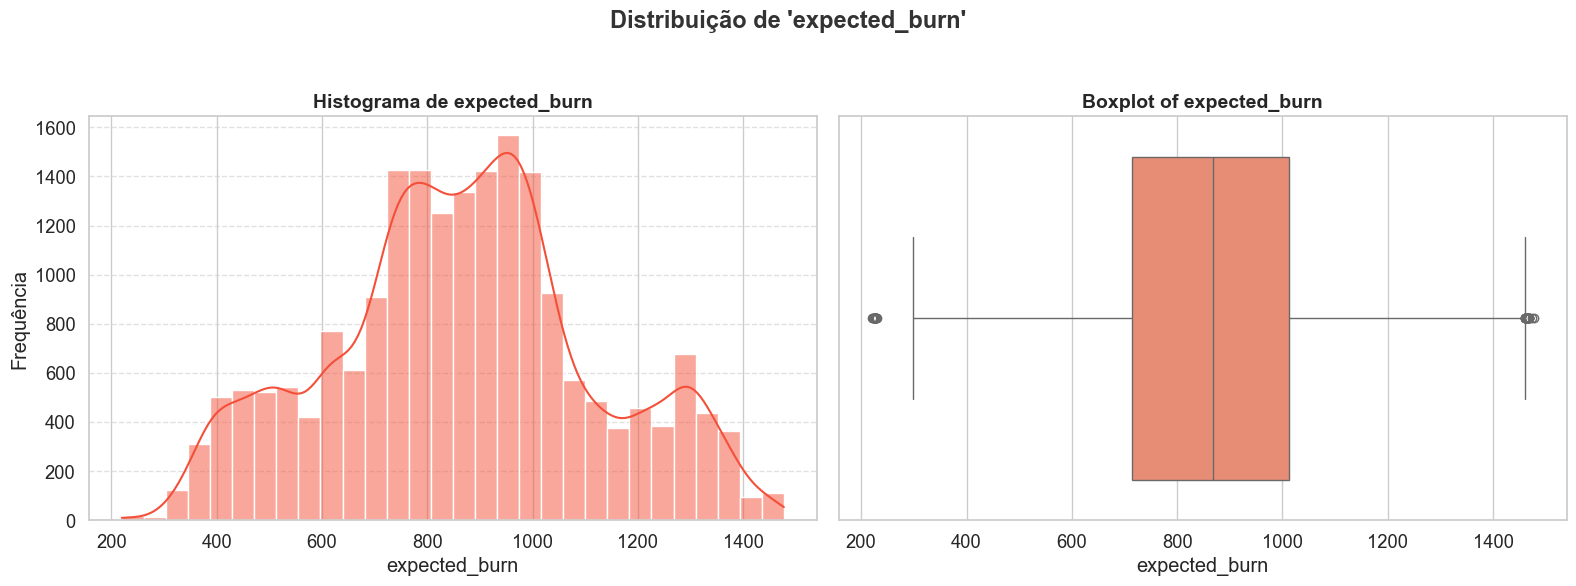

🔹 **expected_burn**
- Count: 20000
- Mean: 866.35
- Median: 868.72
- Std Dev: 250.32
- Min: 219.85
- Max: 1477.11
----------------------------------------------------------------------


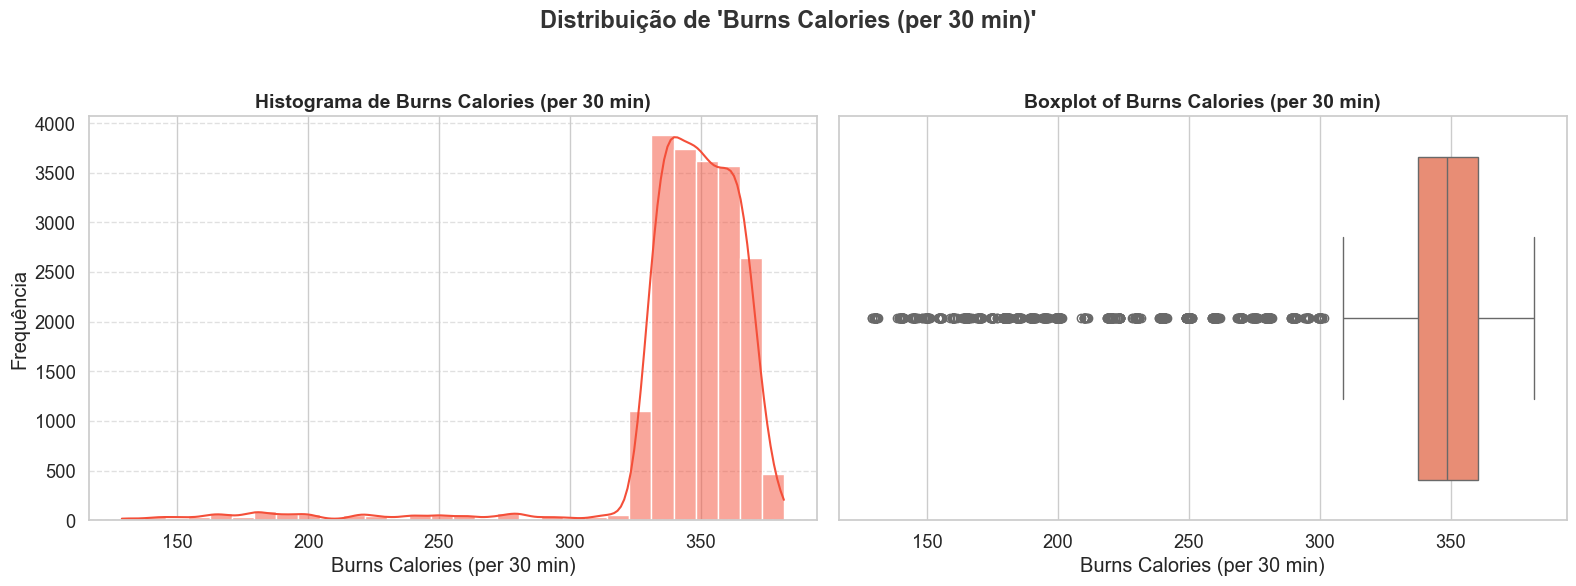

🔹 **Burns Calories (per 30 min)**
- Count: 20000
- Mean: 344.05
- Median: 348.61
- Std Dev: 32.14
- Min: 128.75
- Max: 381.71
----------------------------------------------------------------------

📊 ANÁLISE - GRUPO 3 — Nutrição & Consumo



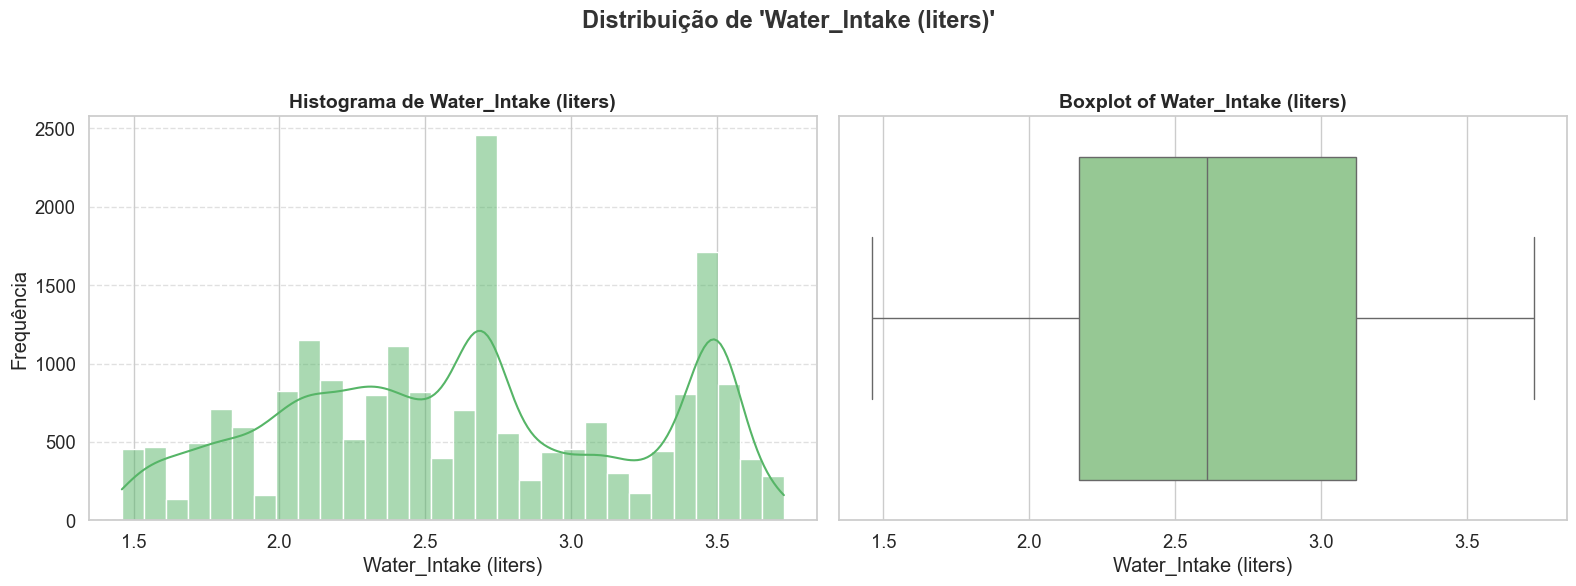

🔹 **Water_Intake (liters)**
- Count: 20000
- Mean: 2.63
- Median: 2.61
- Std Dev: 0.60
- Min: 1.46
- Max: 3.73
----------------------------------------------------------------------


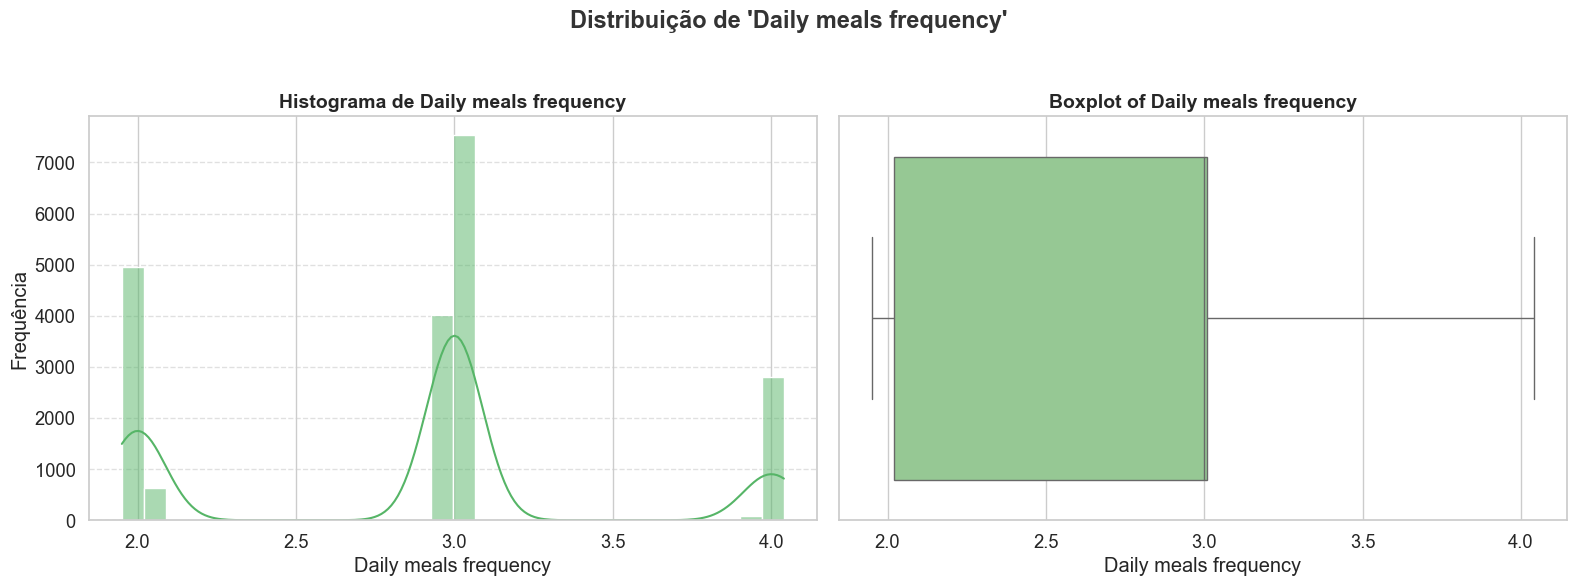

🔹 **Daily meals frequency**
- Count: 20000
- Mean: 2.86
- Median: 3.00
- Std Dev: 0.64
- Min: 1.95
- Max: 4.04
----------------------------------------------------------------------


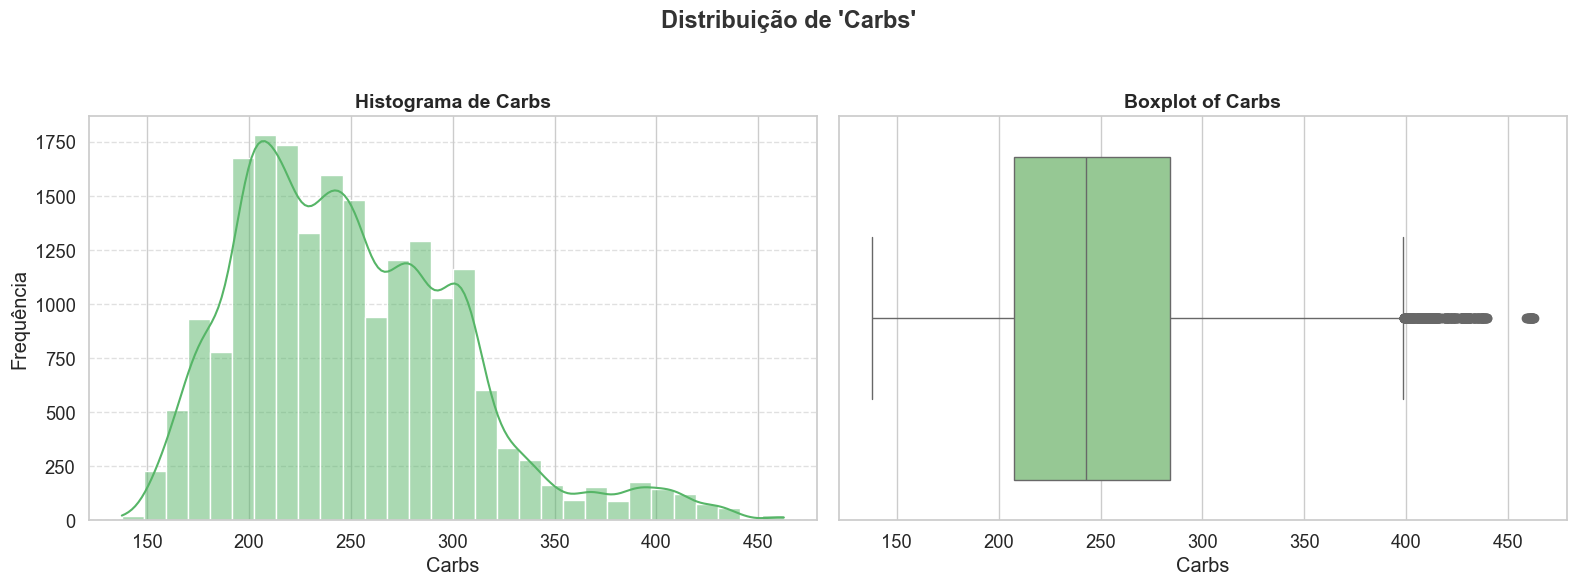

🔹 **Carbs**
- Count: 20000
- Mean: 249.78
- Median: 242.90
- Std Dev: 55.11
- Min: 137.72
- Max: 462.49
----------------------------------------------------------------------


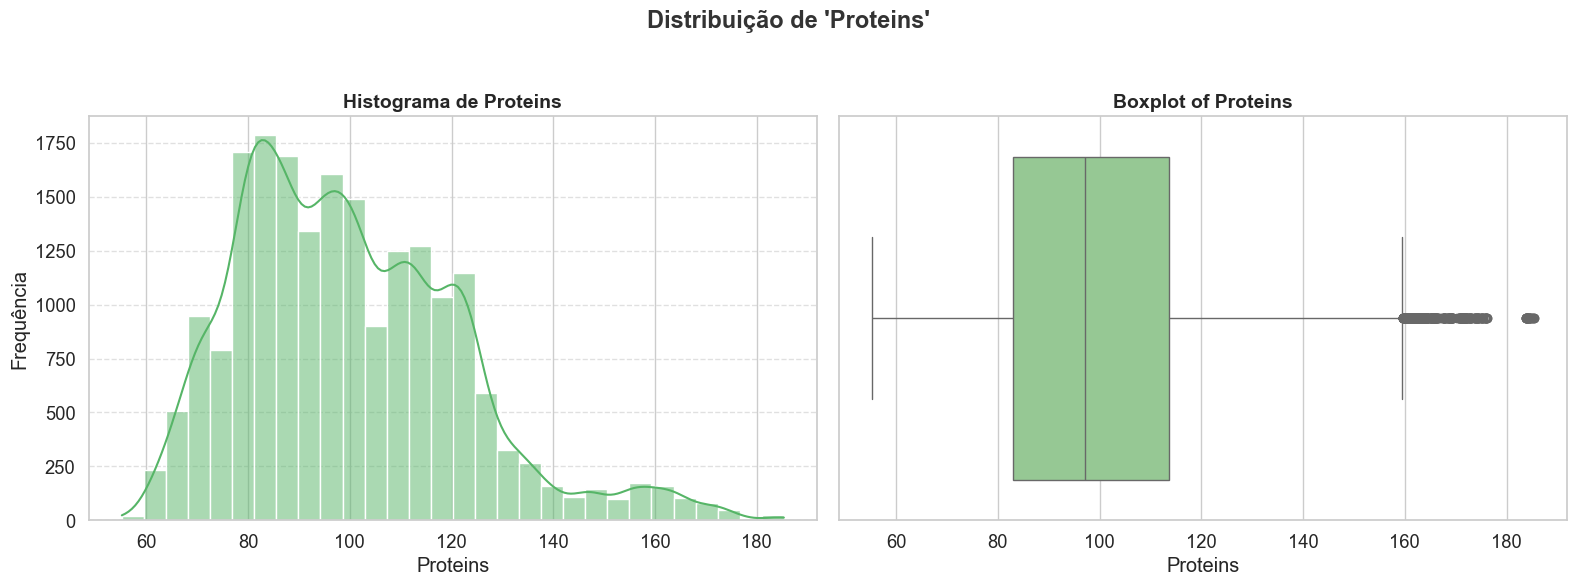

🔹 **Proteins**
- Count: 20000
- Mean: 99.92
- Median: 97.15
- Std Dev: 22.04
- Min: 55.17
- Max: 185.34
----------------------------------------------------------------------


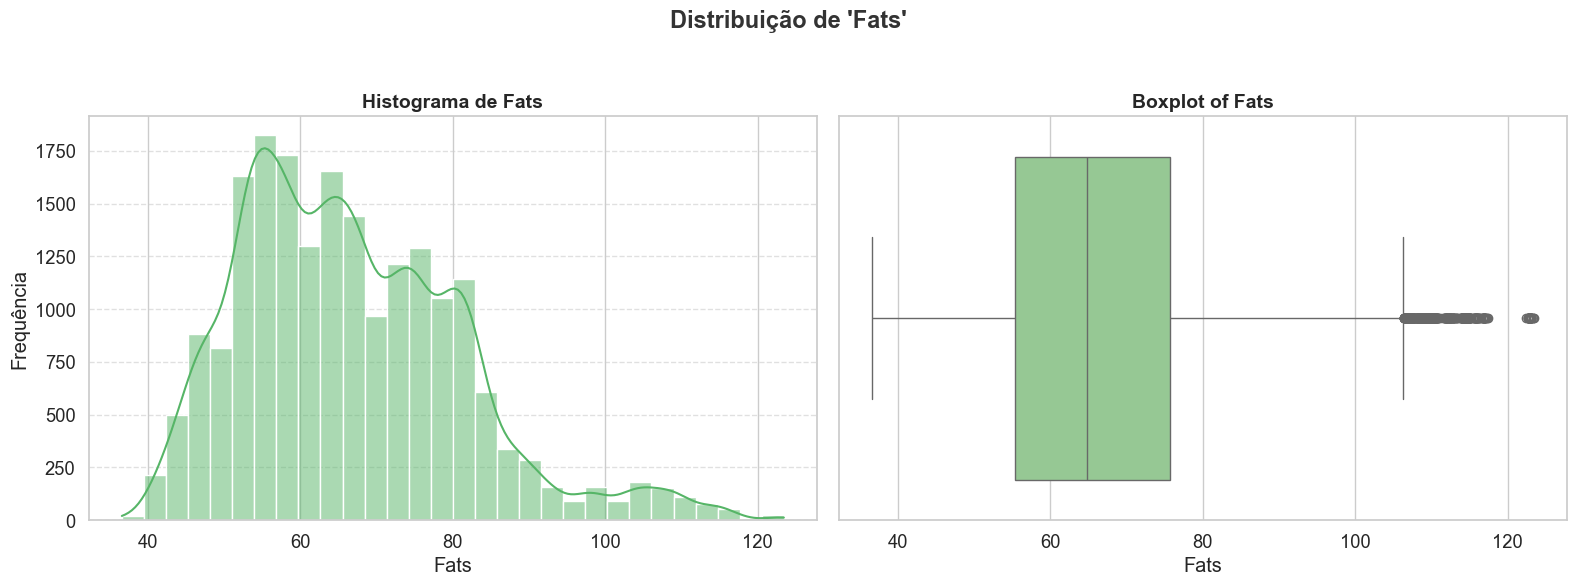

🔹 **Fats**
- Count: 20000
- Mean: 66.61
- Median: 64.77
- Std Dev: 14.70
- Min: 36.59
- Max: 123.42
----------------------------------------------------------------------


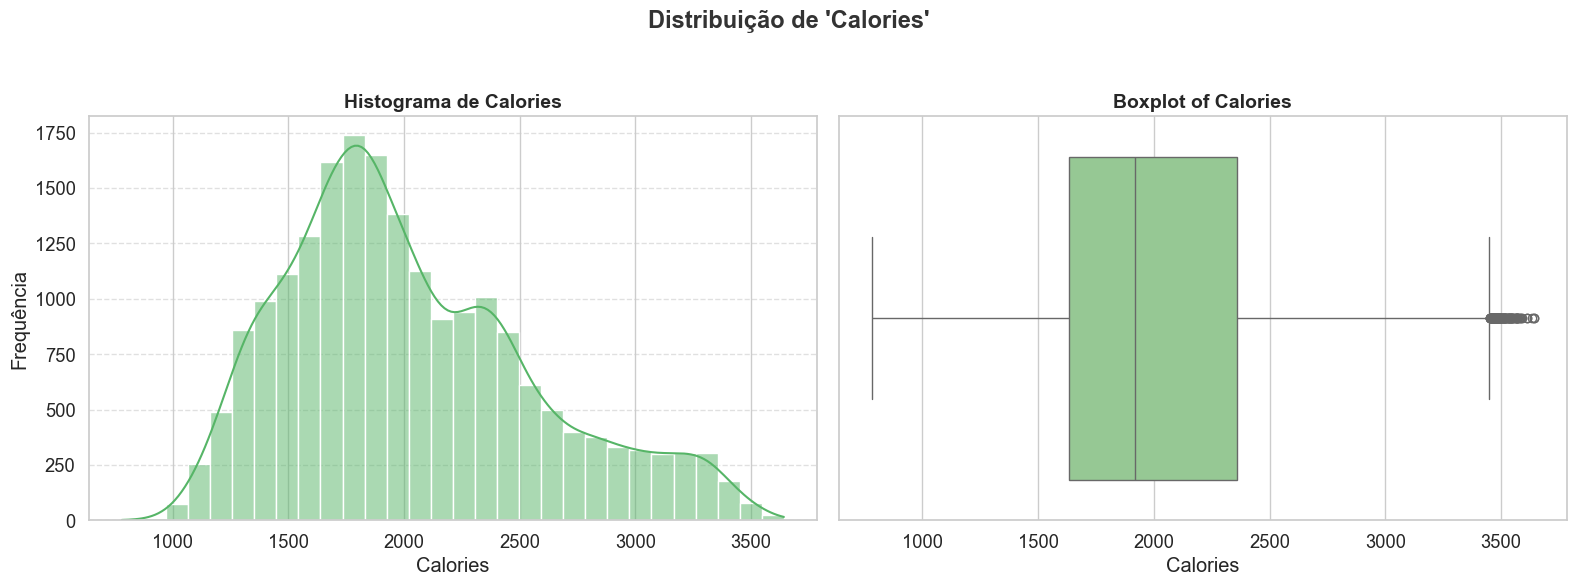

🔹 **Calories**
- Count: 20000
- Mean: 2024.42
- Median: 1919.00
- Std Dev: 541.89
- Min: 781.00
- Max: 3641.00
----------------------------------------------------------------------


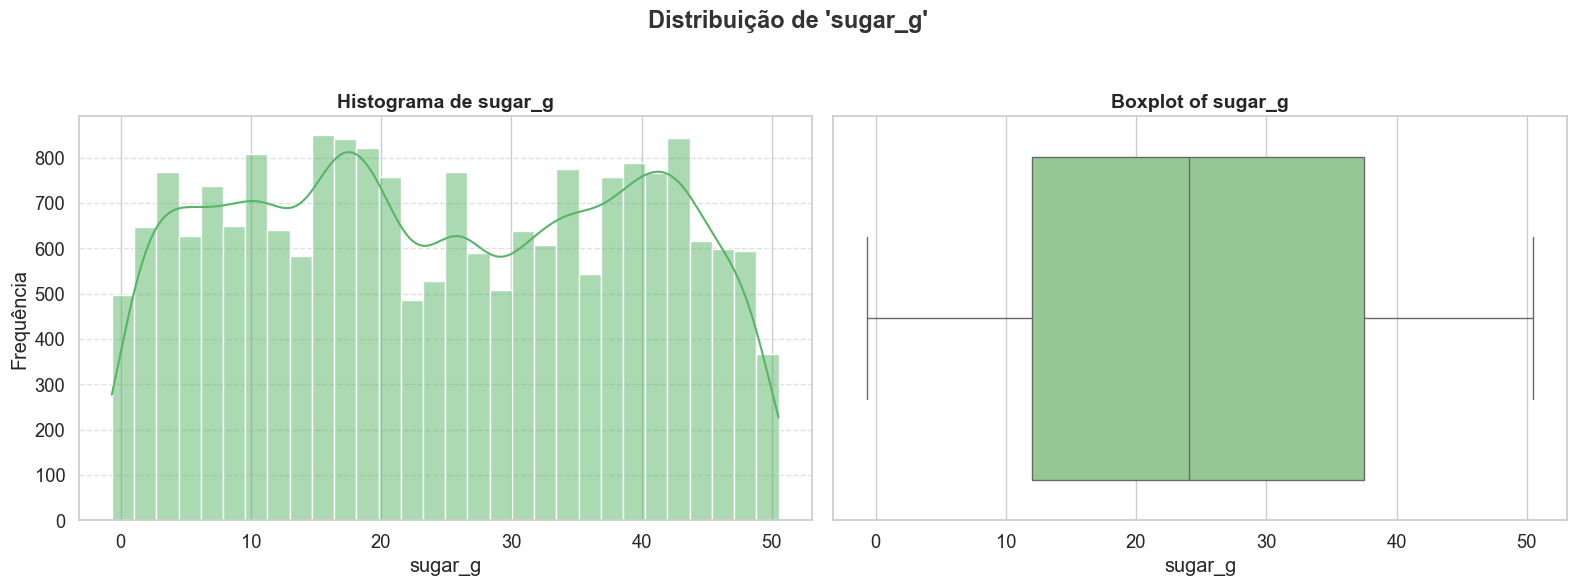

🔹 **sugar_g**
- Count: 20000
- Mean: 24.53
- Median: 24.06
- Std Dev: 14.45
- Min: -0.67
- Max: 50.51
----------------------------------------------------------------------


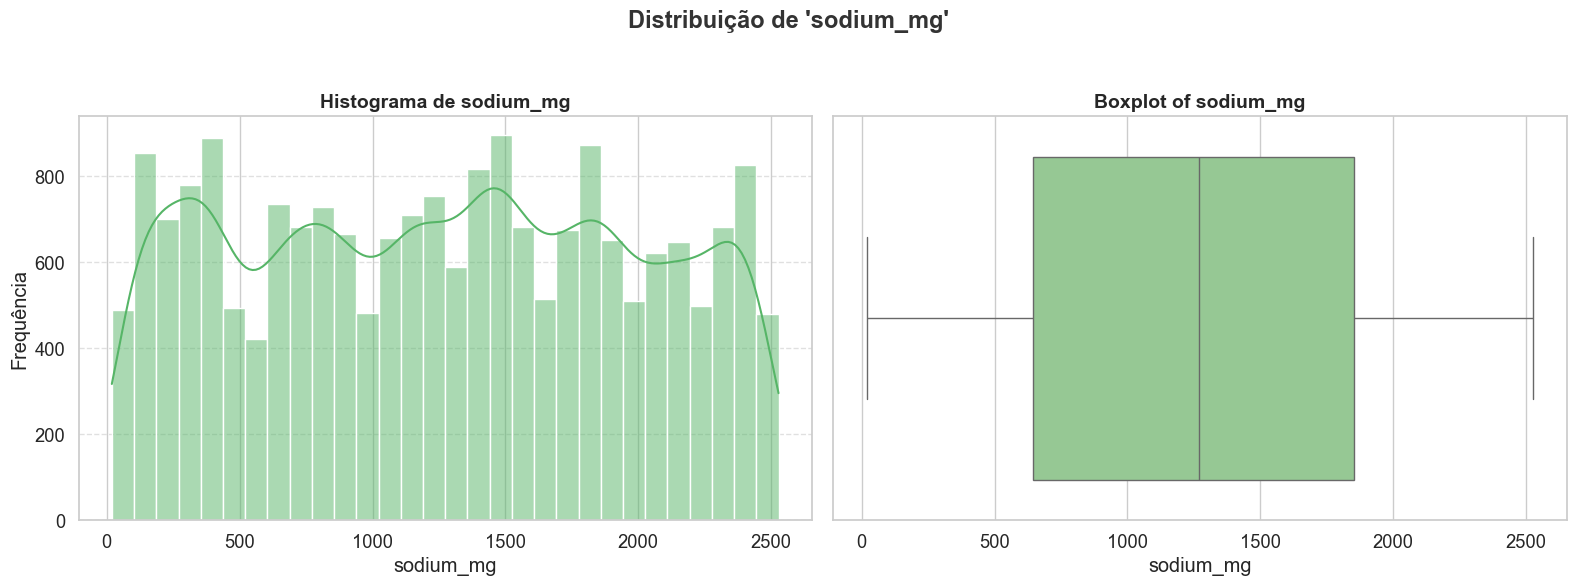

🔹 **sodium_mg**
- Count: 20000
- Mean: 1258.14
- Median: 1267.65
- Std Dev: 716.62
- Min: 19.22
- Max: 2527.27
----------------------------------------------------------------------


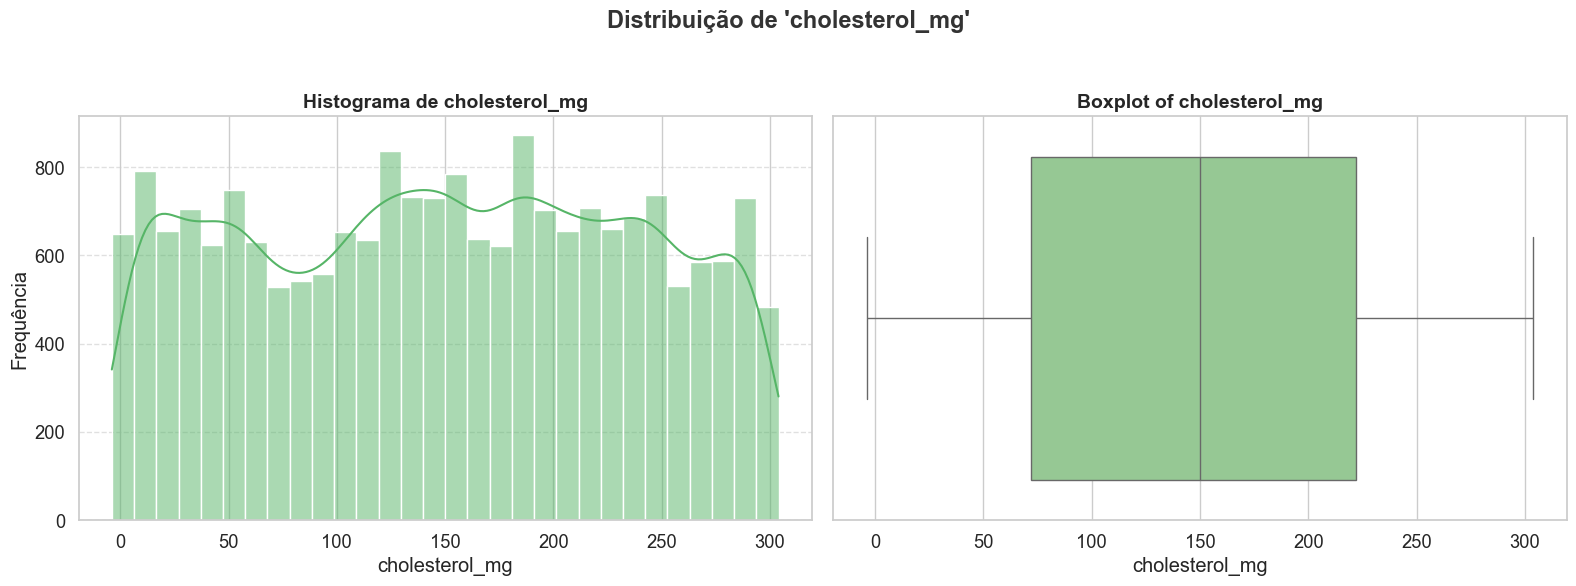

🔹 **cholesterol_mg**
- Count: 20000
- Mean: 148.47
- Median: 149.80
- Std Dev: 87.38
- Min: -3.89
- Max: 303.99
----------------------------------------------------------------------


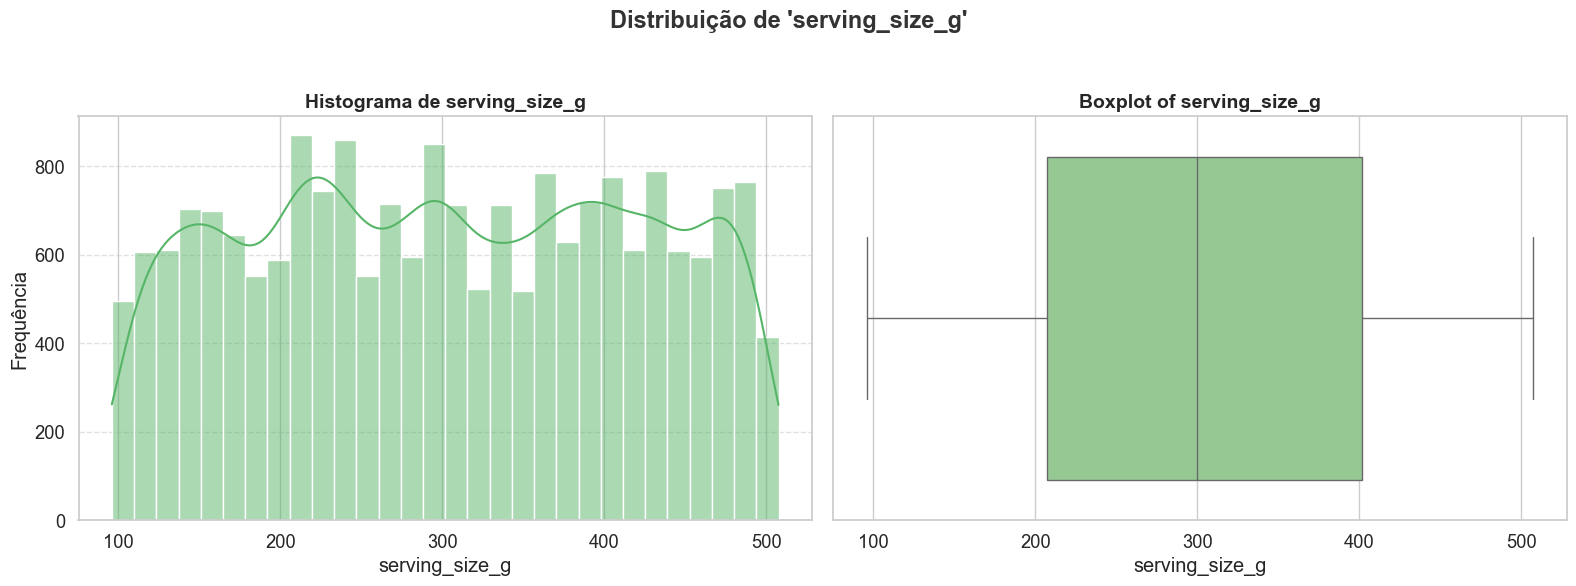

🔹 **serving_size_g**
- Count: 20000
- Mean: 302.72
- Median: 300.01
- Std Dev: 115.71
- Min: 95.95
- Max: 507.52
----------------------------------------------------------------------


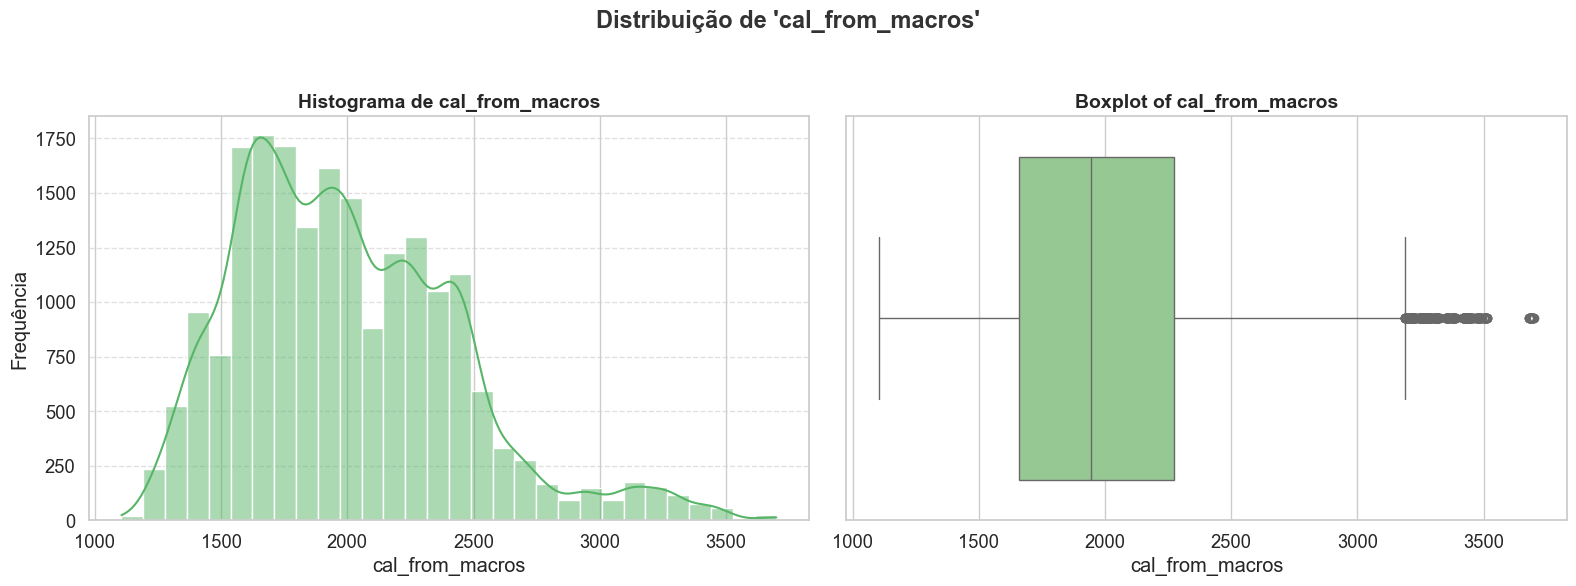

🔹 **cal_from_macros**
- Count: 20000
- Mean: 1998.30
- Median: 1943.13
- Std Dev: 440.85
- Min: 1105.57
- Max: 3699.54
----------------------------------------------------------------------


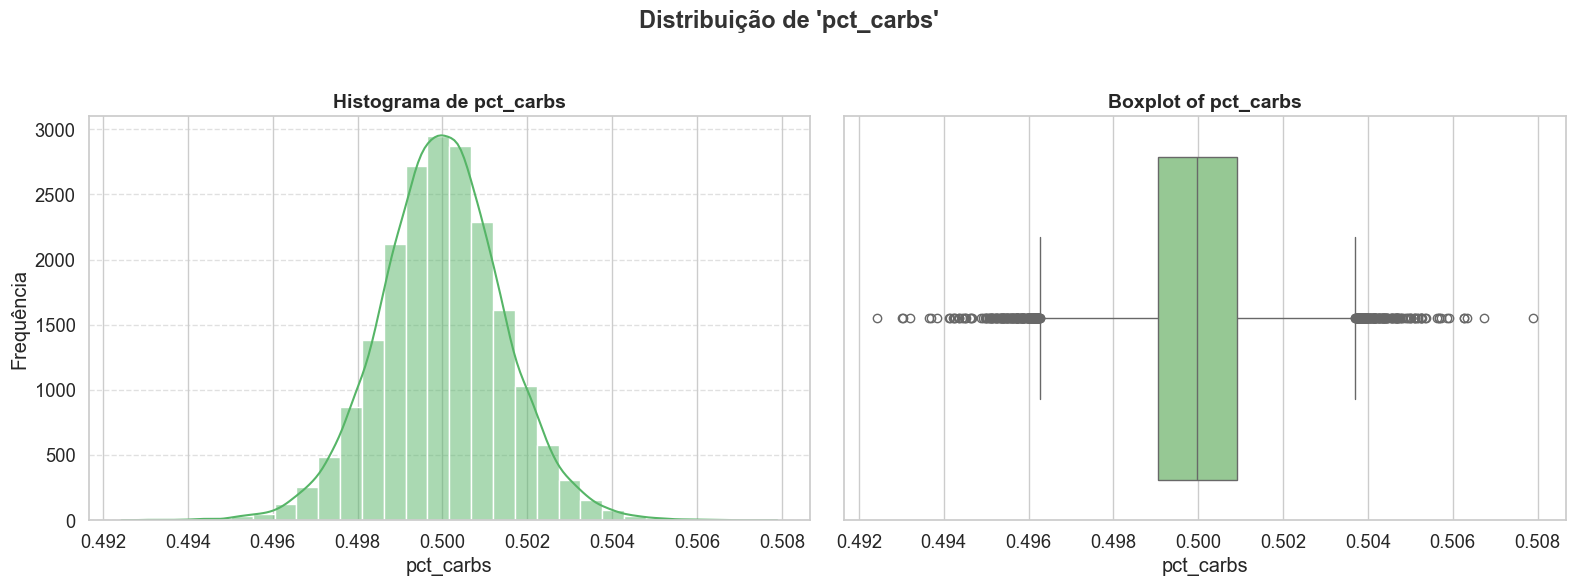

🔹 **pct_carbs**
- Count: 20000
- Mean: 0.50
- Median: 0.50
- Std Dev: 0.00
- Min: 0.49
- Max: 0.51
----------------------------------------------------------------------


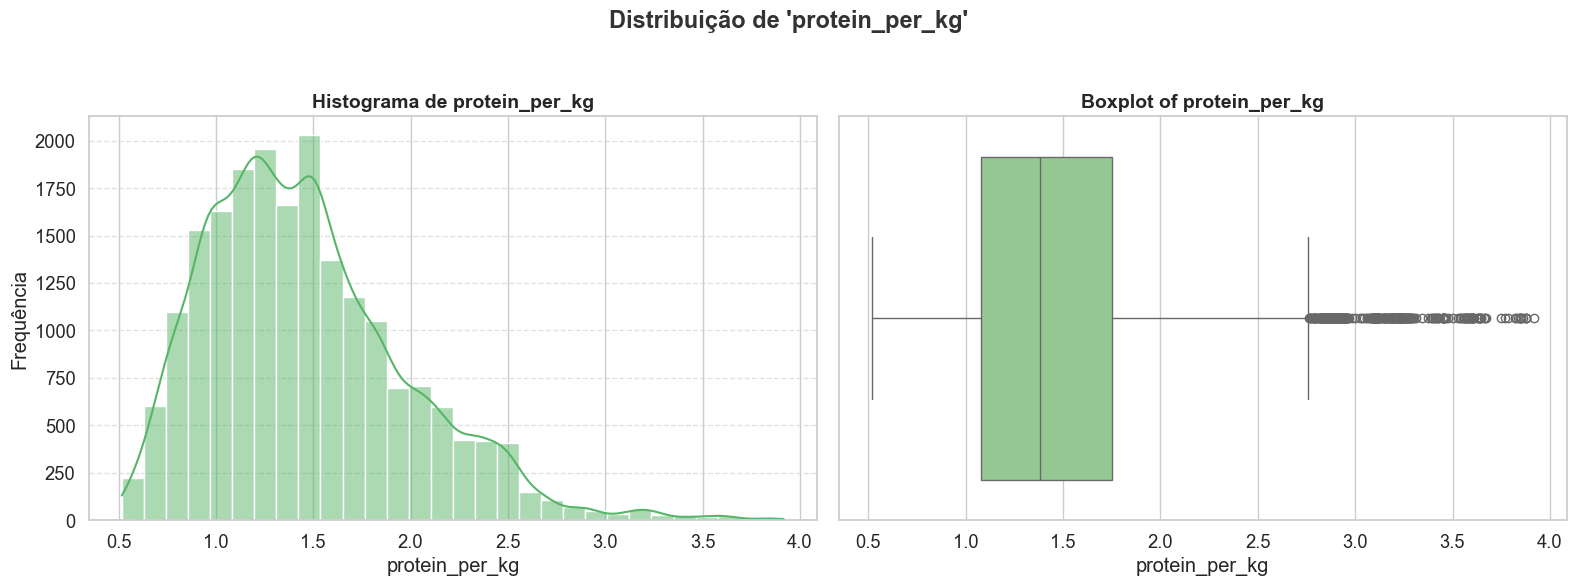

🔹 **protein_per_kg**
- Count: 20000
- Mean: 1.46
- Median: 1.38
- Std Dev: 0.52
- Min: 0.52
- Max: 3.92
----------------------------------------------------------------------


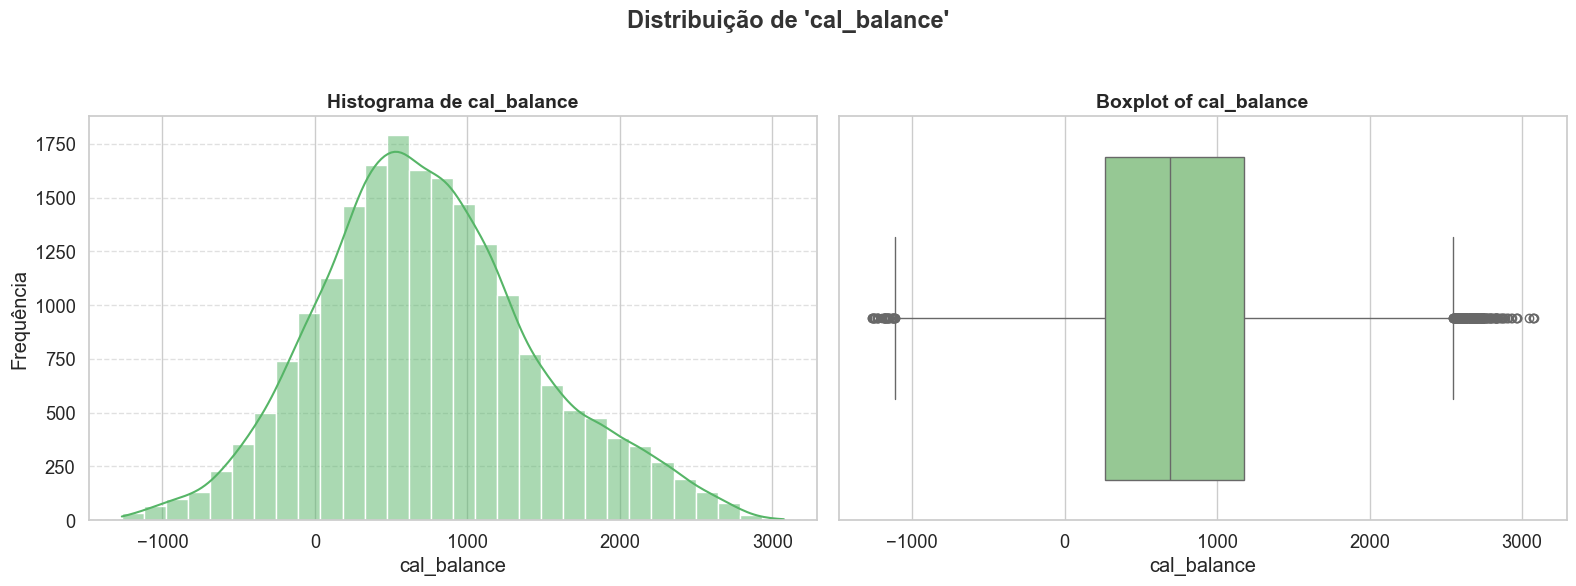

🔹 **cal_balance**
- Count: 20000
- Mean: 744.31
- Median: 691.19
- Std Dev: 720.95
- Min: -1266.22
- Max: 3075.58
----------------------------------------------------------------------

📊 ANÁLISE - GRUPO 4 — Estrutura do Treino & Avaliações



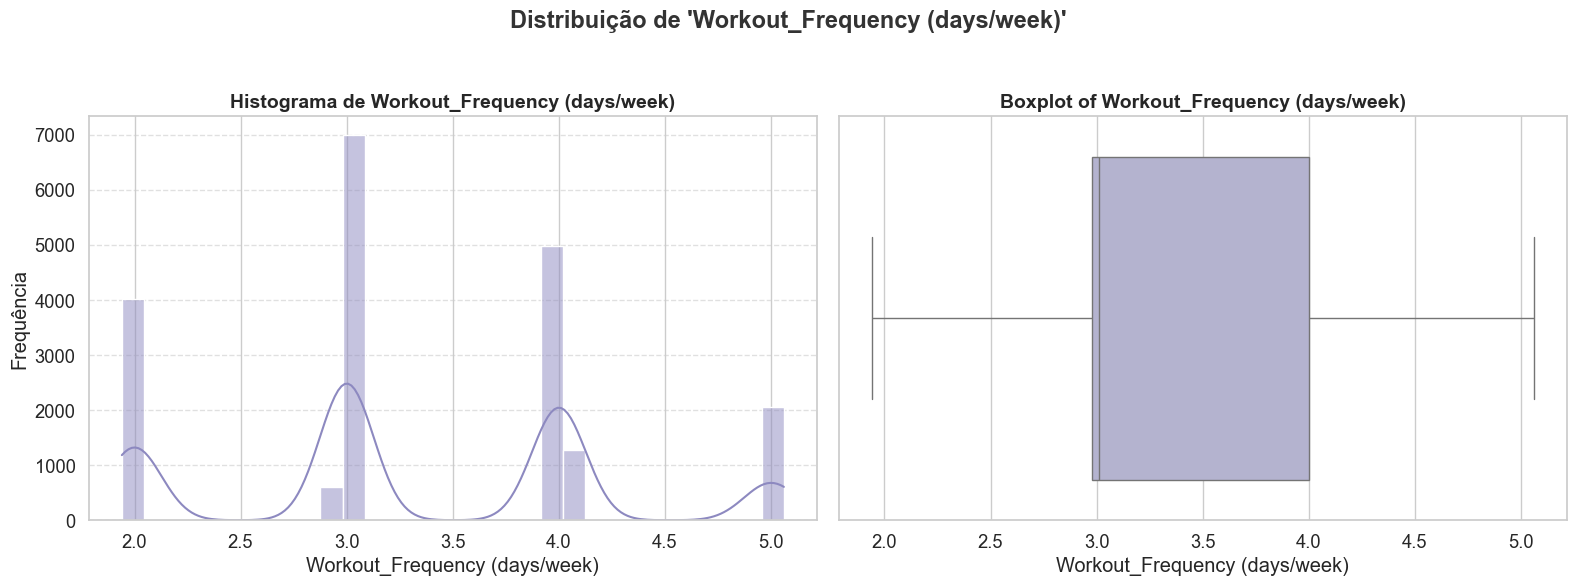

🔹 **Workout_Frequency (days/week)**
- Count: 20000
- Mean: 3.32
- Median: 3.01
- Std Dev: 0.91
- Min: 1.94
- Max: 5.06
----------------------------------------------------------------------


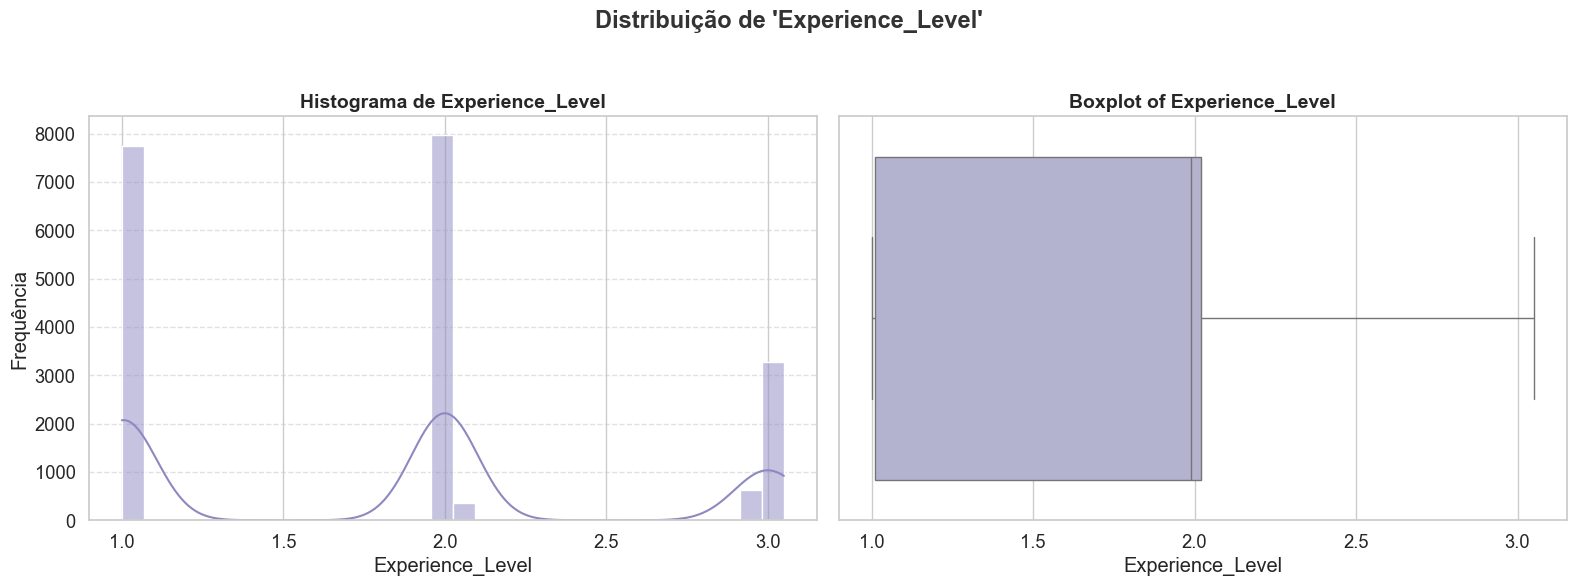

🔹 **Experience_Level**
- Count: 20000
- Mean: 1.81
- Median: 1.99
- Std Dev: 0.74
- Min: 1.00
- Max: 3.05
----------------------------------------------------------------------


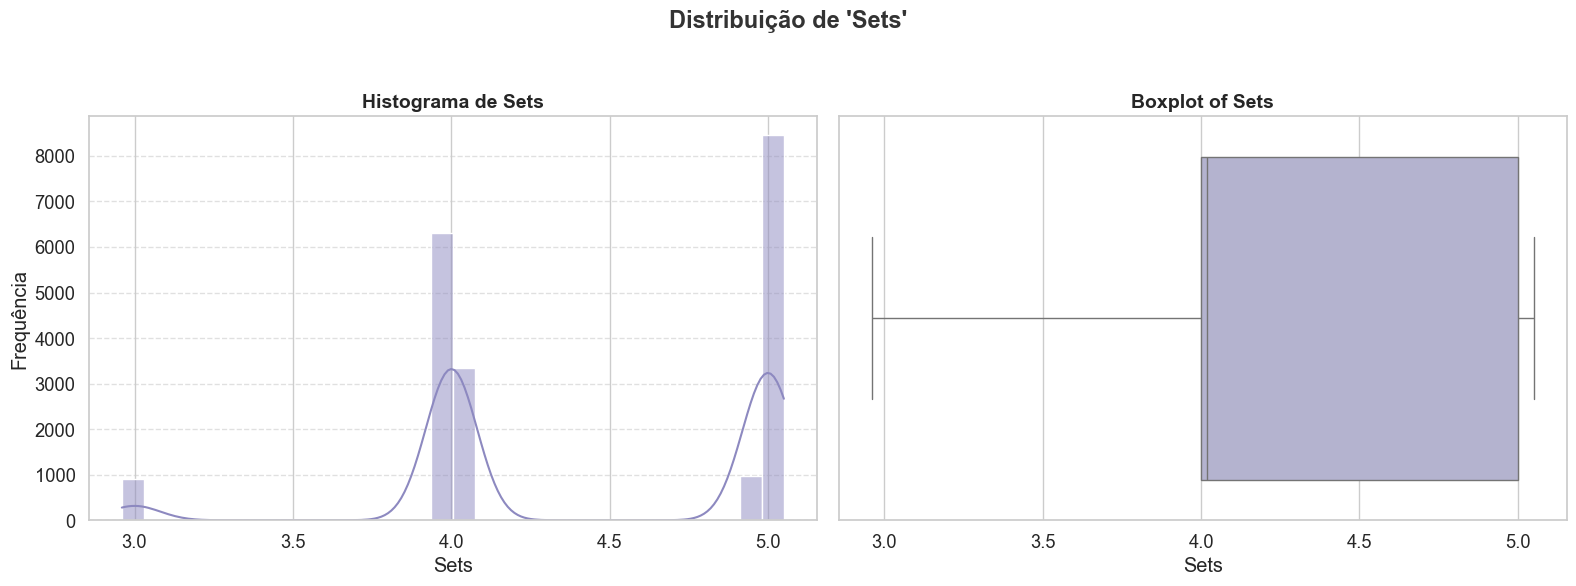

🔹 **Sets**
- Count: 20000
- Mean: 4.43
- Median: 4.02
- Std Dev: 0.58
- Min: 2.96
- Max: 5.05
----------------------------------------------------------------------


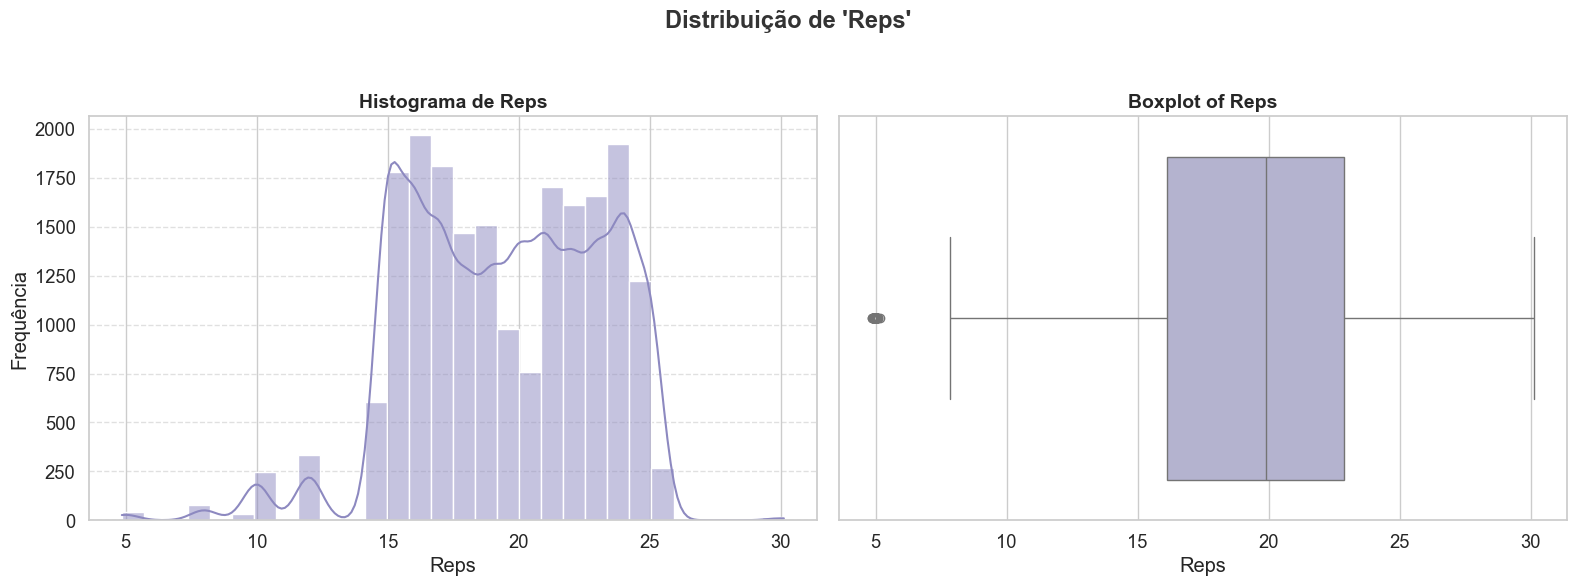

🔹 **Reps**
- Count: 20000
- Mean: 19.43
- Median: 19.90
- Std Dev: 3.68
- Min: 4.85
- Max: 30.12
----------------------------------------------------------------------


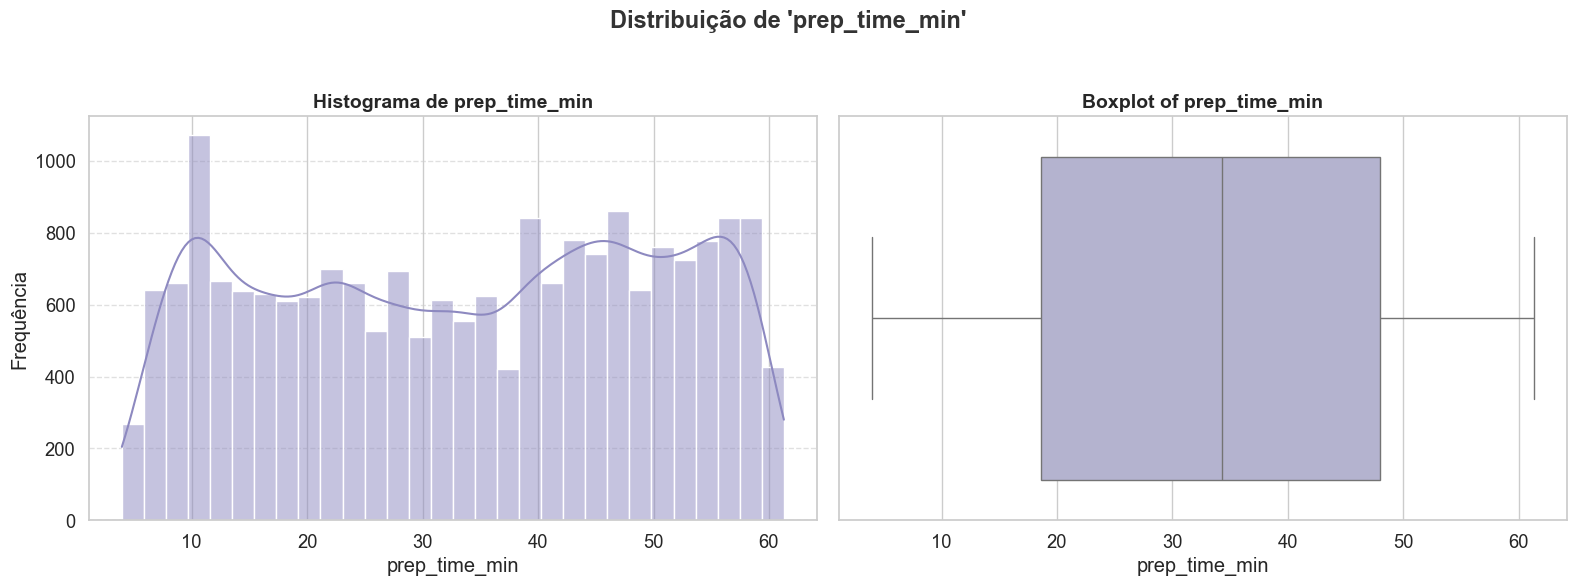

🔹 **prep_time_min**
- Count: 20000
- Mean: 33.52
- Median: 34.33
- Std Dev: 16.53
- Min: 3.95
- Max: 61.29
----------------------------------------------------------------------


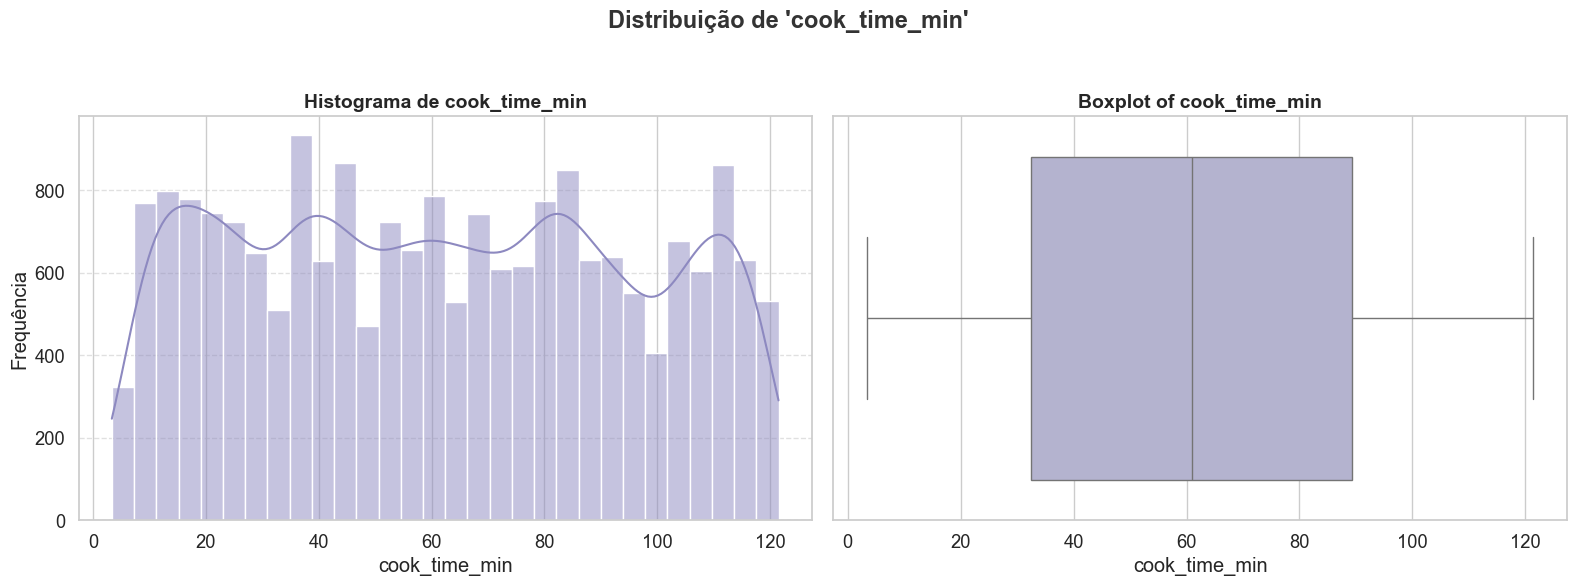

🔹 **cook_time_min**
- Count: 20000
- Mean: 61.50
- Median: 60.92
- Std Dev: 33.58
- Min: 3.35
- Max: 121.46
----------------------------------------------------------------------


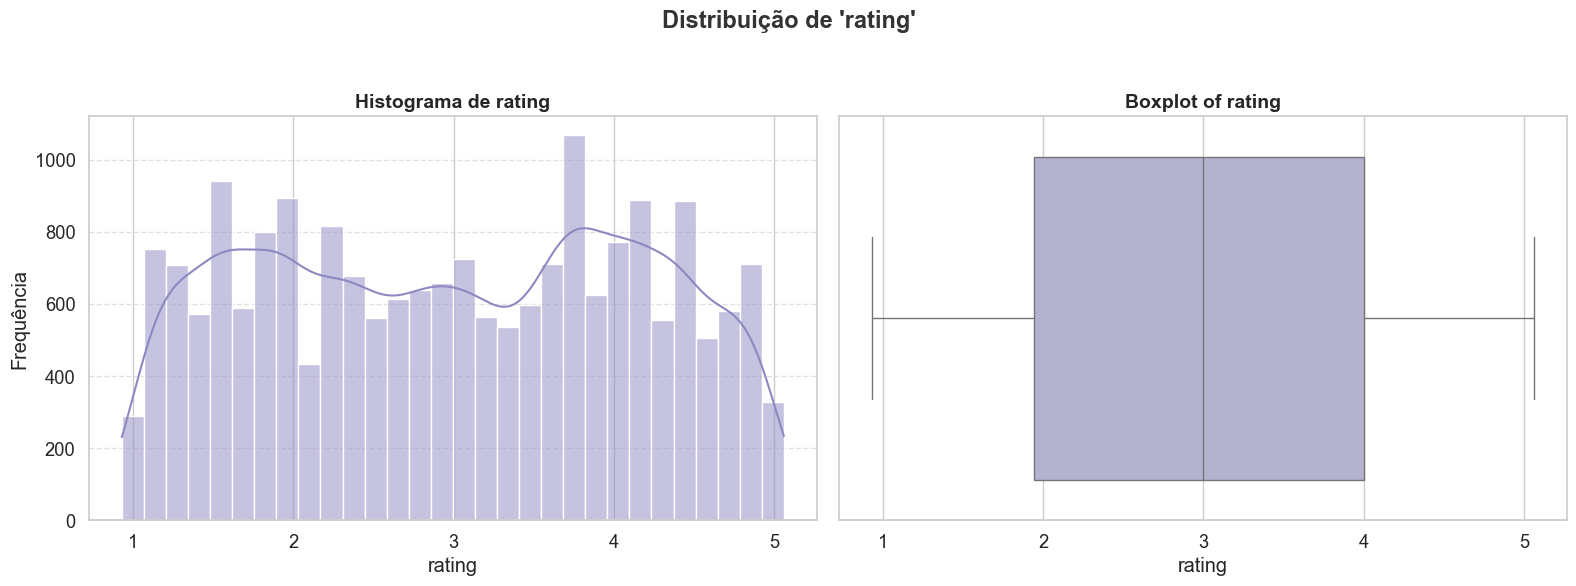

🔹 **rating**
- Count: 20000
- Mean: 2.99
- Median: 3.00
- Std Dev: 1.16
- Min: 0.93
- Max: 5.06
----------------------------------------------------------------------


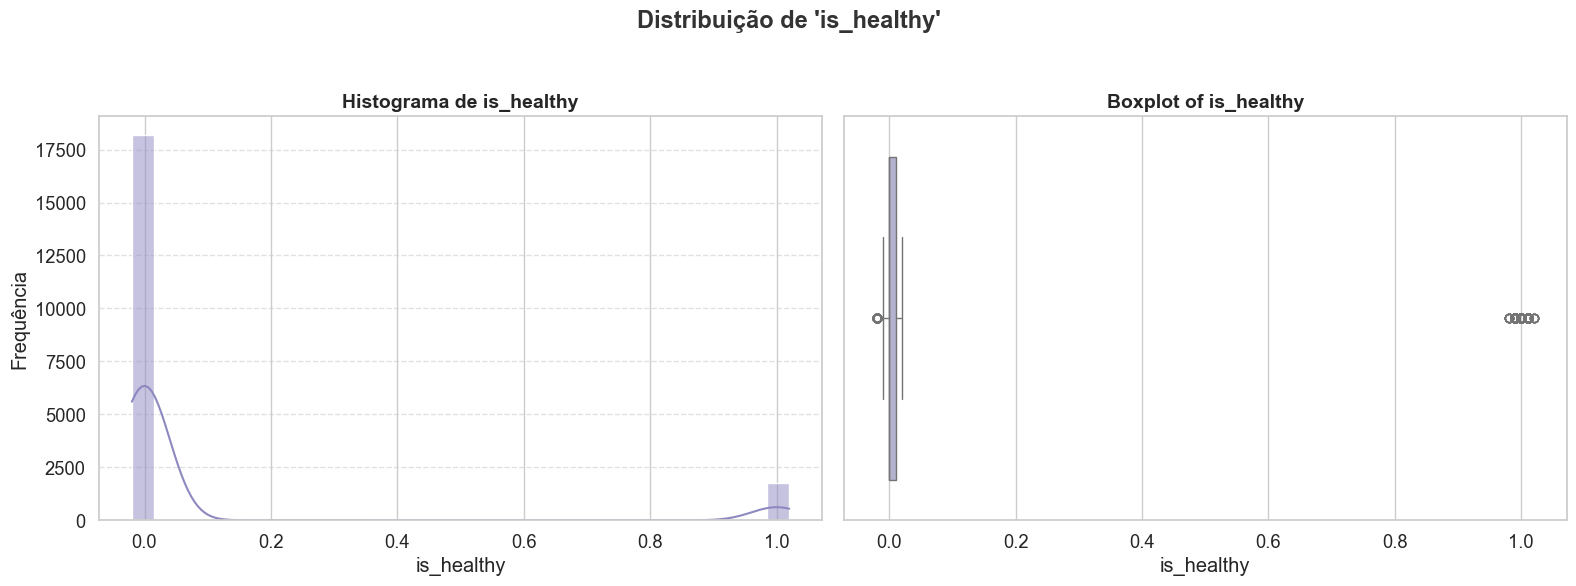

🔹 **is_healthy**
- Count: 20000
- Mean: 0.09
- Median: 0.00
- Std Dev: 0.28
- Min: -0.02
- Max: 1.02
----------------------------------------------------------------------


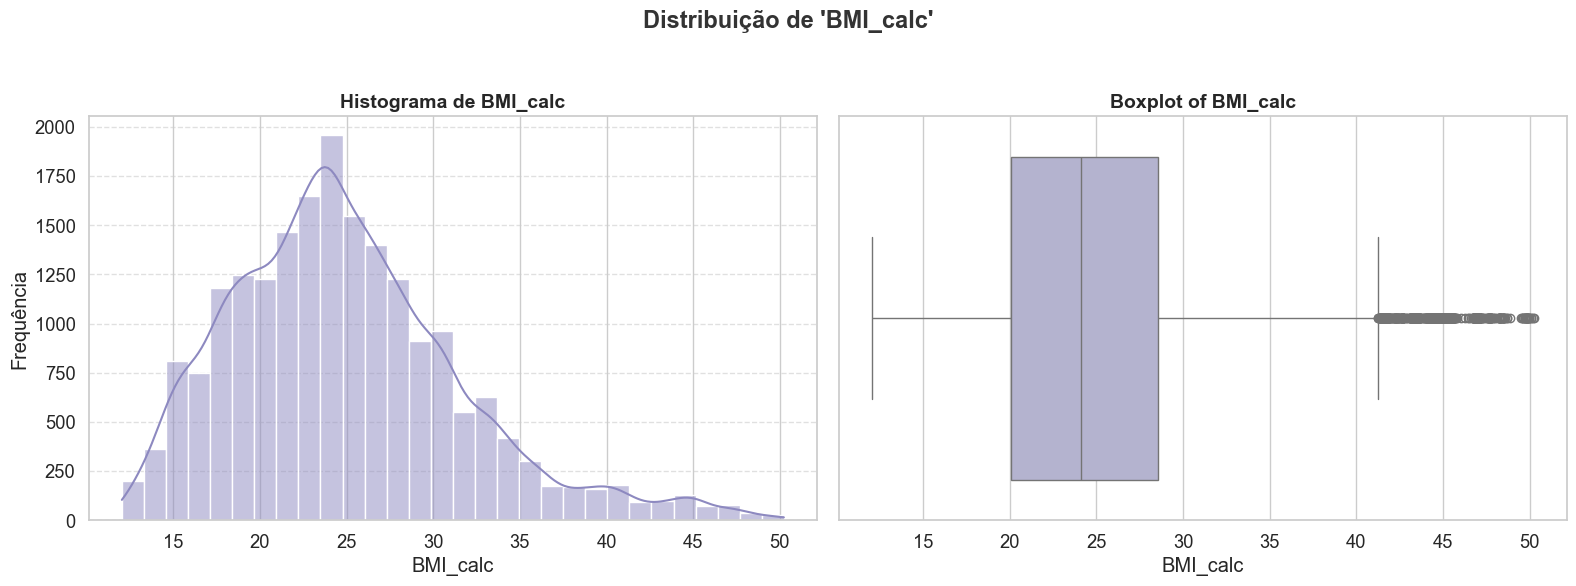

🔹 **BMI_calc**
- Count: 20000
- Mean: 24.92
- Median: 24.12
- Std Dev: 6.70
- Min: 12.04
- Max: 50.23
----------------------------------------------------------------------


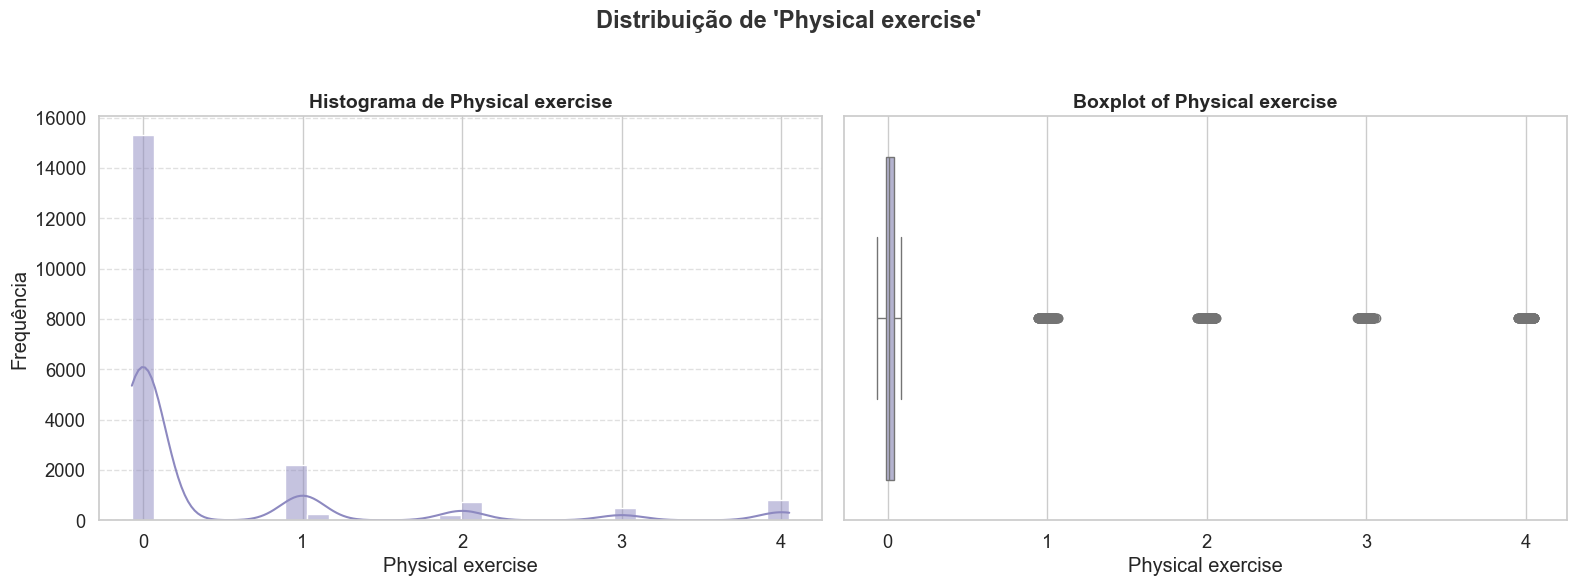

🔹 **Physical exercise**
- Count: 20000
- Mean: 0.45
- Median: 0.01
- Std Dev: 0.99
- Min: -0.07
- Max: 4.05
----------------------------------------------------------------------


In [107]:
def analyze_numerical_group(df, cols, group_name, palette):
    # ---- Visualização & resumo estatístico de features numéricas ----
    print(f'\n{'='*90}')
    print(f'📊 ANÁLISE - {group_name}')
    print(f"{'='*90}\n")

    sns.set(style='whitegrid', font_scale=1.2)

    for col in cols:
        if col not in df.columns:
            print(f"⚠️ Pulando '{col}' (não está no DataFrame)")
            continue

        data = df[col].dropna()
        if data.empty:
            print(f"⚠️ Pulando '{col}' (não está no DataFrame)")
            continue

        # --- Criando figura ----
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        fig.suptitle(f"Distribuição de '{col}'", fontsize=17, fontweight='bold', color='#333333')

        # --- Histograma ----
        sns.histplot(data, kde=True, bins=30, color=sns.color_palette(palette,6)[3], ax=axes[0])
        axes[0].set_title(f"Histograma de {col}", fontsize=14, fontweight='semibold')
        axes[0].set_xlabel(col)
        axes[0].set_ylabel("Frequência")
        axes[0].grid(axis='y', linestyle='--', alpha=0.6)

        # --- Boxplot ---
        sns.boxplot(x=data, color=sns.color_palette(palette, 6)[2], ax=axes[1])
        axes[1].set_title(f"Boxplot of {col}", fontsize=14, fontweight='semibold')
        axes[1].set_xlabel(col)

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()
        # --- Estatísticas resumidas ---
        print(f"🔹 **{col}**")
        print(f"- Count: {len(data)}")
        print(f"- Mean: {data.mean():.2f}")
        print(f"- Median: {data.median():.2f}")
        print(f"- Std Dev: {data.std():.2f}")
        print(f"- Min: {data.min():.2f}")
        print(f"- Max: {data.max():.2f}")
        print("-" * 70)

#GRUPO 1 - Composição Corporal e Sinais Vitais
group1 = ['Age', 'Weight (kg)', 'Height (m)', 'BMI', 'Fat_Percentage', 'lean_mass_kg'] 
analyze_numerical_group(df, group1, "GRUPO 1 - Composição Corporal e Sinais Vitais", palette='Blues')

# GRUPO 2 — Frequência Cardíaca & Desempenho no Treino
group2 = ['Max_BPM', 'Avg_BPM', 'Resting_BPM', 'pct_HRR', 'pct_maxHR',
          'Session_Duration (hours)', 'Calories_Burned', 'expected_burn', 'Burns Calories (per 30 min)']
analyze_numerical_group(df, group2, "GRUPO 2 — Frequência Cardíaca & Desempenho no Treino", palette='Reds')

# GRUPO 3 — Nutrição & Consumo
group3 = ['Water_Intake (liters)', 'Daily meals frequency', 'Carbs', 'Proteins', 'Fats', 
          'Calories', 'sugar_g', 'sodium_mg', 'cholesterol_mg', 'serving_size_g', 
          'cal_from_macros', 'pct_carbs', 'protein_per_kg', 'cal_balance']
analyze_numerical_group(df, group3, "GRUPO 3 — Nutrição & Consumo", palette='Greens')

# GRUPO 4 — Estrutura do Treino & Avaliações
group4 = ['Workout_Frequency (days/week)', 'Experience_Level', 'Sets', 'Reps', 
          'prep_time_min', 'cook_time_min', 'rating', 'is_healthy', 
          'BMI_calc', 'Physical exercise']
analyze_numerical_group(df, group4, "GRUPO 4 — Estrutura do Treino & Avaliações", palette='Purples')

# Uma abordagem alternativa de análise

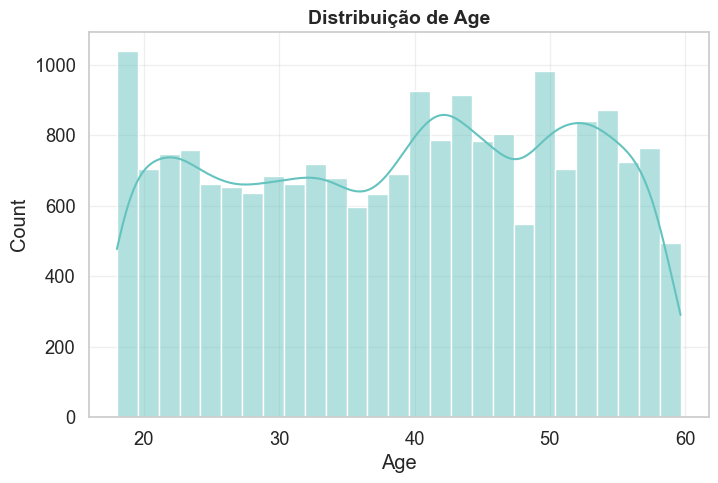

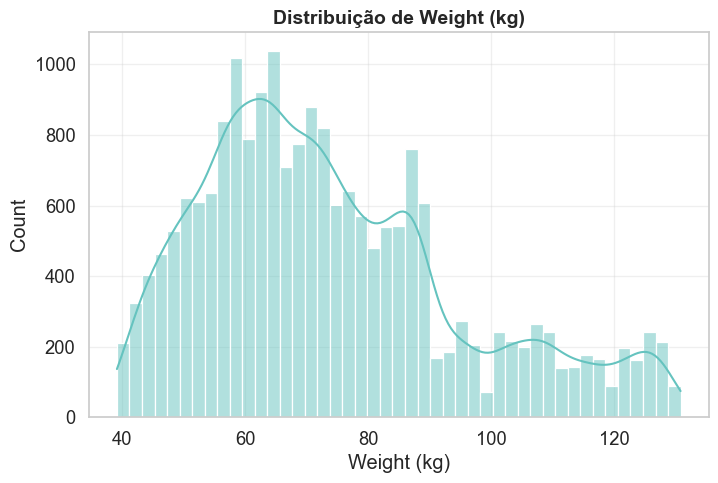

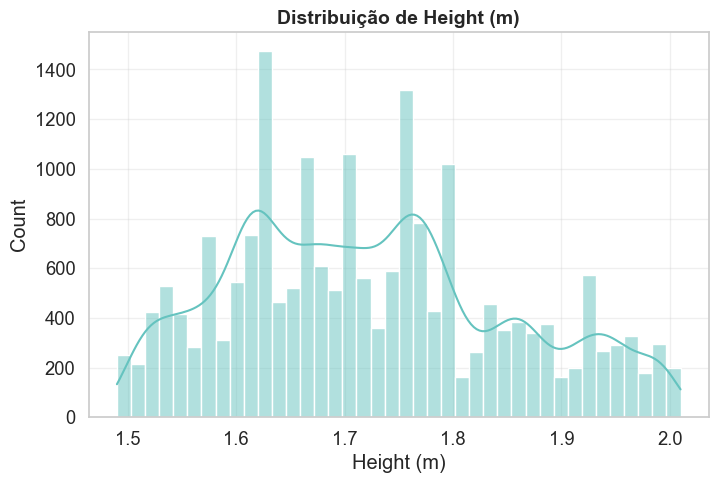

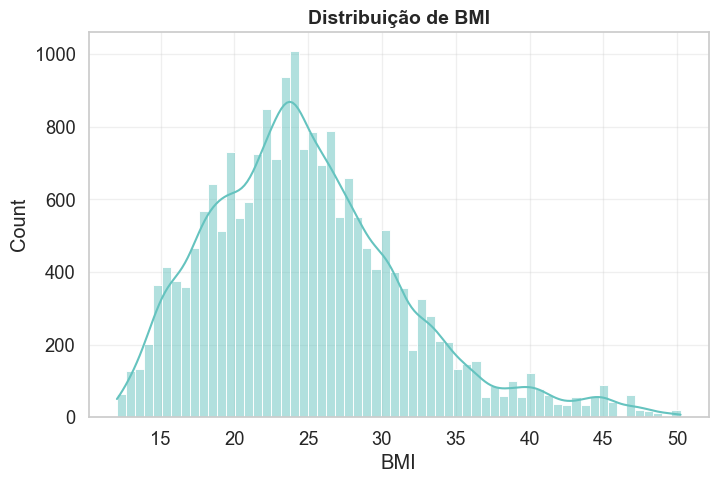

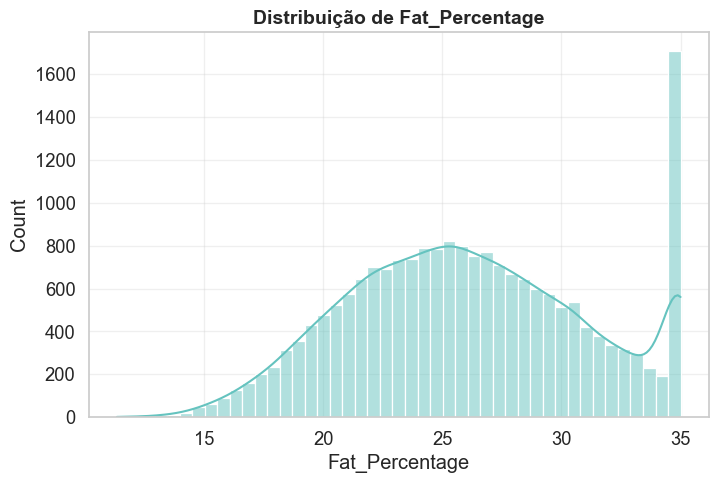

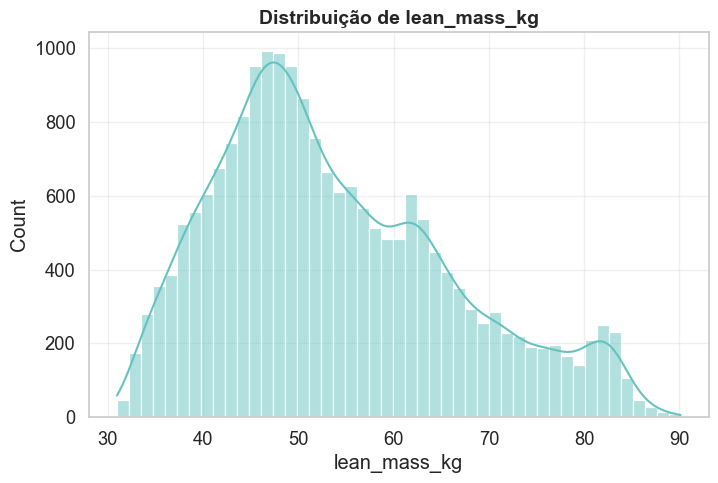

In [108]:
phys_cols = ['Age', 'Weight (kg)', 'Height (m)', 'BMI', 'Fat_Percentage', 'lean_mass_kg']
for col in phys_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, color=sns.color_palette("YlGnBu", 6)[2])
    plt.title(f"Distribuição de {col}", fontsize=14, fontweight="bold")
    plt.grid(alpha=0.3)
    plt.show()

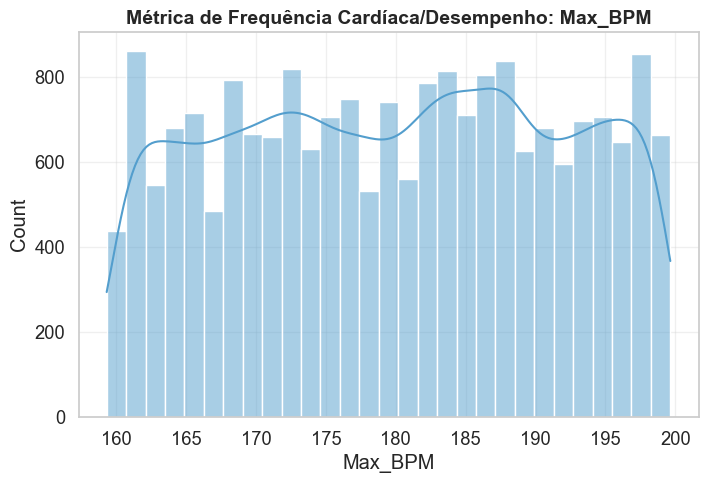

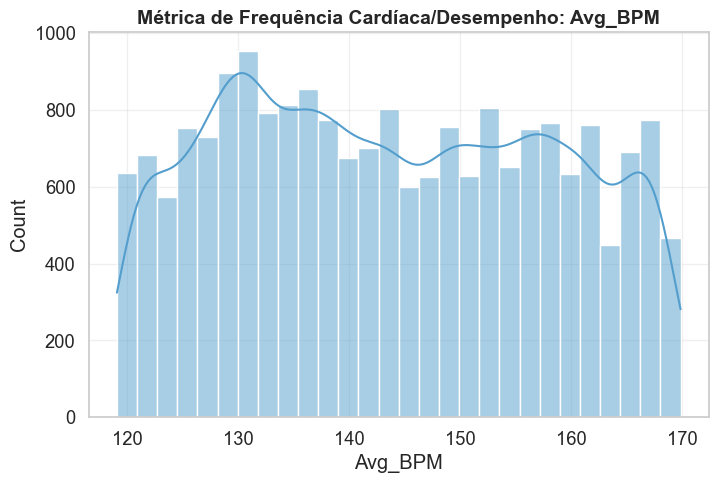

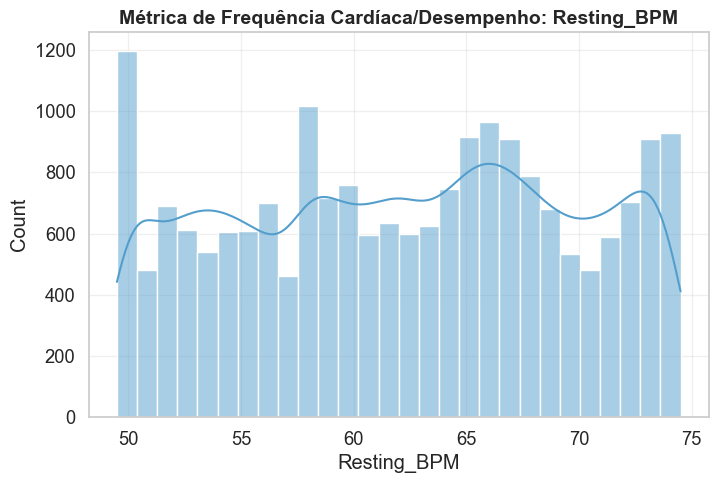

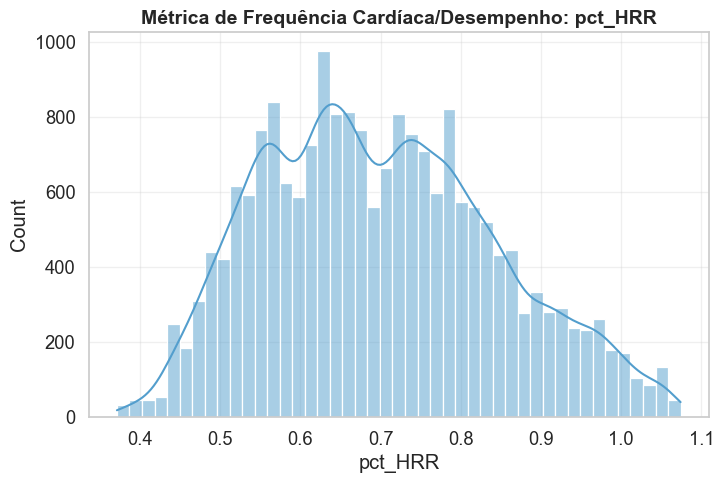

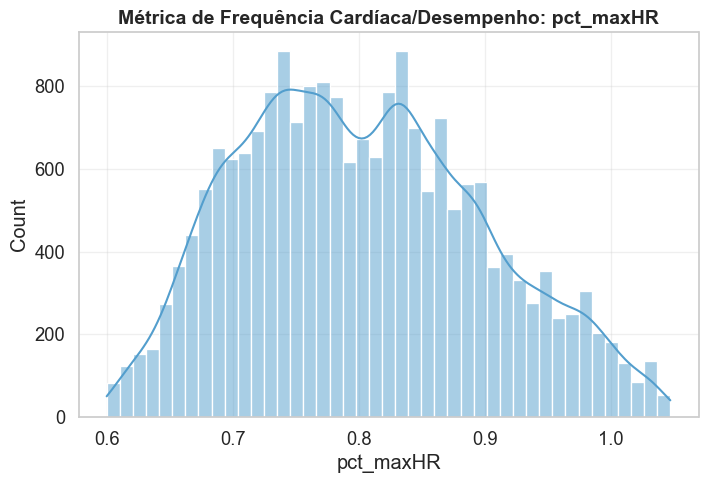

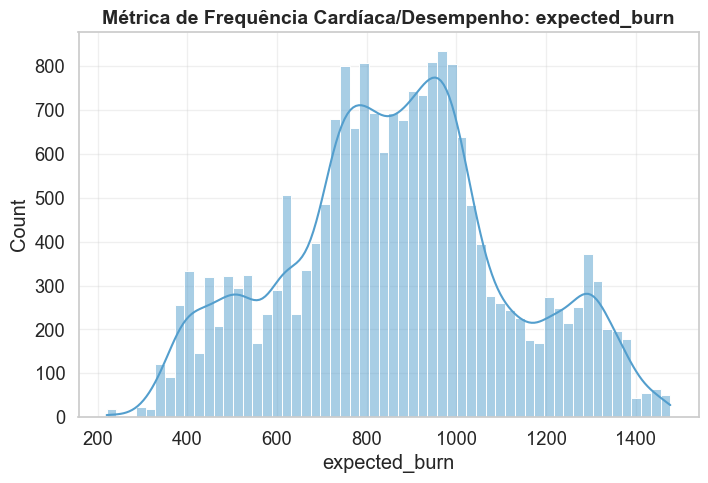

In [109]:
heart_cols = ['Max_BPM', 'Avg_BPM', 'Resting_BPM', 'pct_HRR', 'pct_maxHR', 'expected_burn']
for col in heart_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, color=sns.color_palette("Blues", 6)[3])
    plt.title(f"Métrica de Frequência Cardíaca/Desempenho: {col}", fontsize=14, fontweight='bold')
    plt.grid(alpha=0.3)
    plt.show()

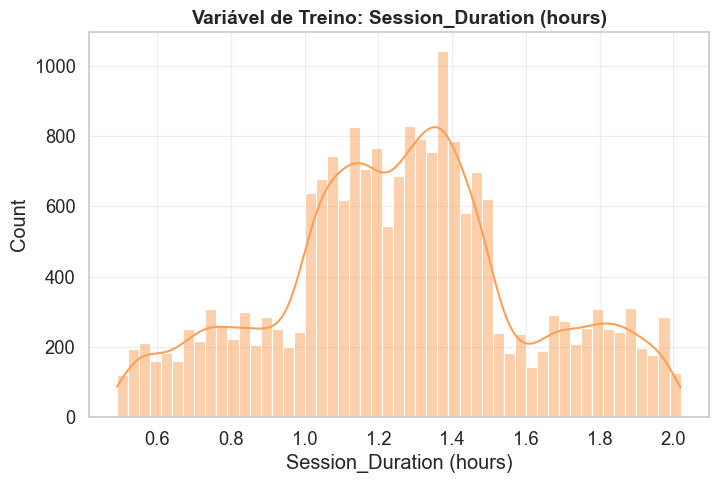

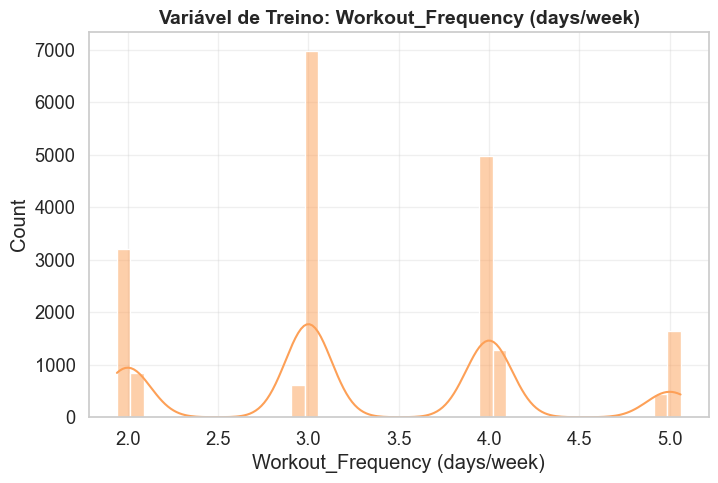

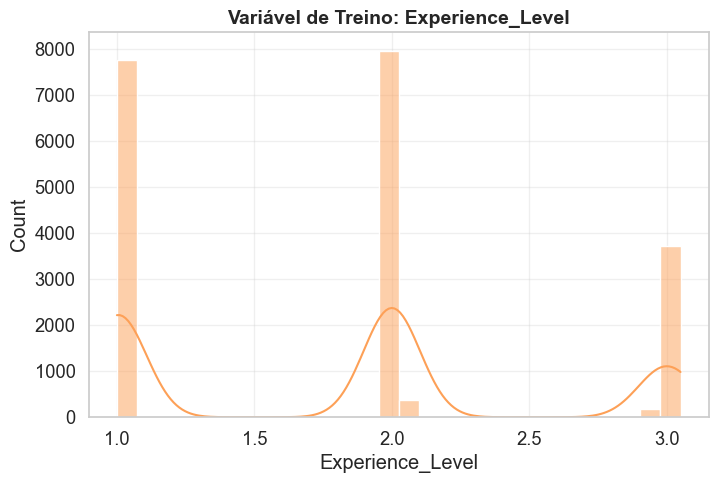

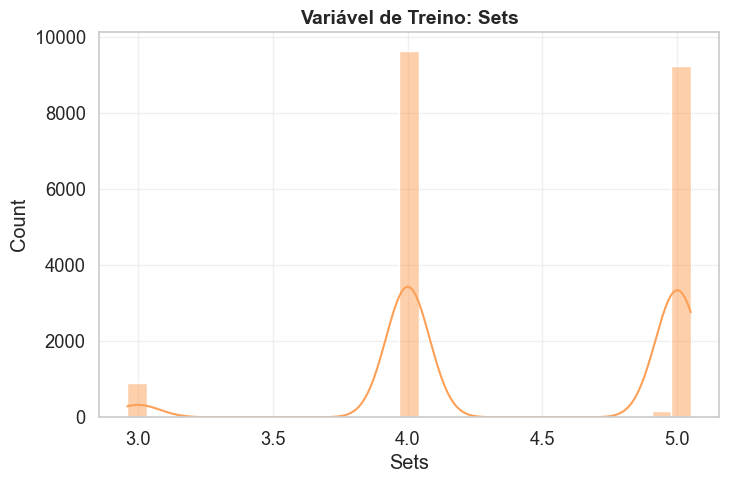

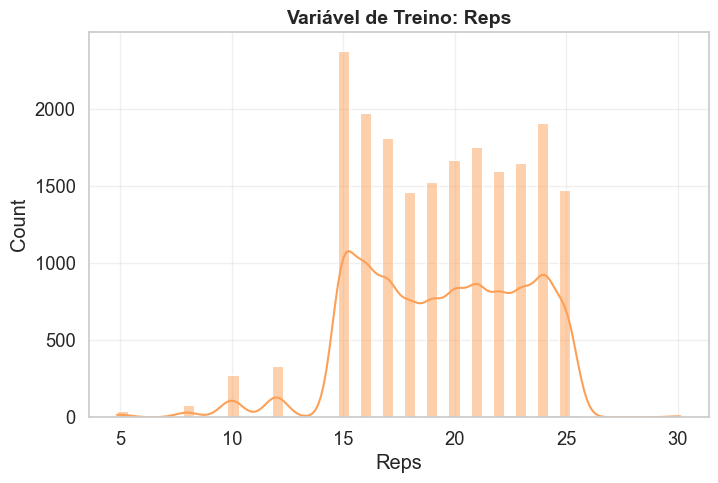

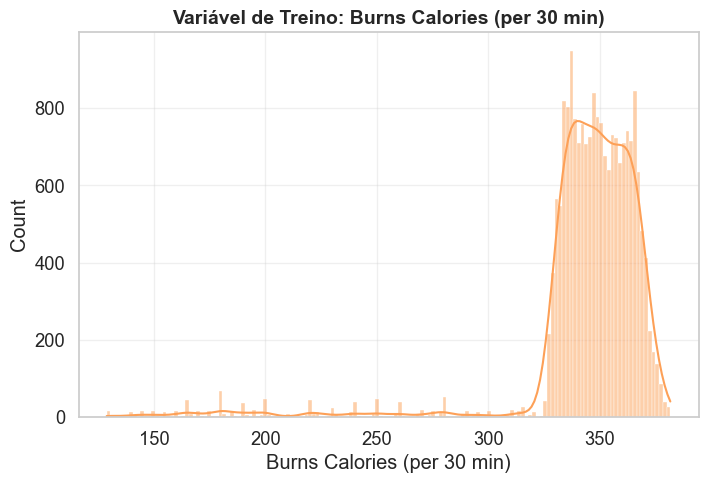

In [110]:
workout_cols = ['Session_Duration (hours)', 'Workout_Frequency (days/week)', 
                'Experience_Level', 'Sets', 'Reps', 'Burns Calories (per 30 min)']
for col in workout_cols:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], kde=True, color=sns.color_palette("Oranges", 6)[2])
    plt.title(f"Variável de Treino: {col}", fontsize=14, fontweight='bold')
    plt.grid(alpha=0.3)
    plt.show()

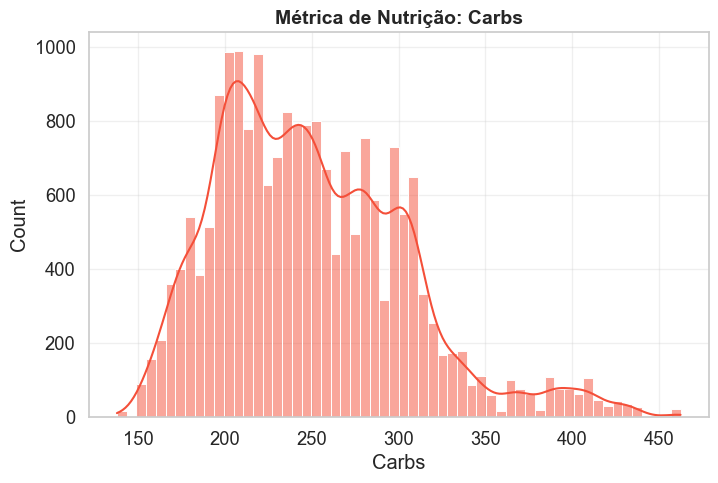

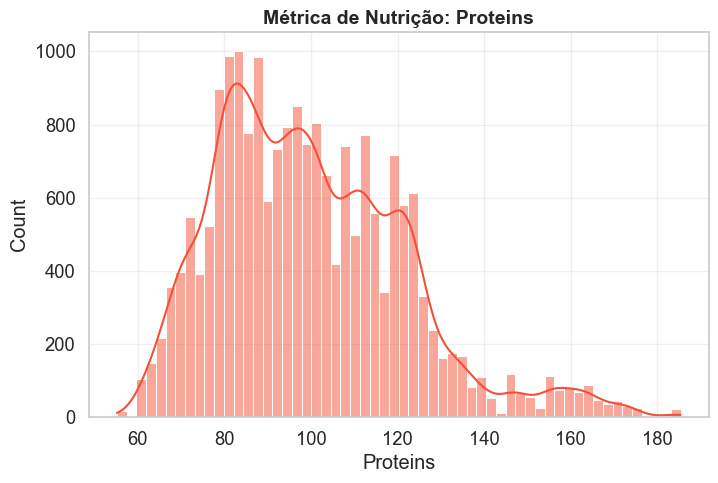

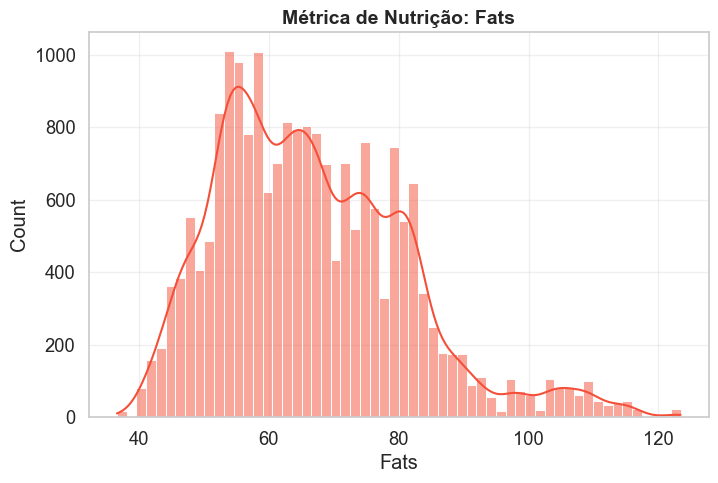

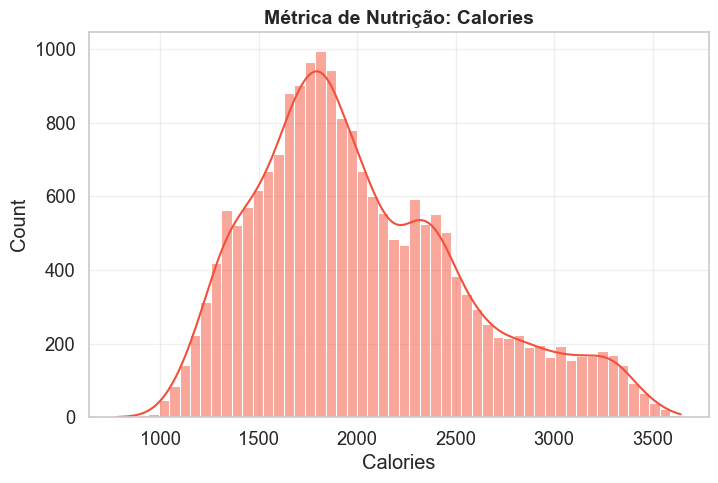

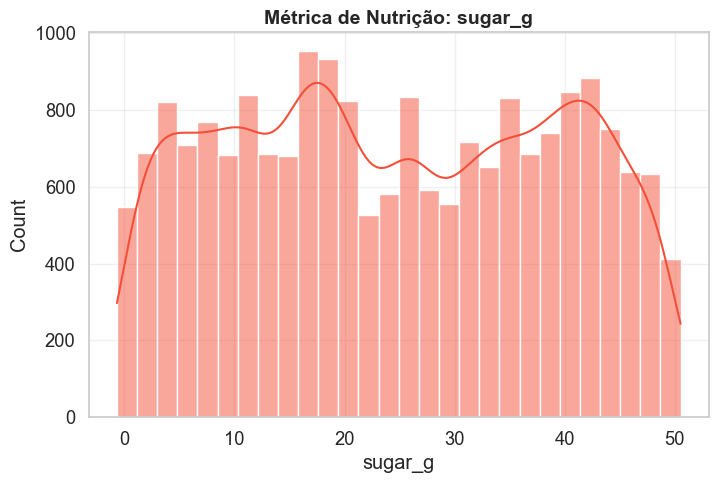

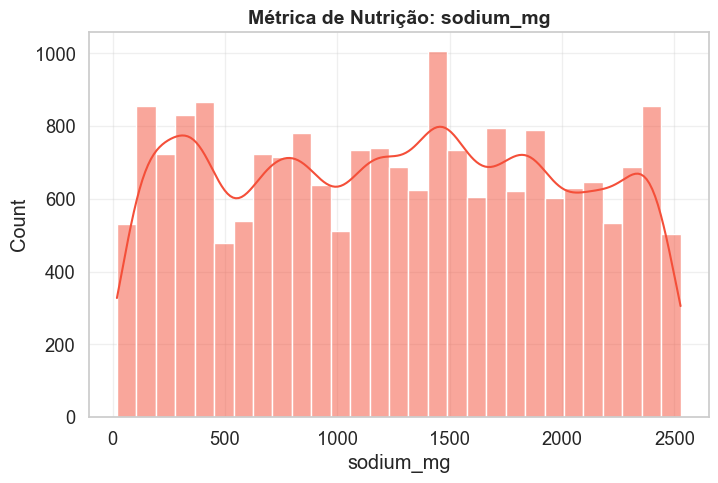

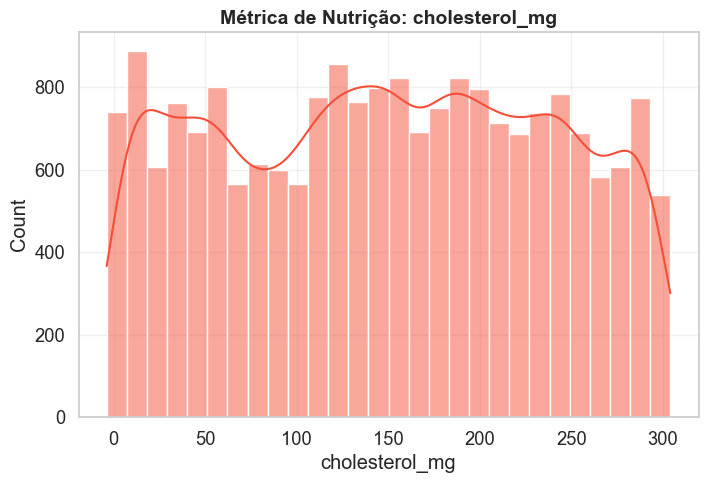

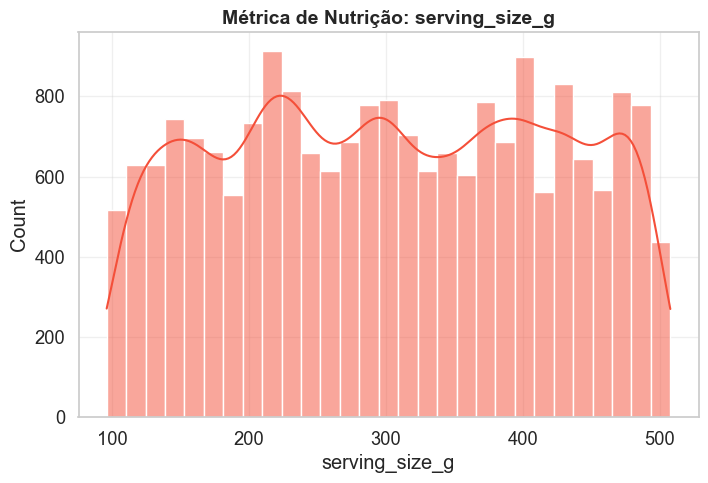

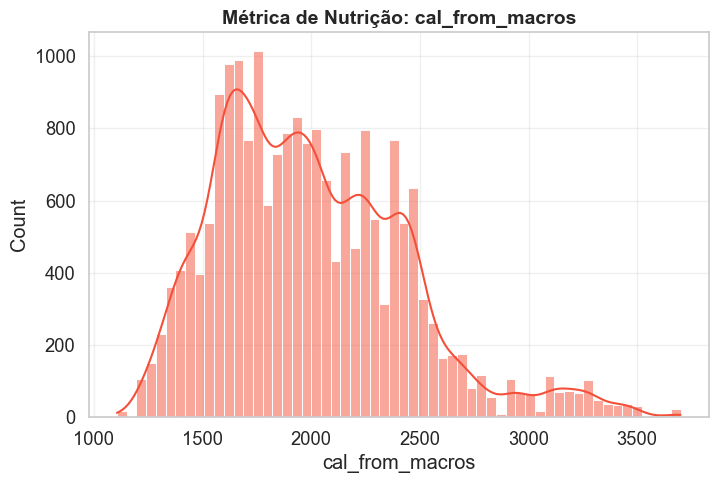

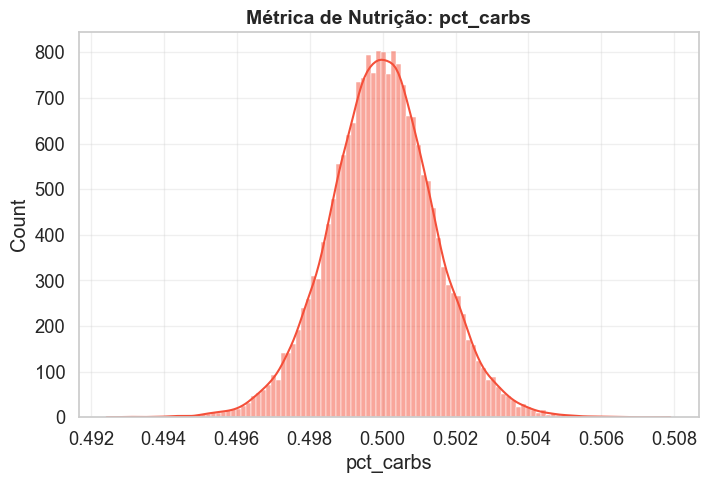

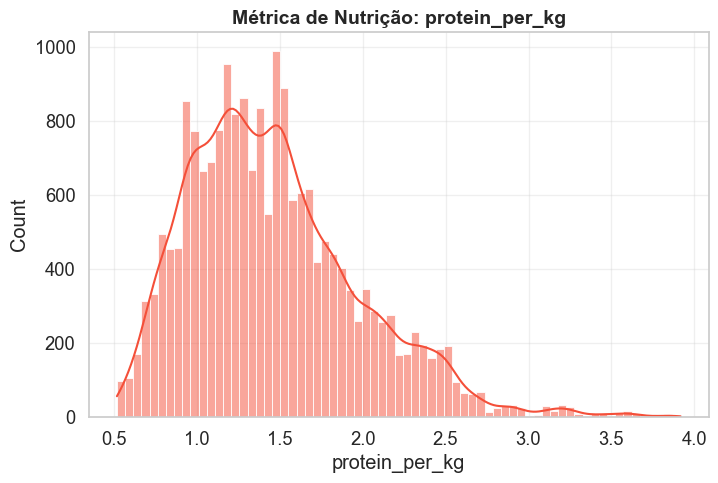

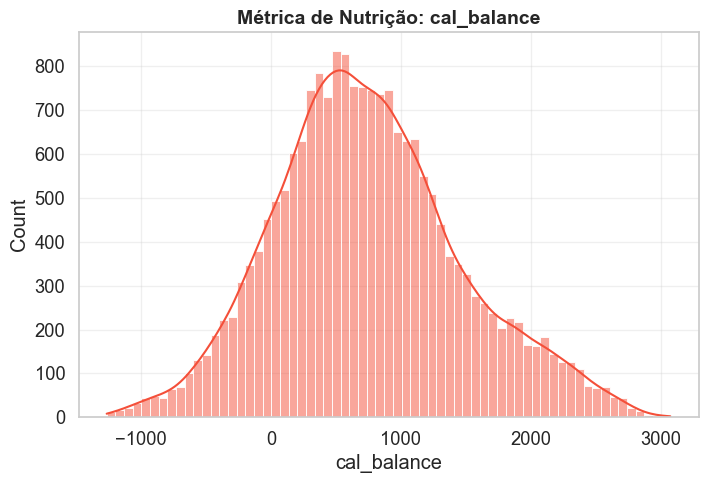

In [111]:
nutrition_cols = ['Carbs', 'Proteins', 'Fats', 'Calories', 'sugar_g', 'sodium_mg',
                  'cholesterol_mg', 'serving_size_g', 'cal_from_macros', 'pct_carbs',
                  'protein_per_kg', 'cal_balance']
for col in nutrition_cols:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], kde=True, color=sns.color_palette("Reds", 6)[3])
    plt.title(f"Métrica de Nutrição: {col}", fontsize=14, fontweight='bold')
    plt.grid(alpha=0.3)
    plt.show()

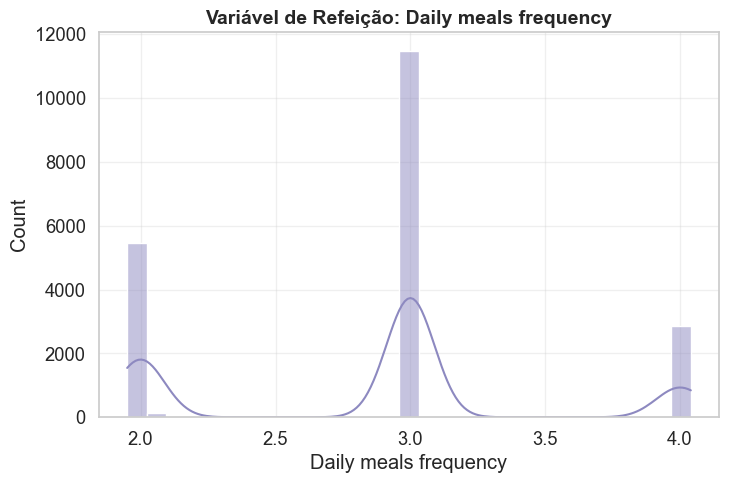

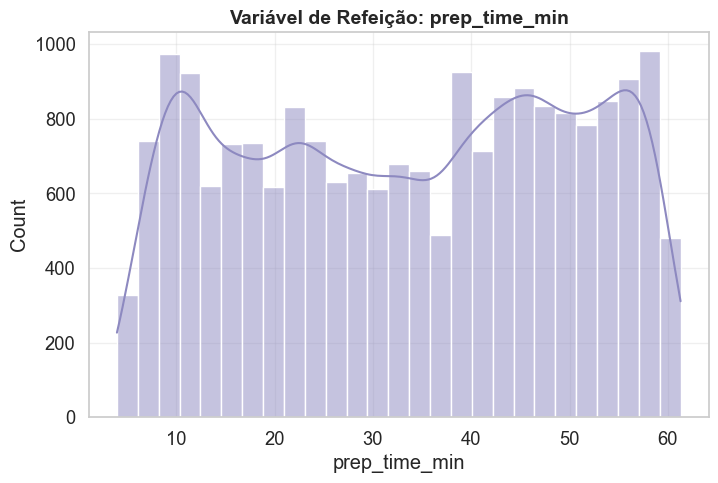

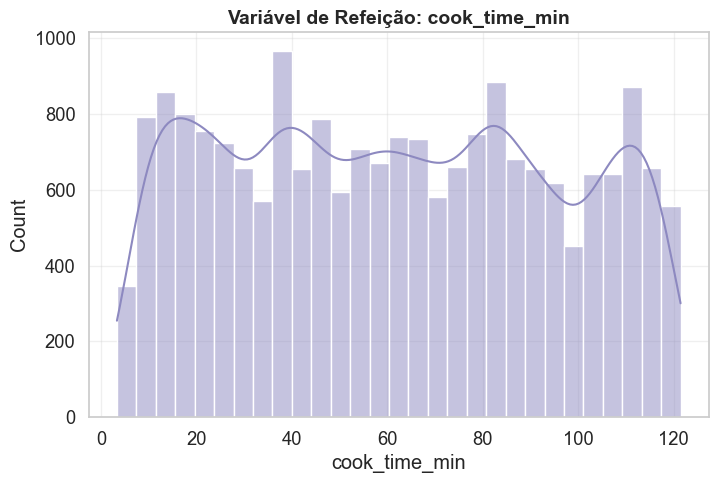

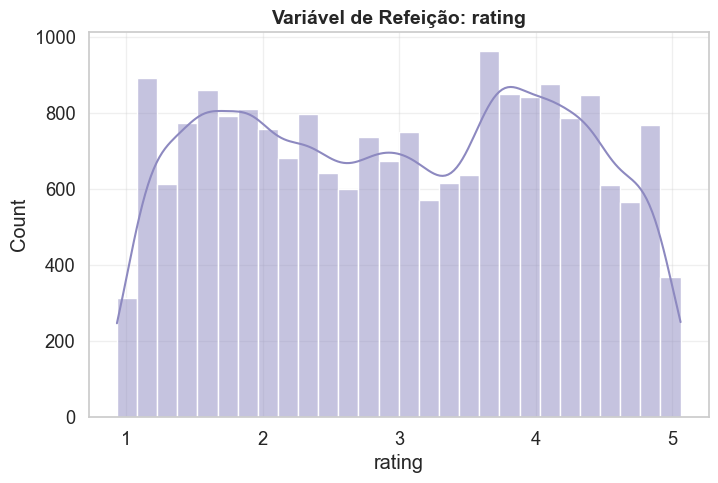

In [112]:
meal_cols = ['Daily meals frequency', 'prep_time_min', 'cook_time_min', 'rating']
for col in meal_cols:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], kde=True, color=sns.color_palette("Purples", 6)[3])
    plt.title(f"Variável de Refeição: {col}", fontsize=14, fontweight='bold')
    plt.grid(alpha=0.3)
    plt.show()

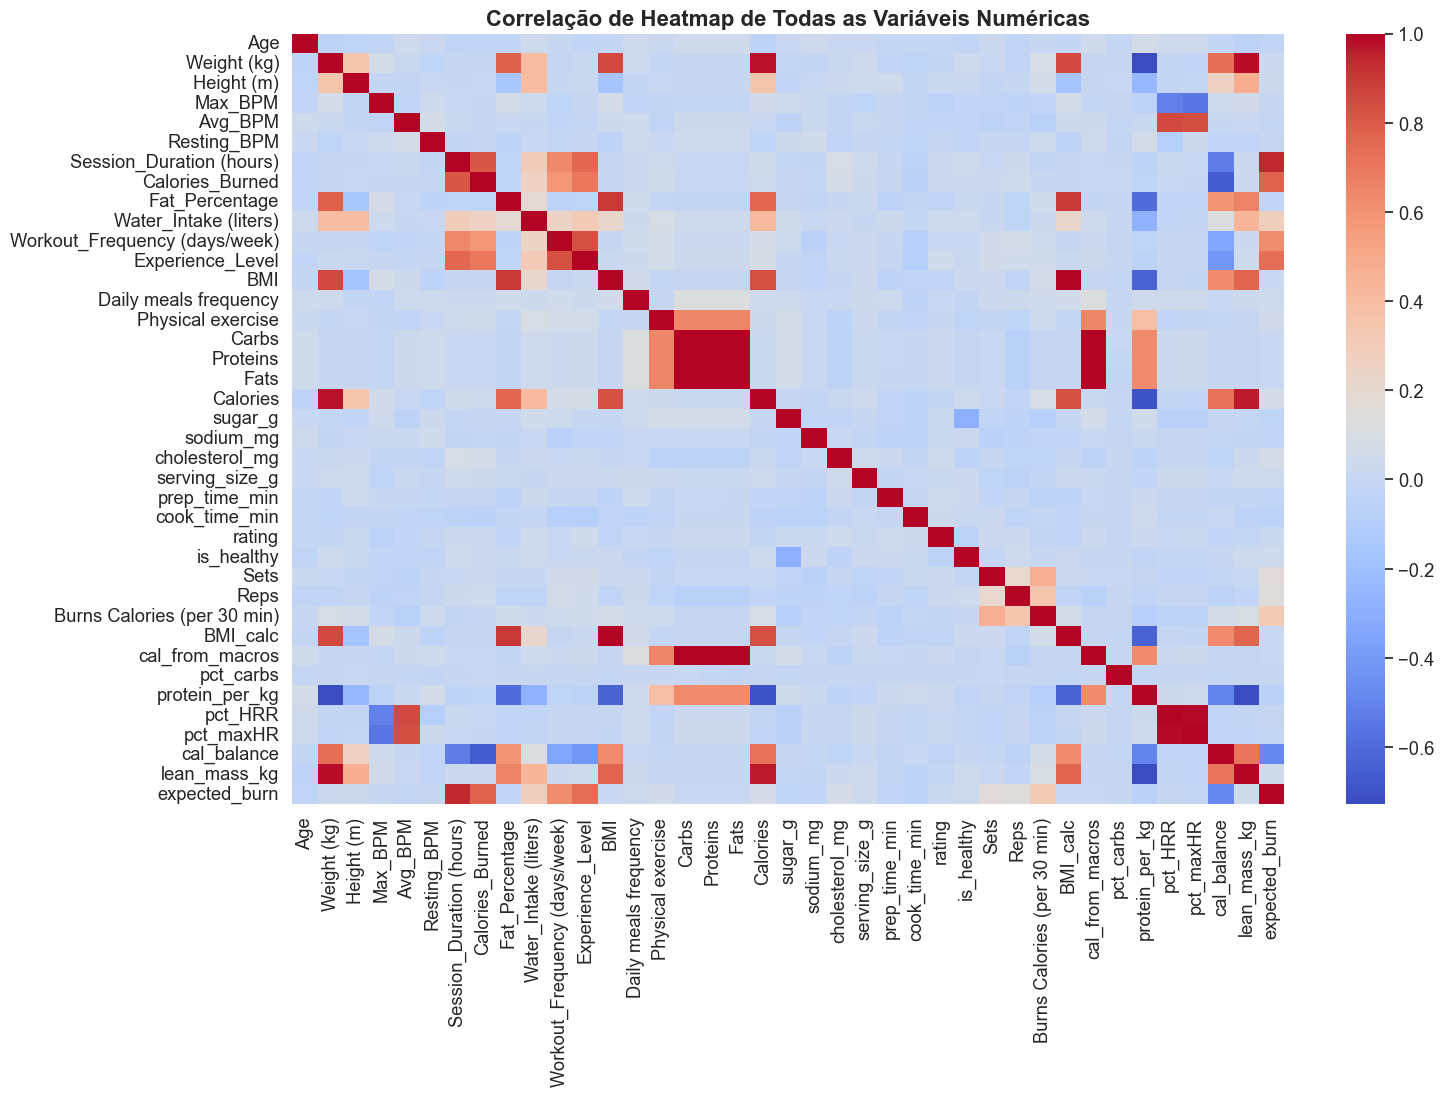

In [113]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Correlação de Heatmap de Todas as Variáveis Numéricas", fontsize=16, fontweight='bold')
plt.show()

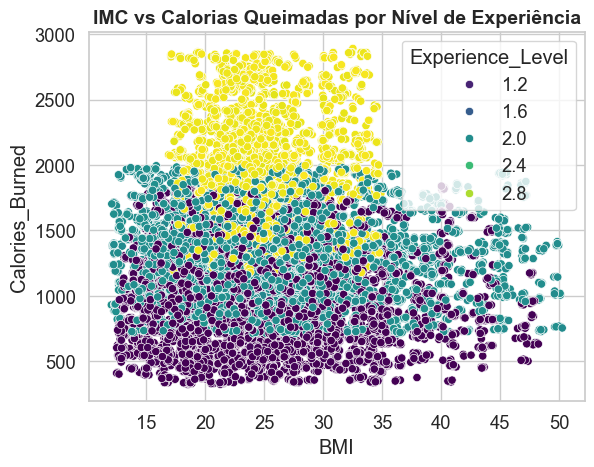

In [114]:
sns.scatterplot(data=df, x='BMI', y='Calories_Burned', hue='Experience_Level', palette='viridis')
plt.title('IMC vs Calorias Queimadas por Nível de Experiência', fontsize=14, fontweight='bold')
plt.show()

# Verificar o balanceamento das variáveis categóricas

In [115]:
def check_categorical_balance(df, threshold=0.2):
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    print("📊 Relatório de Balanceamento das Colunas Categóricas:\n" + "="*40)
    
    for col in categorical_cols:
        counts = df[col].value_counts(normalize=True)
        imbalance = (counts.max() - counts.min()) > threshold
        
        print(f"\n🧩 {col}")
        print(counts.head(10))
        if imbalance:
            print("⚠️  Desbalanceado (algumas categorias predominam)")
        else:
            print("✅ Balanceado")

check_categorical_balance(df)


📊 Relatório de Balanceamento das Colunas Categóricas:

🧩 Gender
Gender
Female    0.5014
Male      0.4986
Name: proportion, dtype: float64
✅ Balanceado

🧩 Workout_Type
Workout_Type
Strength    0.25355
Yoga        0.25160
HIIT        0.24870
Cardio      0.24615
Name: proportion, dtype: float64
✅ Balanceado

🧩 meal_name
meal_name
Other    1.0
Name: proportion, dtype: float64
✅ Balanceado

🧩 meal_type
meal_type
Lunch        0.25235
Dinner       0.25055
Breakfast    0.24905
Snack        0.24805
Name: proportion, dtype: float64
✅ Balanceado

🧩 diet_type
diet_type
Paleo         0.17015
Low-Carb      0.16895
Vegetarian    0.16685
Keto          0.16620
Vegan         0.16615
Balanced      0.16170
Name: proportion, dtype: float64
✅ Balanceado

🧩 cooking_method
cooking_method
Baked      0.14765
Steamed    0.14605
Raw        0.14495
Grilled    0.14135
Roasted    0.14120
Boiled     0.13945
Fried      0.13935
Name: proportion, dtype: float64
✅ Balanceado

🧩 Name of Exercise
Name of Exercise
Flutter K

# Verificar o balanceamento das variáveis numéricas

In [116]:
def check_numerical_balance(df, skew_threshold=1):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    print("\n📈 Relatório de Balanceamento das Colunas Numéricas:\n" + "="*40)
    
    for col in numerical_cols:
        skewness = df[col].skew()
        if abs(skewness) > skew_threshold:
            status = "⚠️  Assimétrica"
        else:
            status = "✅ Balanceado"
        print(f"{col:35s}  Assimetria: {skewness:6.2f}   → {status}")

check_numerical_balance(df)


📈 Relatório de Balanceamento das Colunas Numéricas:
Age                                  Assimetria:  -0.09   → ✅ Balanceado
Weight (kg)                          Assimetria:   0.77   → ✅ Balanceado
Height (m)                           Assimetria:   0.33   → ✅ Balanceado
Max_BPM                              Assimetria:  -0.03   → ✅ Balanceado
Avg_BPM                              Assimetria:   0.09   → ✅ Balanceado
Resting_BPM                          Assimetria:  -0.06   → ✅ Balanceado
Session_Duration (hours)             Assimetria:   0.02   → ✅ Balanceado
Calories_Burned                      Assimetria:   0.68   → ✅ Balanceado
Fat_Percentage                       Assimetria:   0.08   → ✅ Balanceado
Water_Intake (liters)                Assimetria:   0.06   → ✅ Balanceado
Workout_Frequency (days/week)        Assimetria:   0.15   → ✅ Balanceado
Experience_Level                     Assimetria:   0.33   → ✅ Balanceado
BMI                                  Assimetria:   0.79   → ✅ Balancead

# Resumo 

In [117]:
def dataset_balance_summary(df):
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    print(f"Total de colunas: {df.shape[1]}")
    print(f"Colunas Categóricas: {len(cat_cols)}")
    print(f"Colunas Numéricas: {len(num_cols)}")
    print("="*40)
    
    check_categorical_balance(df)
    check_numerical_balance(df)
    
    print("\n✅ Análise de Balanceamento do Dataset Concluída.")

In [118]:
dataset_balance_summary(df)

Total de colunas: 53
Colunas Categóricas: 14
Colunas Numéricas: 39
📊 Relatório de Balanceamento das Colunas Categóricas:

🧩 Gender
Gender
Female    0.5014
Male      0.4986
Name: proportion, dtype: float64
✅ Balanceado

🧩 Workout_Type
Workout_Type
Strength    0.25355
Yoga        0.25160
HIIT        0.24870
Cardio      0.24615
Name: proportion, dtype: float64
✅ Balanceado

🧩 meal_name
meal_name
Other    1.0
Name: proportion, dtype: float64
✅ Balanceado

🧩 meal_type
meal_type
Lunch        0.25235
Dinner       0.25055
Breakfast    0.24905
Snack        0.24805
Name: proportion, dtype: float64
✅ Balanceado

🧩 diet_type
diet_type
Paleo         0.17015
Low-Carb      0.16895
Vegetarian    0.16685
Keto          0.16620
Vegan         0.16615
Balanced      0.16170
Name: proportion, dtype: float64
✅ Balanceado

🧩 cooking_method
cooking_method
Baked      0.14765
Steamed    0.14605
Raw        0.14495
Grilled    0.14135
Roasted    0.14120
Boiled     0.13945
Fried      0.13935
Name: proportion, dtype: 

# Métodos para tratar dados desbalanceados

In [119]:
df['Burns Calories (per 30 min)_bc'], _ = boxcox(df['Burns Calories (per 30 min)'] + 1)

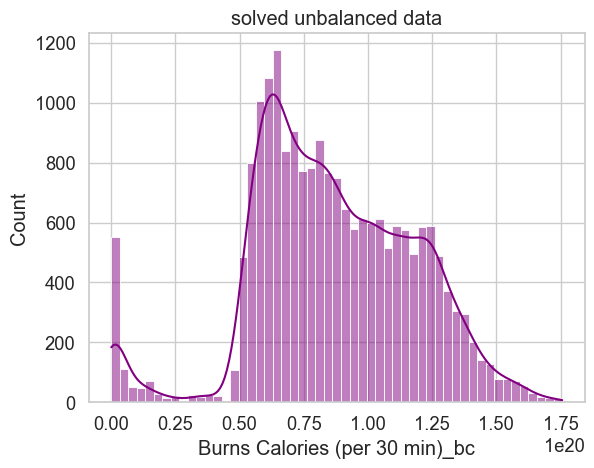

In [120]:
sns.histplot(data=df, x="Burns Calories (per 30 min)_bc",color="purple" ,kde=True)
plt.title("solved unbalanced data")
plt.show()

In [121]:
df['Burns_Calories_Bin'] = pd.qcut(df['Burns Calories (per 30 min)'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

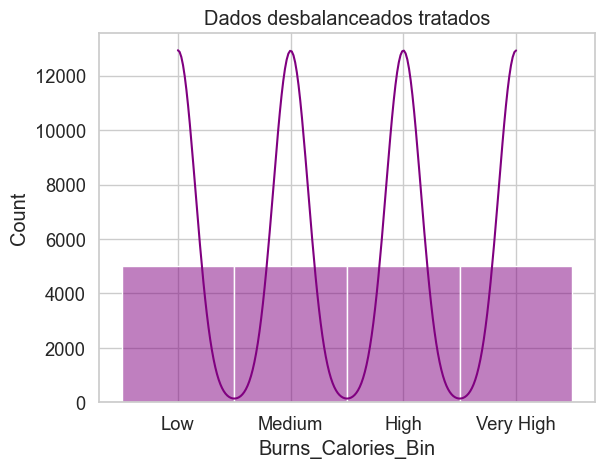

In [122]:
sns.histplot(data=df, x="Burns_Calories_Bin",color="purple" ,kde=True)
plt.title("Dados desbalanceados tratados")
plt.show()

In [123]:
#df.drop(columns=['is_healthy'],inplace = True)

In [124]:
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins',
       'Fats', 'Calories', 'meal_name', 'meal_type', 'diet_type', 'sugar_g',
       'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'cooking_method',
       'prep_time_min', 'cook_time_min', 'rating', 'is_healthy',
       'Name of Exercise', 'Sets', 'Reps', 'Benefit',
       'Burns Calories (per 30 min)', 'Target Muscle Group',
       'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle',
       'Workout', 'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg',
       'pct_HRR', 'pct_maxHR', 'cal_balance', 'lean_mass_kg', 'expected_burn',
       'Burns Calories (per 30 min)_bc', 'Burns_Calories_Bin'],
      dtype='obje

In [125]:
df.shape

(20000, 55)

In [126]:
# ✅ Save the enlarged dataset to CSV
df.to_csv("Dados_Finalizados.csv", index=False)

print("✅ Arquivo salvo com sucesso como 'Dados_Finalizados.csv'")
print("📊 Formato final:", df.shape)

✅ Arquivo salvo com sucesso como 'Dados_Finalizados.csv'
📊 Formato final: (20000, 55)
